feature_Creation

* numeric_distribution_plot
* Calculate_IQR
* object_count_plot
* make_mi_scores_Regression and plot_mi_scores
* create_combination_cat_columns
* box_swarm_plot
* Similar_Category
* adding_similar_features
* Handling_Rare_Values
* model_feature_importance

In [1]:
    import pandas as pd
    import numpy as np
    import seaborn as sns

    import warnings
    warnings.filterwarnings('ignore')

    import matplotlib.pyplot as plt
    import seaborn as sns

In [3]:
merged = pd.read_csv('ordinal_done.csv')
cats = merged.select_dtypes(include='object').columns

In [4]:
cats

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'Foundation', 'Heating', 'FireplaceQu',
       'GarageType', 'MiscFeature', 'SaleType', 'SaleCondition', 'SalePrice'],
      dtype='object')

In [53]:
merged[cats].isna().sum()

MSZoning            4
Street              0
Alley            2721
LotShape            0
LandContour         0
Utilities           2
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
RoofStyle           0
RoofMatl            0
Exterior1st         1
Exterior2nd         1
MasVnrType         24
Foundation          0
Heating             0
FireplaceQu      1420
GarageType        157
MiscFeature      2814
SaleType            1
SaleCondition       0
SalePrice           0
dtype: int64

In [18]:
def numeric_distribution_plot(df):   
    nums_train = df.select_dtypes(exclude='object').columns
    for col in nums_train:
        print(df[col].describe())
        print("IQR")
        q1 = df[col].quantile(0.25)  ; q3 = df[col].quantile(0.75)
        IQR = q3-q1
        lower_limit = q1 - 1.5*IQR  ; upper_limit = q3 + 1.5*IQR
        print('lower_limit = ',lower_limit,'   ||  ',' upper_limit = ',upper_limit)
        
        plt.figure(figsize=(12,5))
        plt.title("Distribution of  "+col)
        sns.distplot(df[col].dropna())
        plt.tight_layout()
        plt.show()

count    2919.000000
mean     1460.000000
std       842.787043
min         1.000000
25%       730.500000
50%      1460.000000
75%      2189.500000
max      2919.000000
Name: Id, dtype: float64
IQR
lower_limit =  -1458.0    ||    upper_limit =  4378.0


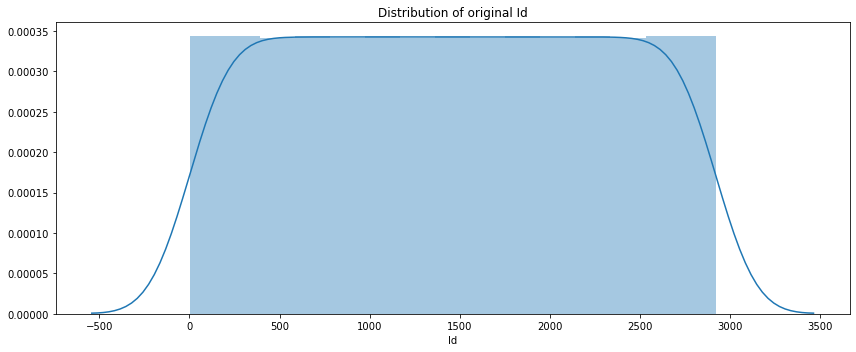

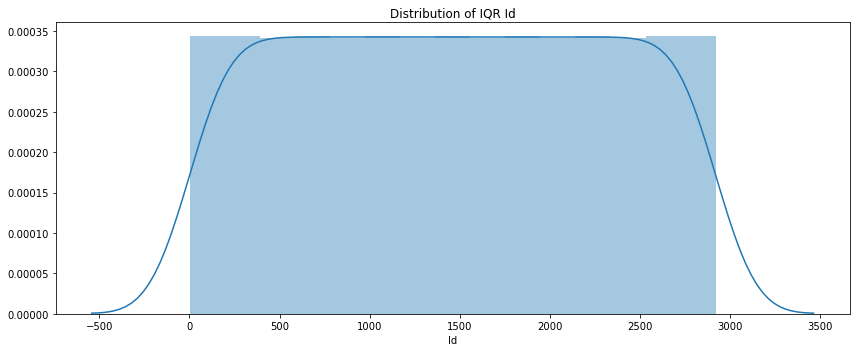

count    2919.000000
mean       57.137718
std        42.517628
min        20.000000
25%        20.000000
50%        50.000000
75%        70.000000
max       190.000000
Name: MSSubClass, dtype: float64
IQR
lower_limit =  -55.0    ||    upper_limit =  145.0


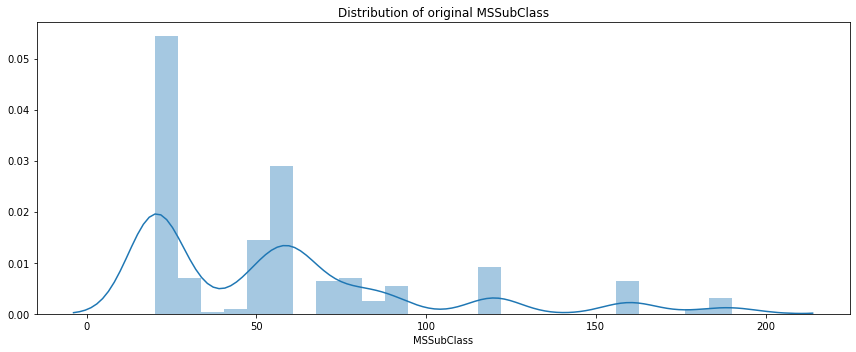

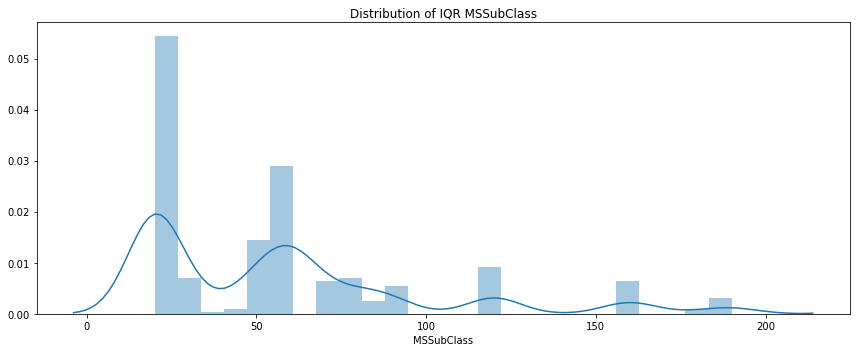

count    2433.000000
mean       69.305795
std        23.344905
min        21.000000
25%        59.000000
50%        68.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64
IQR
lower_limit =  27.5    ||    upper_limit =  111.5


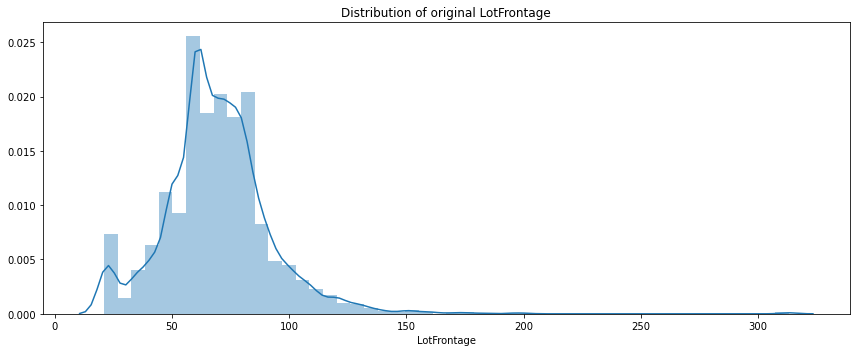

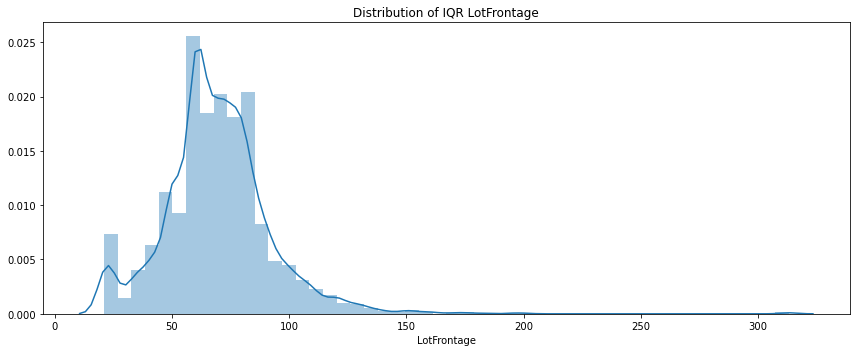

count      2919.000000
mean      10168.114080
std        7886.996359
min        1300.000000
25%        7478.000000
50%        9453.000000
75%       11570.000000
max      215245.000000
Name: LotArea, dtype: float64
IQR
lower_limit =  1340.0    ||    upper_limit =  17708.0


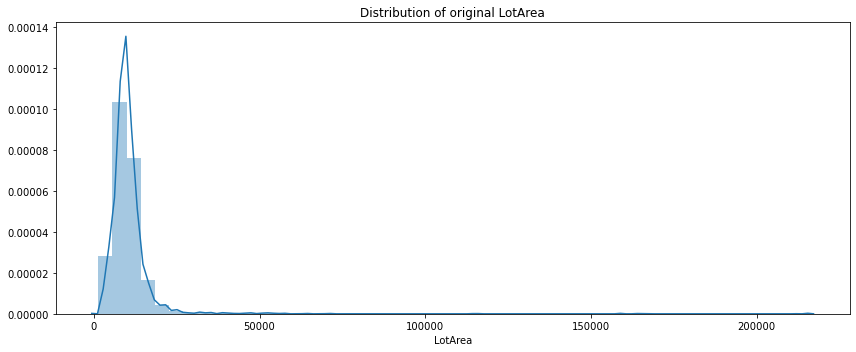

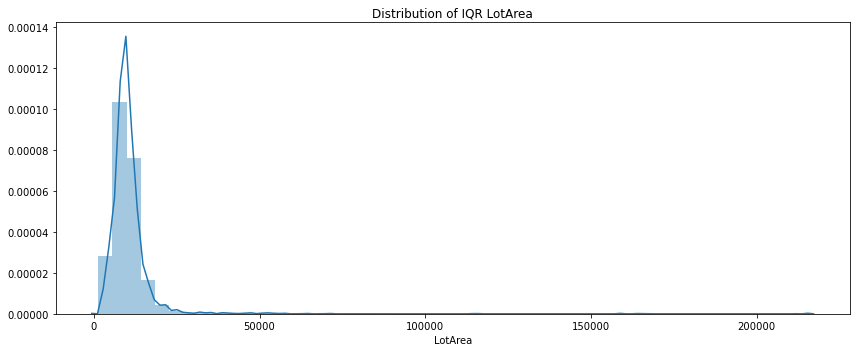

count    2919.000000
mean        6.089072
std         1.409947
min         1.000000
25%         5.000000
50%         6.000000
75%         7.000000
max        10.000000
Name: OverallQual, dtype: float64
IQR
lower_limit =  2.0    ||    upper_limit =  10.0


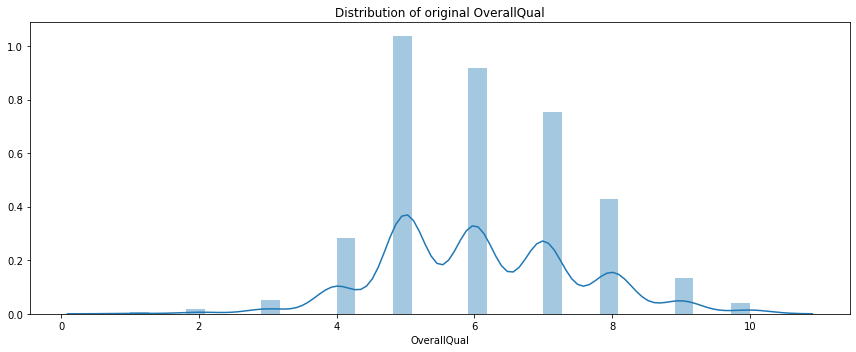

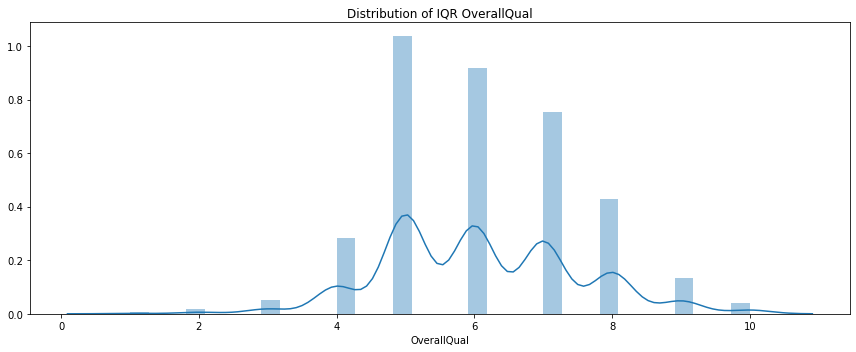

count    2919.000000
mean        5.564577
std         1.113131
min         1.000000
25%         5.000000
50%         5.000000
75%         6.000000
max         9.000000
Name: OverallCond, dtype: float64
IQR
lower_limit =  3.5    ||    upper_limit =  7.5


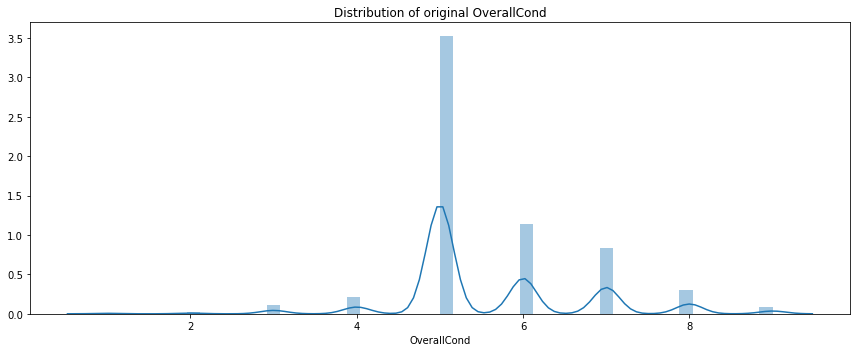

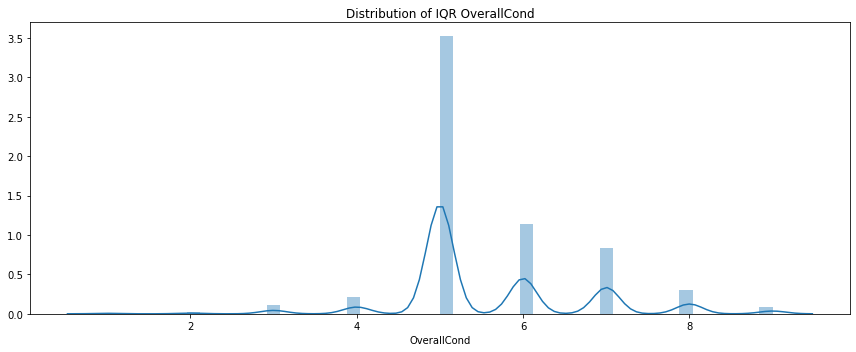

count    2919.000000
mean     1971.312778
std        30.291442
min      1872.000000
25%      1953.500000
50%      1973.000000
75%      2001.000000
max      2010.000000
Name: YearBuilt, dtype: float64
IQR
lower_limit =  1882.25    ||    upper_limit =  2072.25


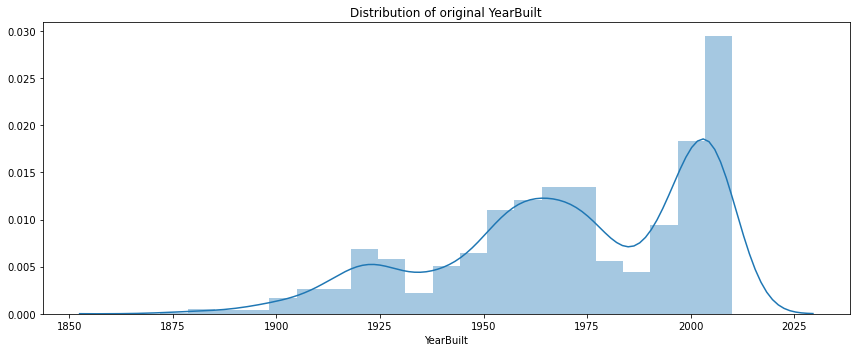

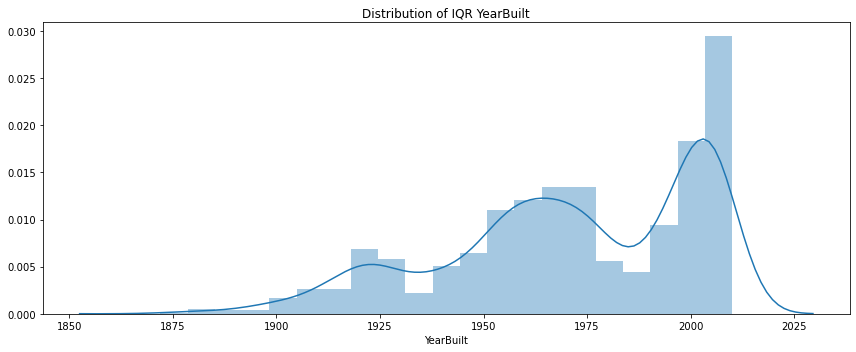

count    2919.000000
mean     1984.264474
std        20.894344
min      1950.000000
25%      1965.000000
50%      1993.000000
75%      2004.000000
max      2010.000000
Name: YearRemodAdd, dtype: float64
IQR
lower_limit =  1906.5    ||    upper_limit =  2062.5


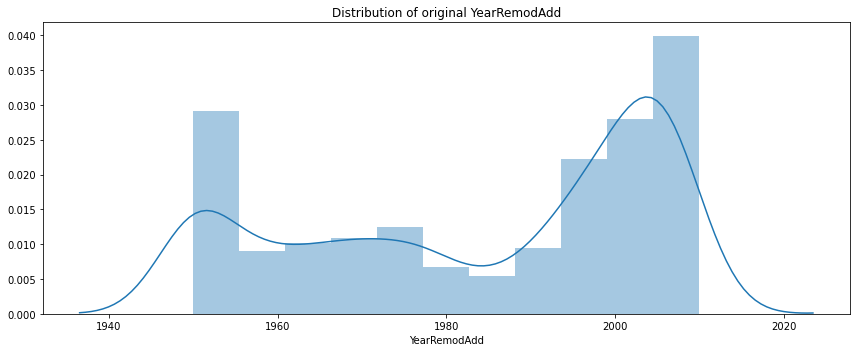

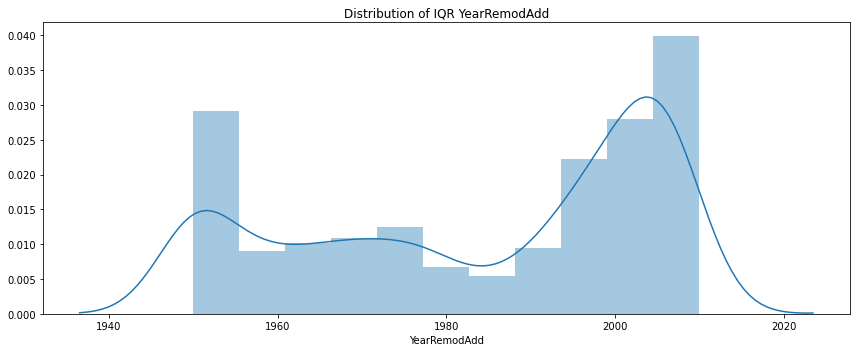

count    2896.000000
mean      102.201312
std       179.334253
min         0.000000
25%         0.000000
50%         0.000000
75%       164.000000
max      1600.000000
Name: MasVnrArea, dtype: float64
IQR
lower_limit =  -246.0    ||    upper_limit =  410.0


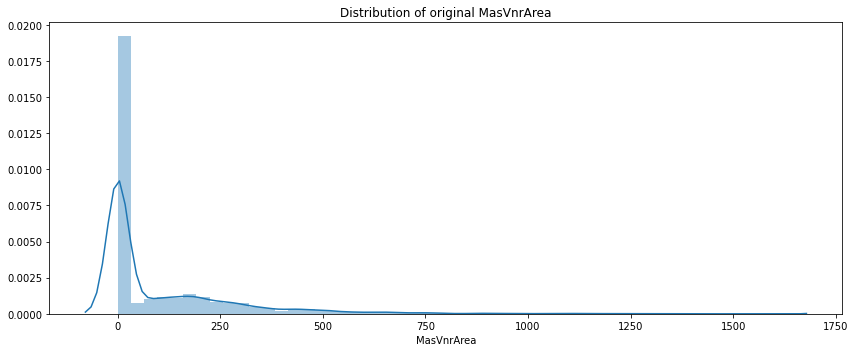

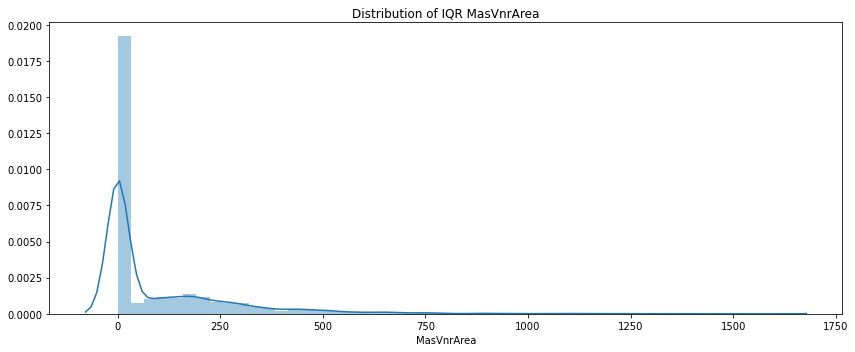

count    2919.000000
mean        5.830079
std         1.271790
min         3.000000
25%         5.000000
50%         5.000000
75%         7.000000
max        10.000000
Name: ExterQual, dtype: float64
IQR
lower_limit =  2.0    ||    upper_limit =  10.0


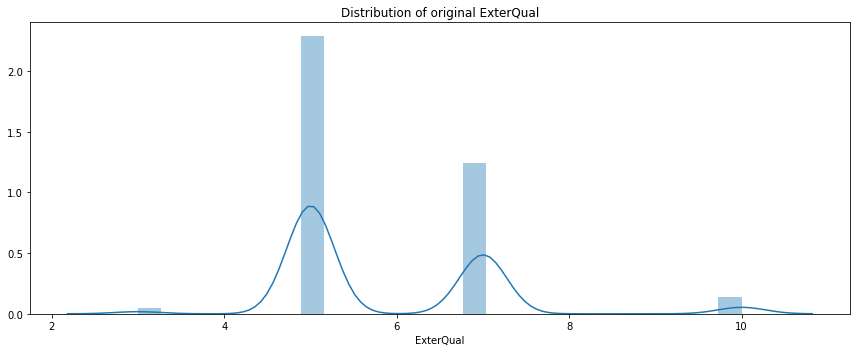

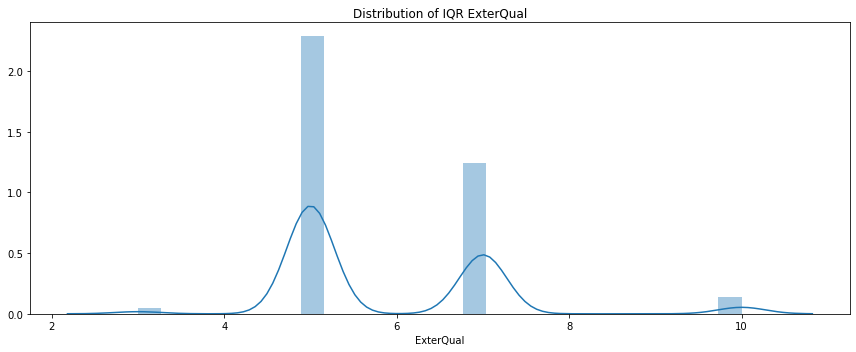

count    2919.000000
mean        5.174375
std         0.774473
min         0.000000
25%         5.000000
50%         5.000000
75%         5.000000
max        10.000000
Name: ExterCond, dtype: float64
IQR
lower_limit =  5.0    ||    upper_limit =  5.0


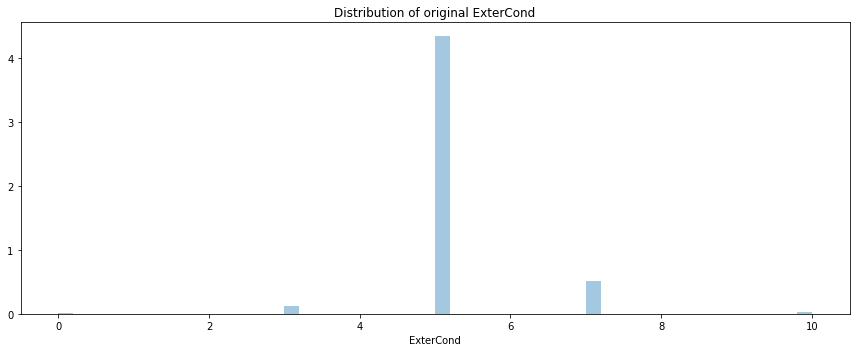

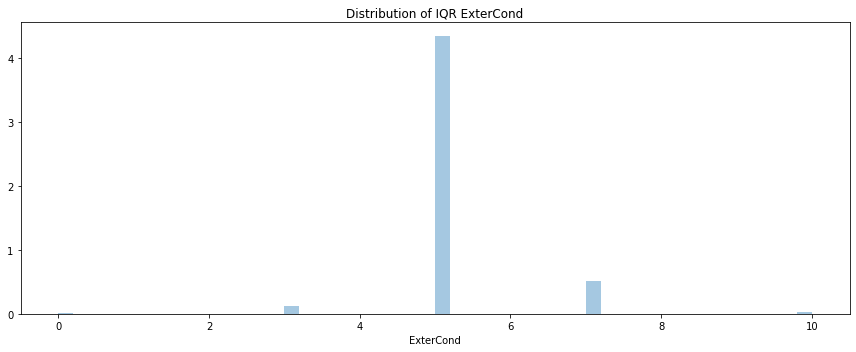

count    2919.000000
mean        6.071257
std         1.879982
min         0.000000
25%         5.000000
50%         7.000000
75%         7.000000
max        10.000000
Name: BsmtQual, dtype: float64
IQR
lower_limit =  2.0    ||    upper_limit =  10.0


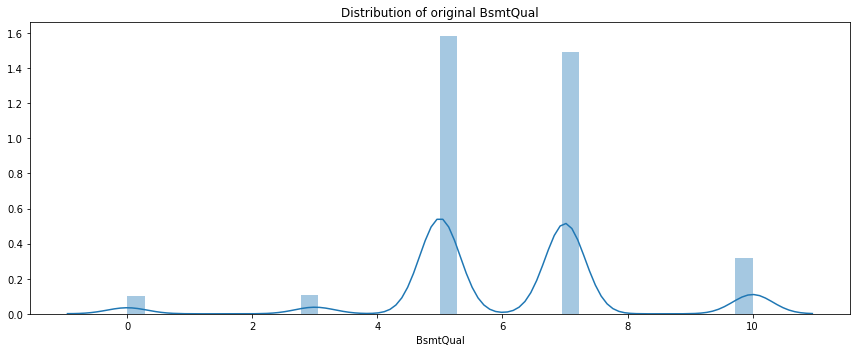

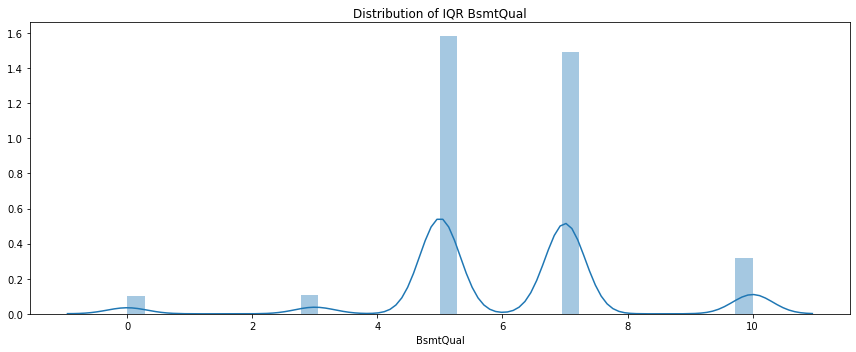

count    2919.000000
mean        4.865022
std         1.010707
min         0.000000
25%         5.000000
50%         5.000000
75%         5.000000
max         7.000000
Name: BsmtCond, dtype: float64
IQR
lower_limit =  5.0    ||    upper_limit =  5.0


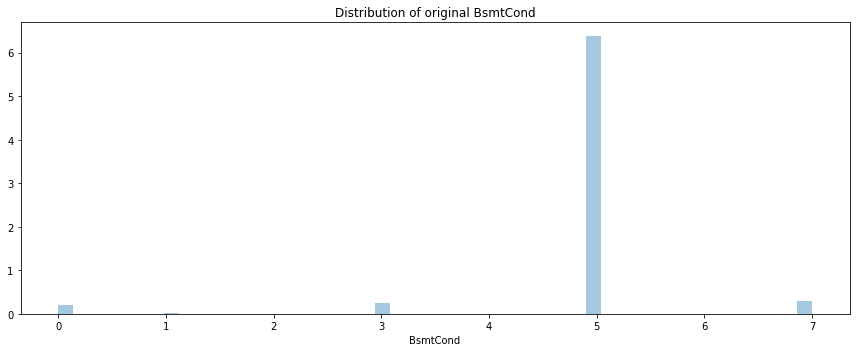

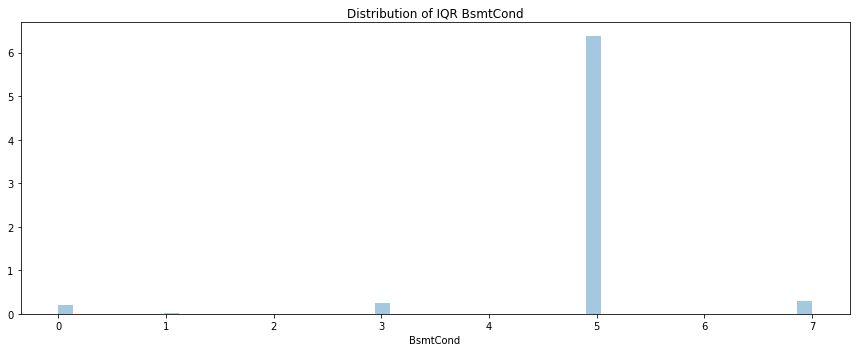

count    2919.000000
mean        1.623844
std         1.070026
min         0.000000
25%         1.000000
50%         1.000000
75%         2.000000
max         4.000000
Name: BsmtExposure, dtype: float64
IQR
lower_limit =  -0.5    ||    upper_limit =  3.5


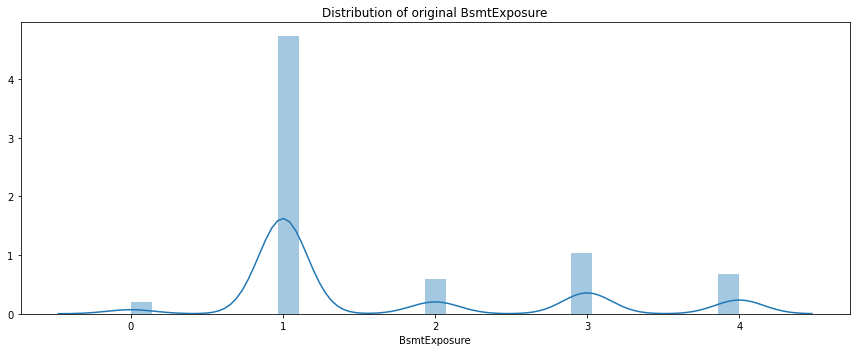

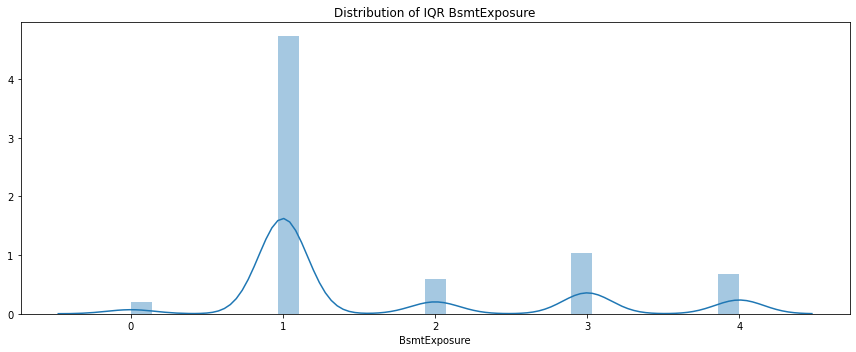

count    2919.000000
mean        5.098321
std         3.435631
min         0.000000
25%         2.000000
50%         5.000000
75%        10.000000
max        10.000000
Name: BsmtFinType1, dtype: float64
IQR
lower_limit =  -10.0    ||    upper_limit =  22.0


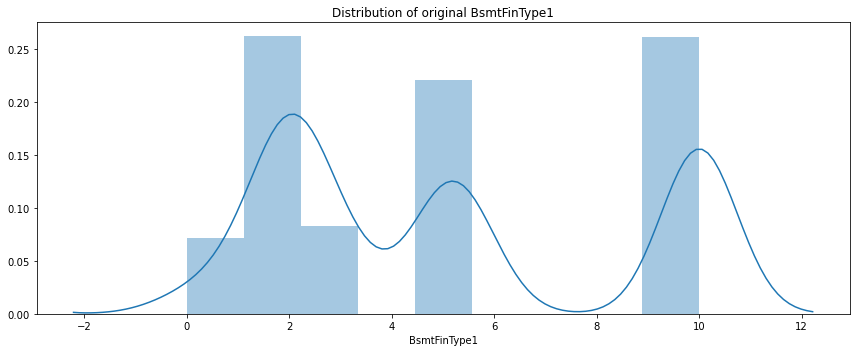

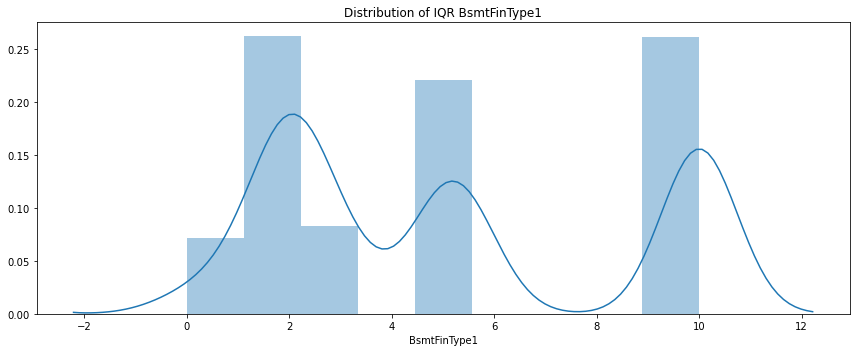

count    2918.000000
mean      441.423235
std       455.610826
min         0.000000
25%         0.000000
50%       368.500000
75%       733.000000
max      5644.000000
Name: BsmtFinSF1, dtype: float64
IQR
lower_limit =  -1099.5    ||    upper_limit =  1832.5


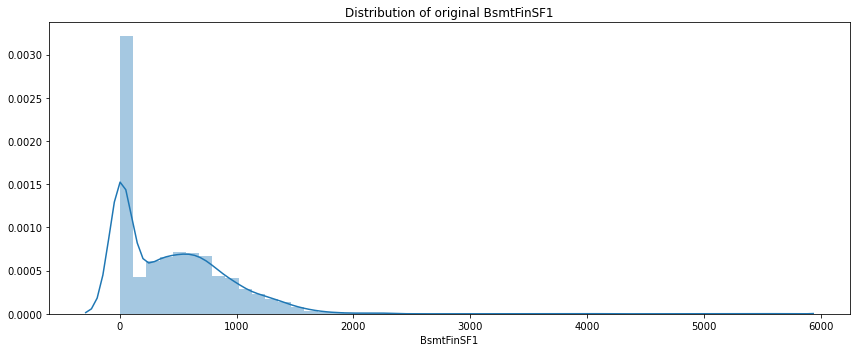

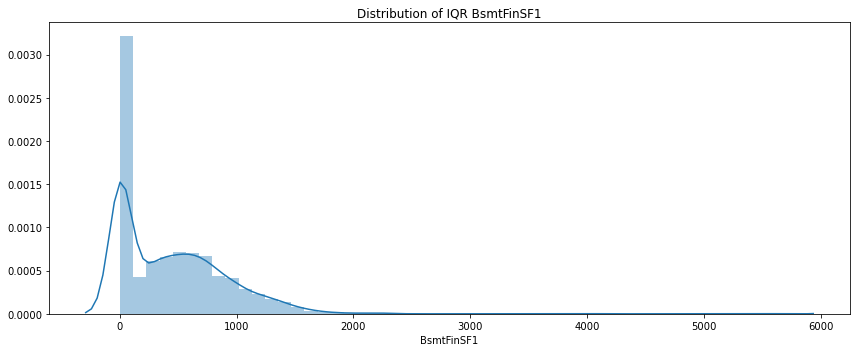

count    2919.000000
mean        2.211202
std         1.210396
min         0.000000
25%         2.000000
50%         2.000000
75%         2.000000
max        10.000000
Name: BsmtFinType2, dtype: float64
IQR
lower_limit =  2.0    ||    upper_limit =  2.0


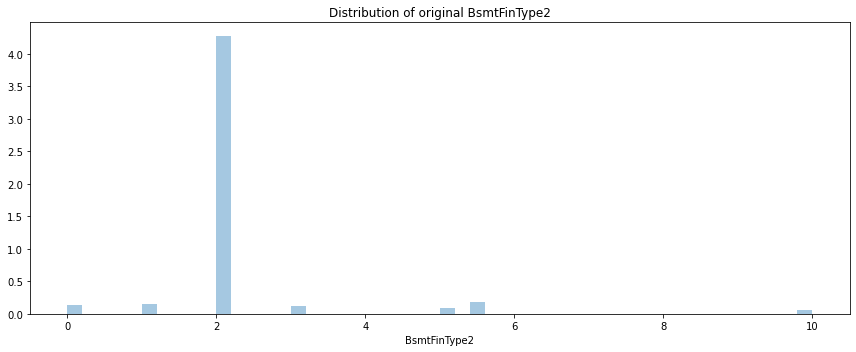

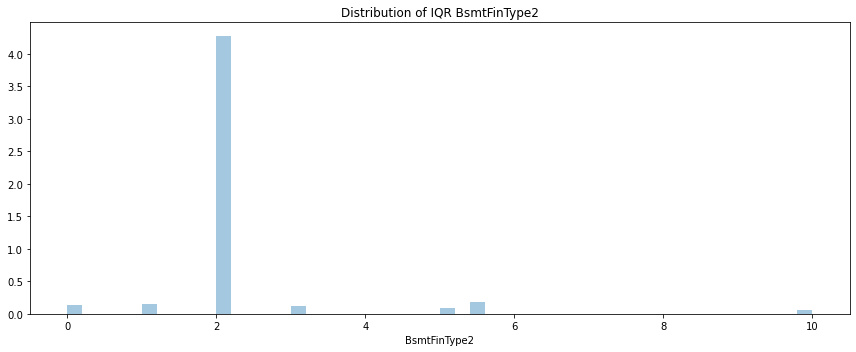

count    2918.000000
mean       49.582248
std       169.205611
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max      1526.000000
Name: BsmtFinSF2, dtype: float64
IQR
lower_limit =  0.0    ||    upper_limit =  0.0


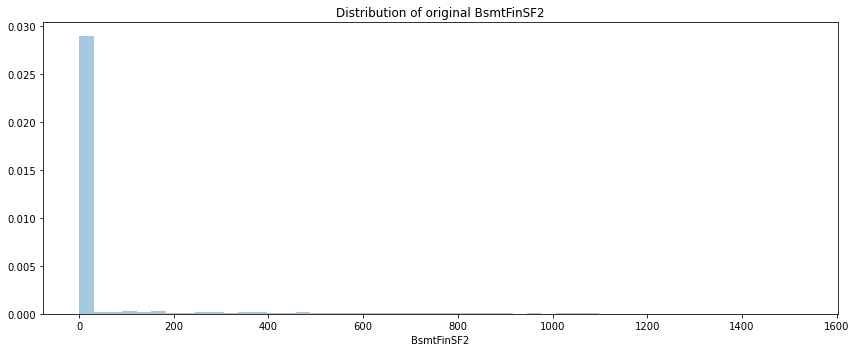

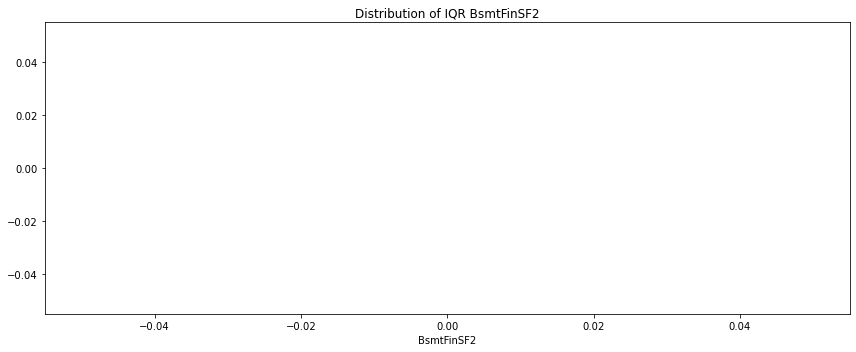

count    2918.000000
mean      560.772104
std       439.543659
min         0.000000
25%       220.000000
50%       467.000000
75%       805.500000
max      2336.000000
Name: BsmtUnfSF, dtype: float64
IQR
lower_limit =  -658.25    ||    upper_limit =  1683.75


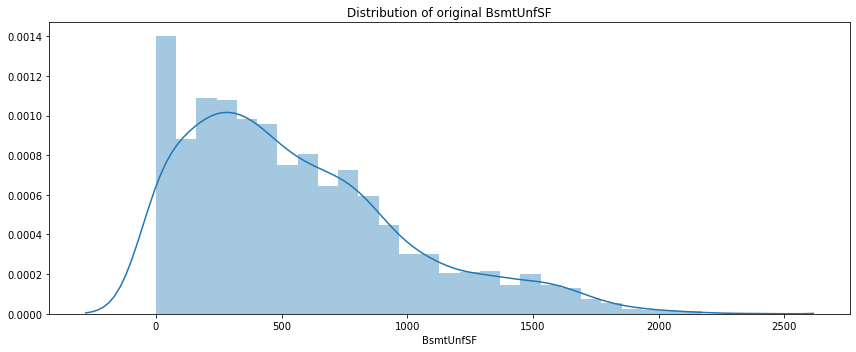

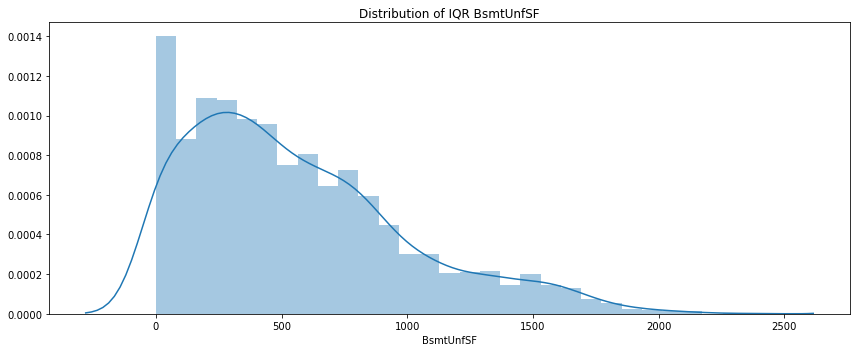

count    2918.000000
mean     1051.777587
std       440.766258
min         0.000000
25%       793.000000
50%       989.500000
75%      1302.000000
max      6110.000000
Name: TotalBsmtSF, dtype: float64
IQR
lower_limit =  29.5    ||    upper_limit =  2065.5


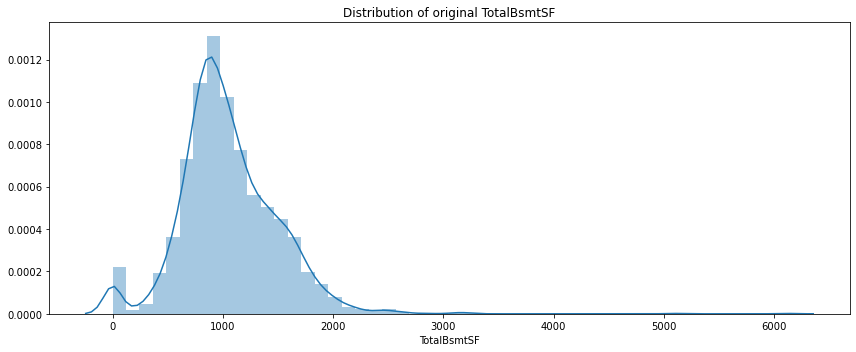

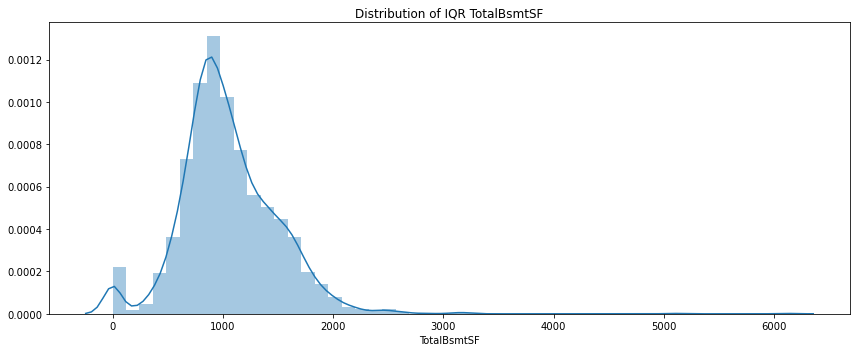

count    2919.000000
mean        7.813977
std         2.381531
min         0.000000
25%         5.000000
50%        10.000000
75%        10.000000
max        10.000000
Name: HeatingQC, dtype: float64
IQR
lower_limit =  -2.5    ||    upper_limit =  17.5


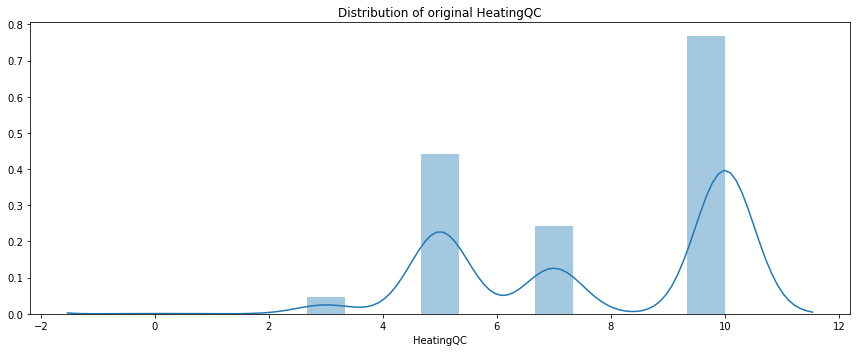

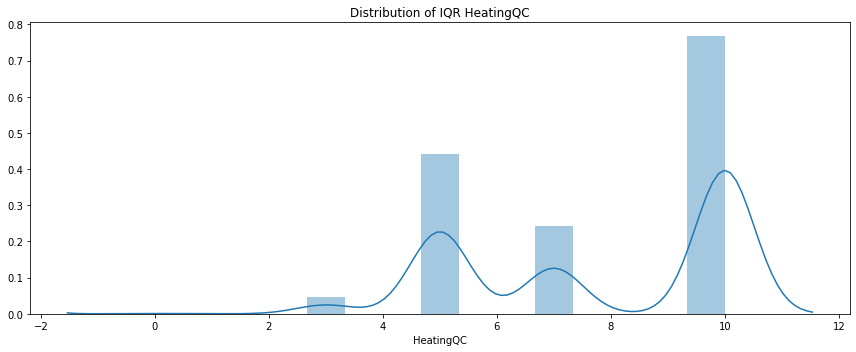

count    2919.000000
mean        0.932854
std         0.250318
min         0.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: CentralAir, dtype: float64
IQR
lower_limit =  1.0    ||    upper_limit =  1.0


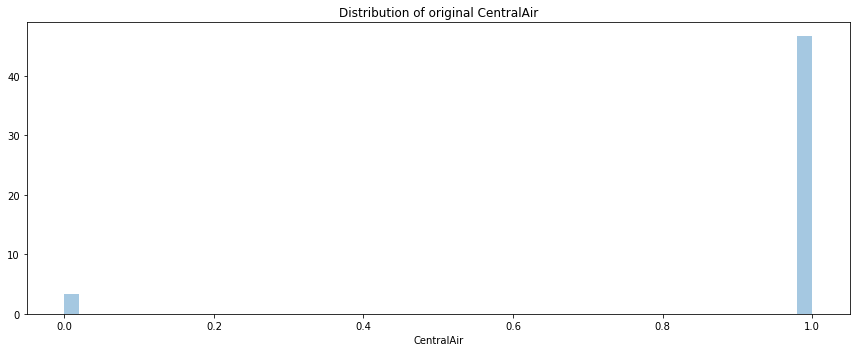

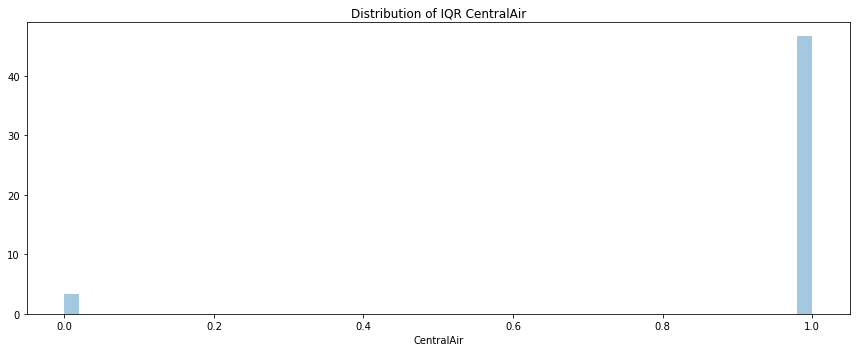

count    2919.000000
mean        4.843268
std         0.534468
min         0.000000
25%         5.000000
50%         5.000000
75%         5.000000
max         5.000000
Name: Electrical, dtype: float64
IQR
lower_limit =  5.0    ||    upper_limit =  5.0


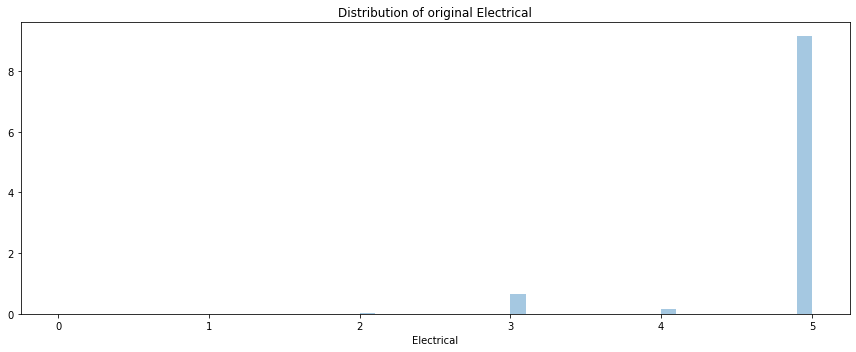

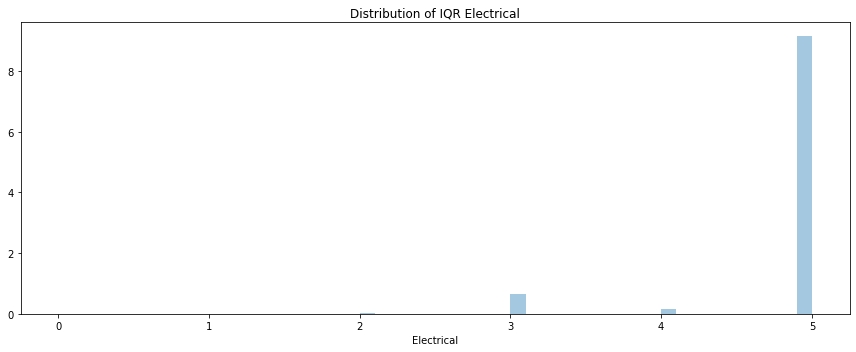

count    2919.000000
mean     1159.581706
std       392.362079
min       334.000000
25%       876.000000
50%      1082.000000
75%      1387.500000
max      5095.000000
Name: 1stFlrSF, dtype: float64
IQR
lower_limit =  108.75    ||    upper_limit =  2154.75


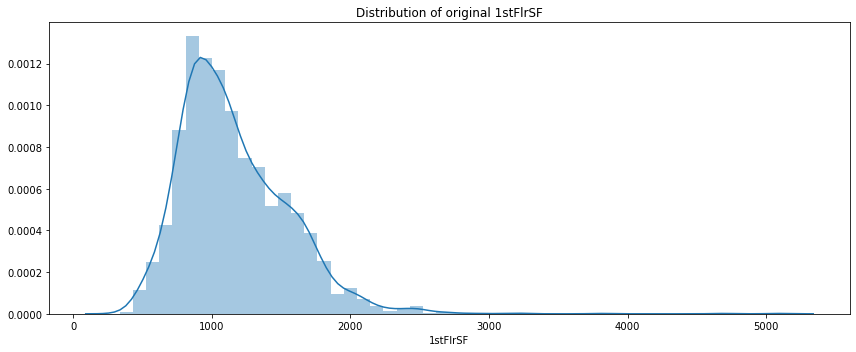

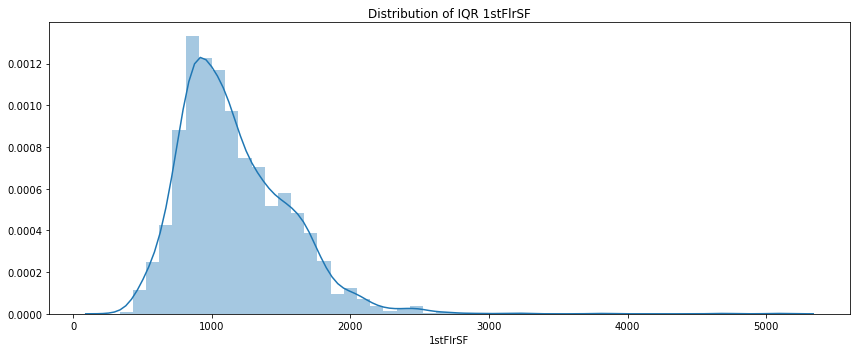

count    2919.000000
mean      336.483727
std       428.701456
min         0.000000
25%         0.000000
50%         0.000000
75%       704.000000
max      2065.000000
Name: 2ndFlrSF, dtype: float64
IQR
lower_limit =  -1056.0    ||    upper_limit =  1760.0


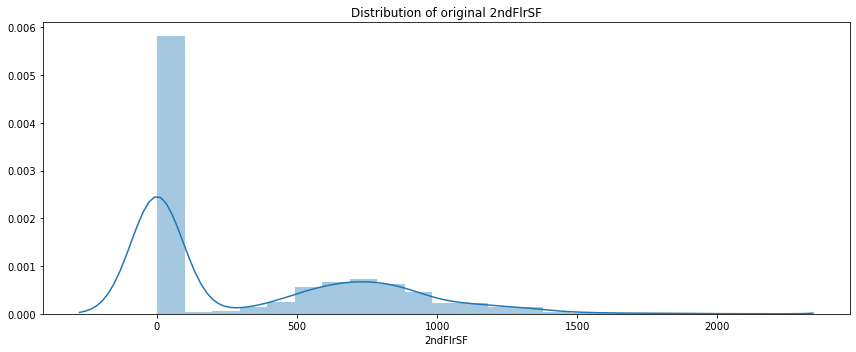

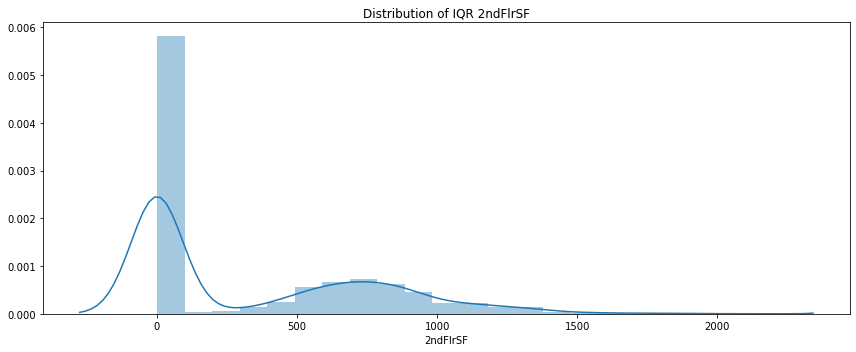

count    2919.000000
mean        4.694416
std        46.396825
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max      1064.000000
Name: LowQualFinSF, dtype: float64
IQR
lower_limit =  0.0    ||    upper_limit =  0.0


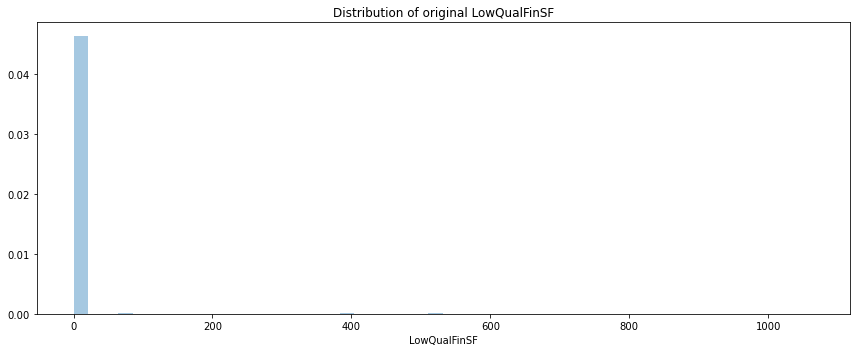

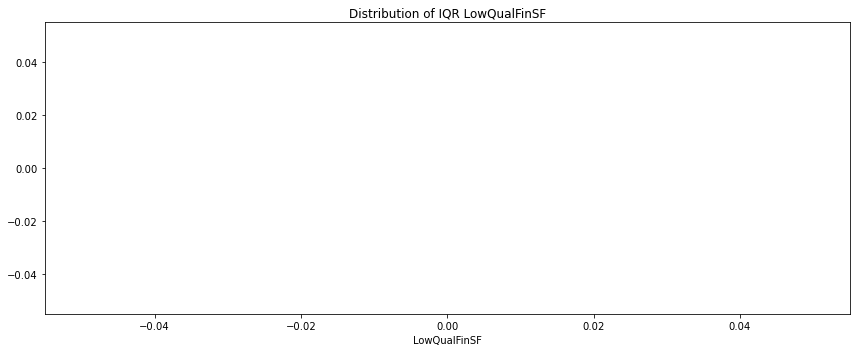

count    2919.000000
mean     1500.759849
std       506.051045
min       334.000000
25%      1126.000000
50%      1444.000000
75%      1743.500000
max      5642.000000
Name: GrLivArea, dtype: float64
IQR
lower_limit =  199.75    ||    upper_limit =  2669.75


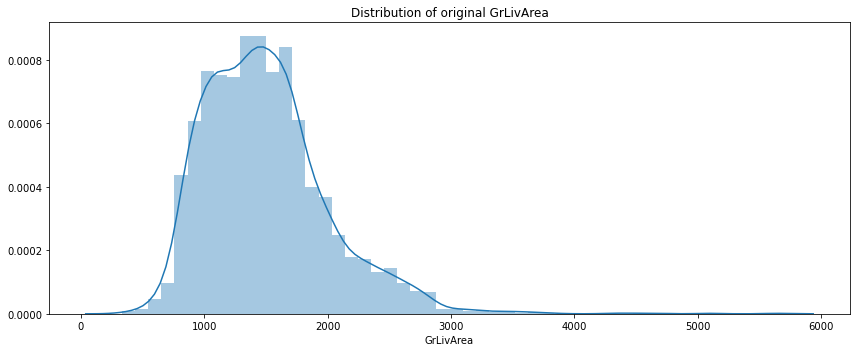

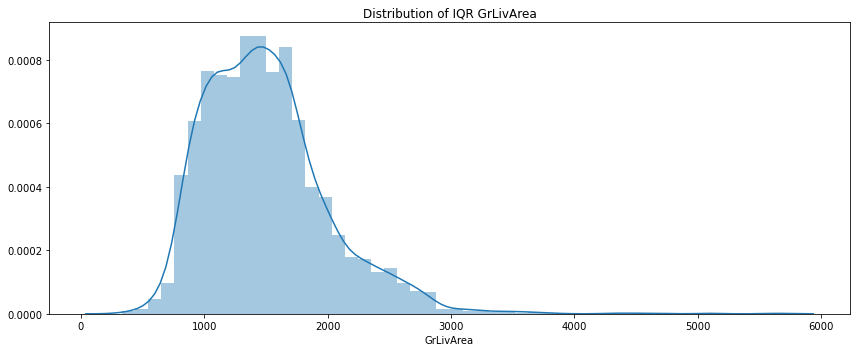

count    2917.000000
mean        0.429894
std         0.524736
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         3.000000
Name: BsmtFullBath, dtype: float64
IQR
lower_limit =  -1.5    ||    upper_limit =  2.5


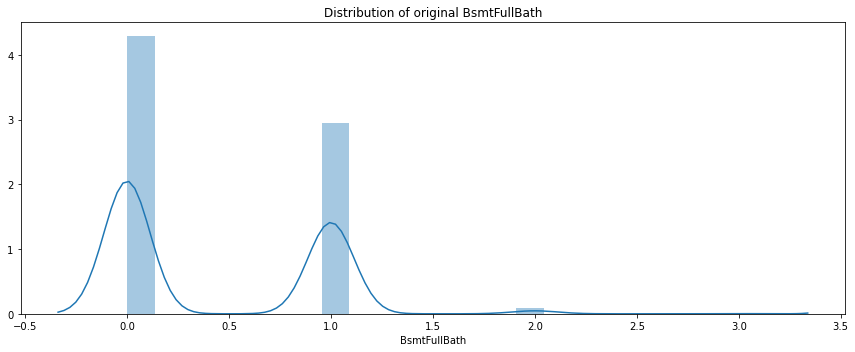

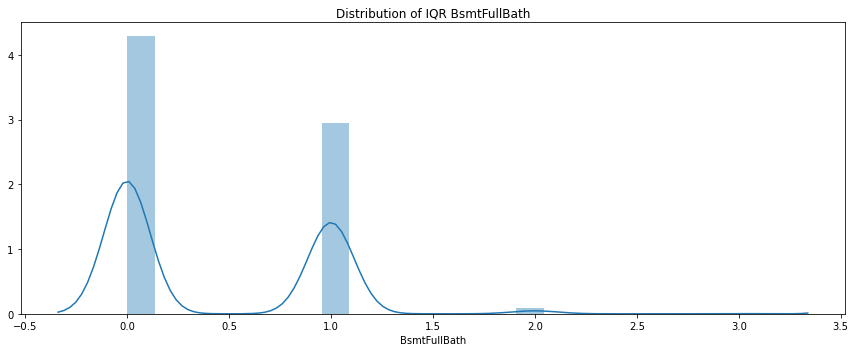

count    2917.000000
mean        0.061364
std         0.245687
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         2.000000
Name: BsmtHalfBath, dtype: float64
IQR
lower_limit =  0.0    ||    upper_limit =  0.0


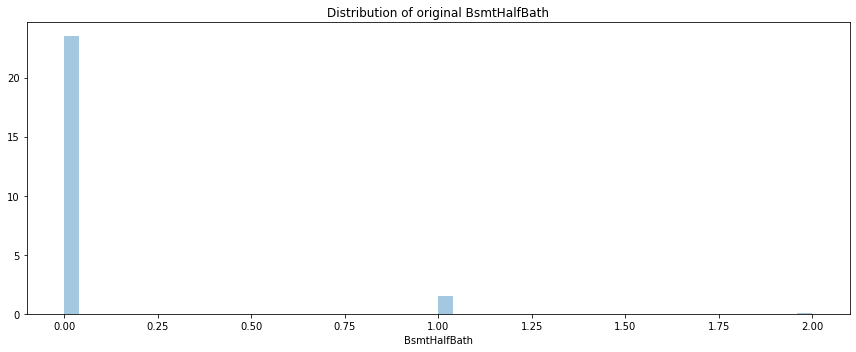

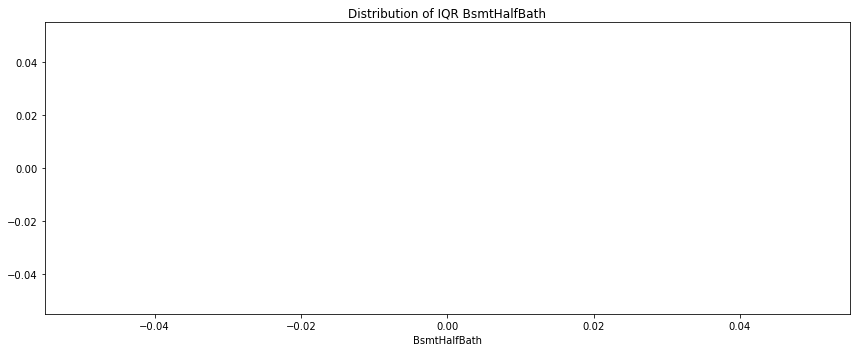

count    2919.000000
mean        1.568003
std         0.552969
min         0.000000
25%         1.000000
50%         2.000000
75%         2.000000
max         4.000000
Name: FullBath, dtype: float64
IQR
lower_limit =  -0.5    ||    upper_limit =  3.5


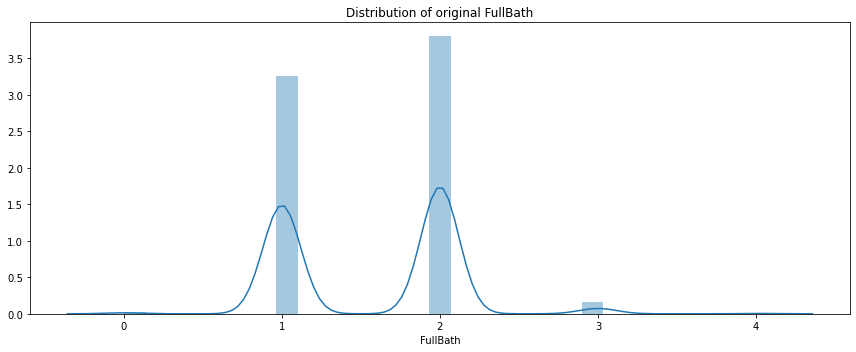

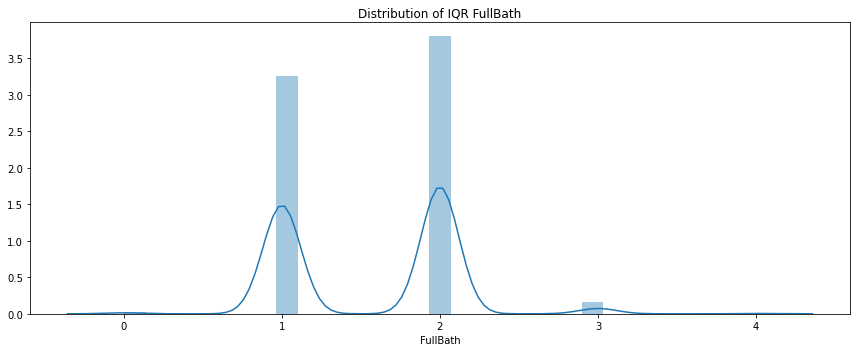

count    2919.000000
mean        0.380267
std         0.502872
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         2.000000
Name: HalfBath, dtype: float64
IQR
lower_limit =  -1.5    ||    upper_limit =  2.5


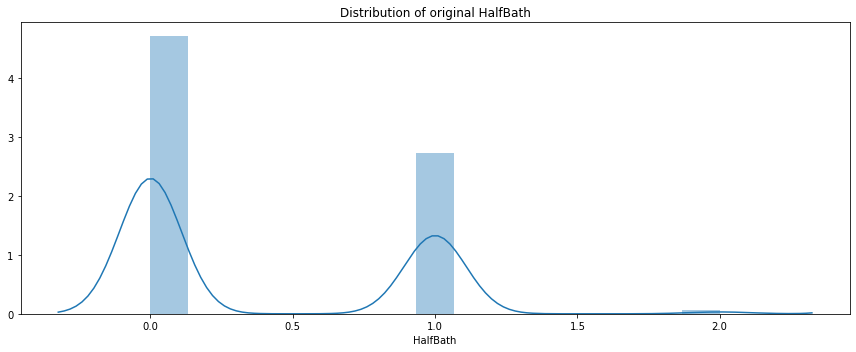

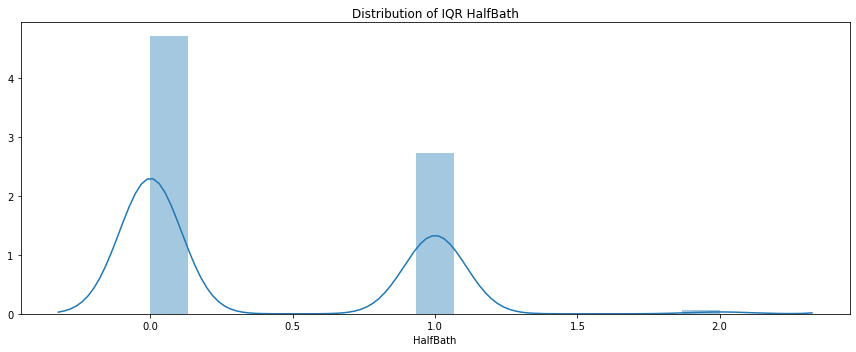

count    2919.000000
mean        2.860226
std         0.822693
min         0.000000
25%         2.000000
50%         3.000000
75%         3.000000
max         8.000000
Name: BedroomAbvGr, dtype: float64
IQR
lower_limit =  0.5    ||    upper_limit =  4.5


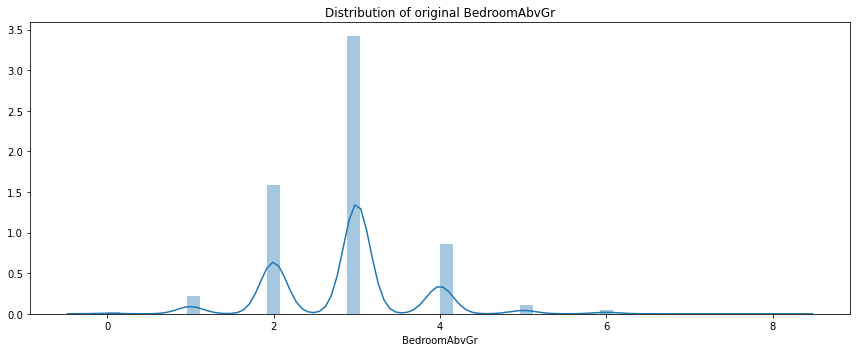

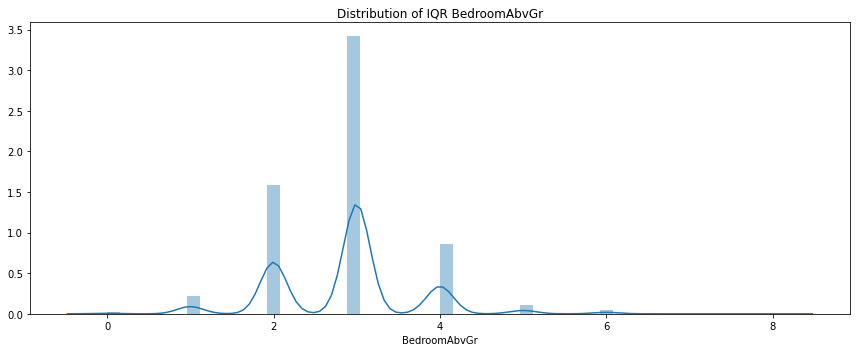

count    2919.000000
mean        1.044536
std         0.214462
min         0.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         3.000000
Name: KitchenAbvGr, dtype: float64
IQR
lower_limit =  1.0    ||    upper_limit =  1.0


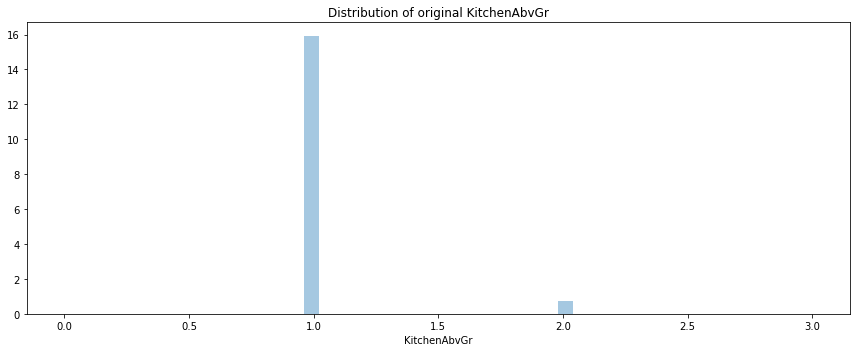

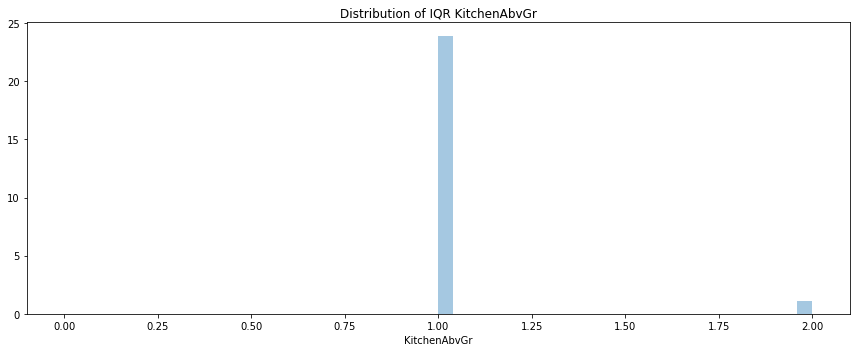

count    2919.000000
mean        6.090099
std         1.499978
min         0.000000
25%         5.000000
50%         5.000000
75%         7.000000
max        10.000000
Name: KitchenQual, dtype: float64
IQR
lower_limit =  2.0    ||    upper_limit =  10.0


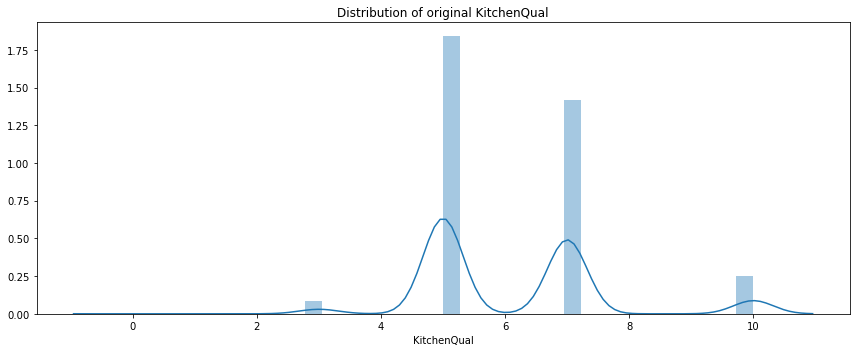

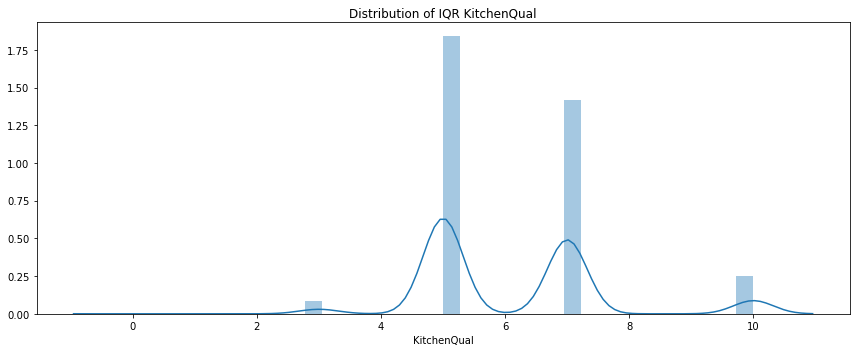

count    2919.000000
mean        6.451524
std         1.569379
min         2.000000
25%         5.000000
50%         6.000000
75%         7.000000
max        15.000000
Name: TotRmsAbvGrd, dtype: float64
IQR
lower_limit =  2.0    ||    upper_limit =  10.0


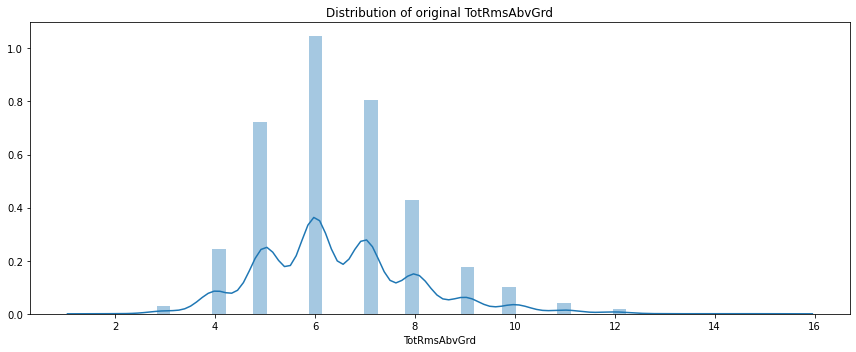

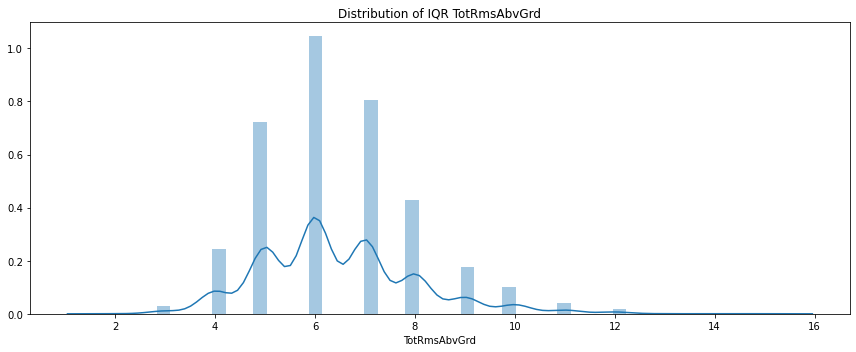

count    2919.000000
mean        9.716341
std         1.154473
min         0.000000
25%        10.000000
50%        10.000000
75%        10.000000
max        10.000000
Name: Functional, dtype: float64
IQR
lower_limit =  10.0    ||    upper_limit =  10.0


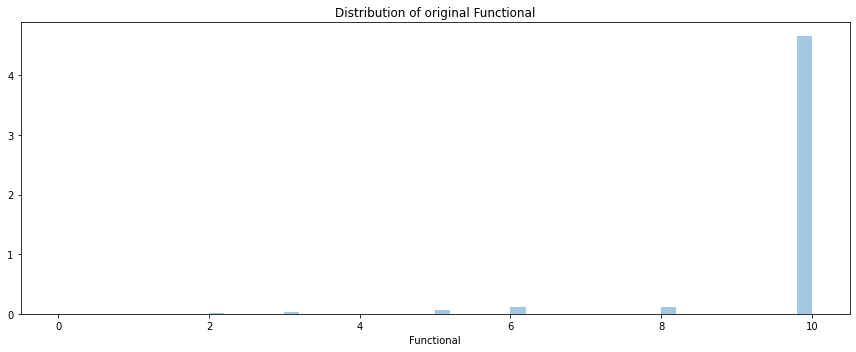

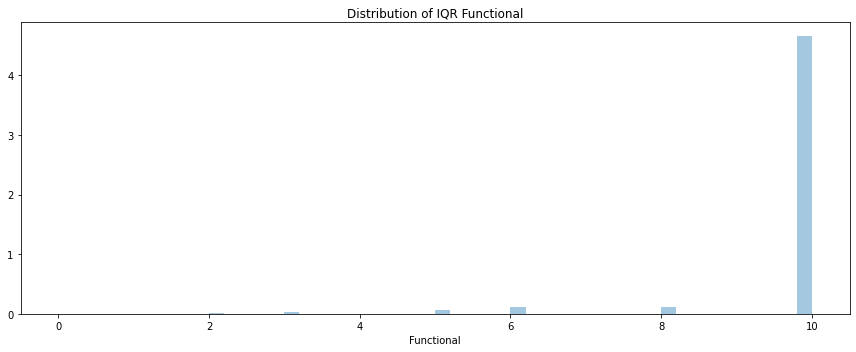

count    2919.000000
mean        0.597122
std         0.646129
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         4.000000
Name: Fireplaces, dtype: float64
IQR
lower_limit =  -1.5    ||    upper_limit =  2.5


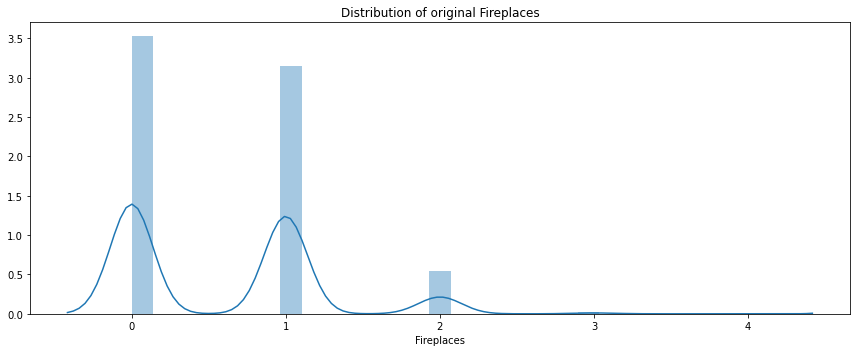

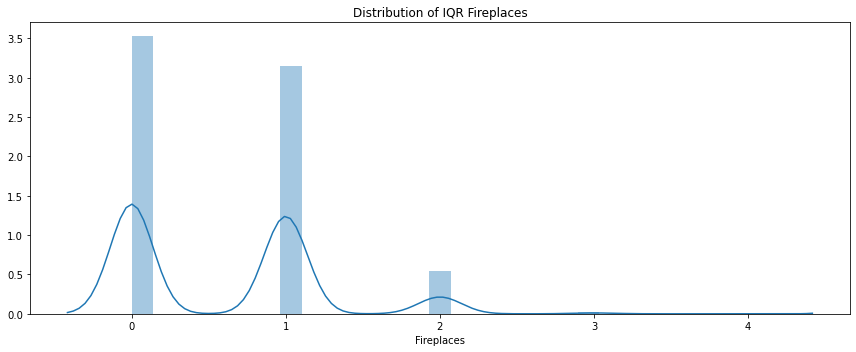

count    2760.000000
mean     1978.113406
std        25.574285
min      1895.000000
25%      1960.000000
50%      1979.000000
75%      2002.000000
max      2207.000000
Name: GarageYrBlt, dtype: float64
IQR
lower_limit =  1897.0    ||    upper_limit =  2065.0


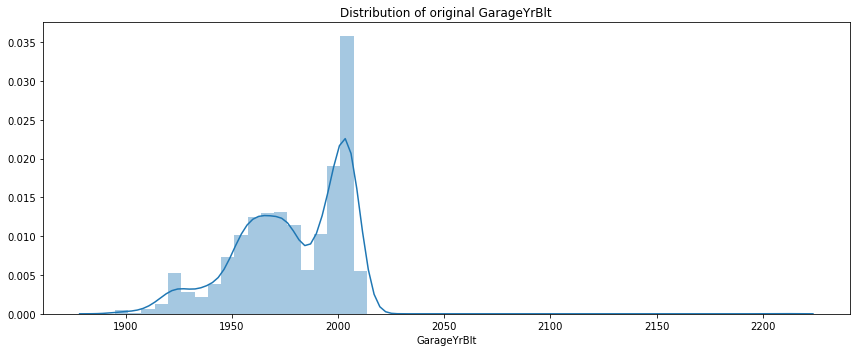

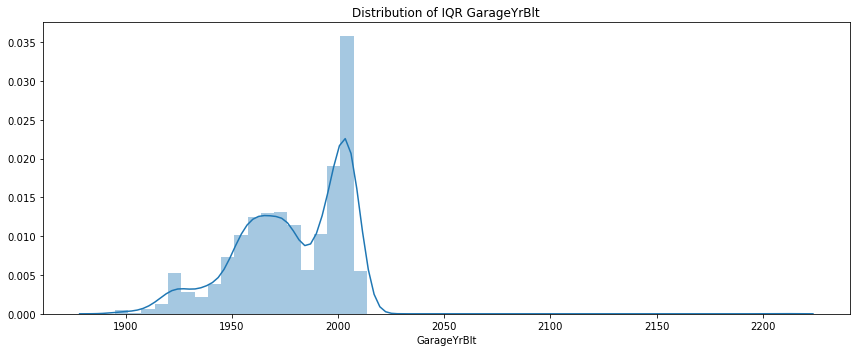

count    2919.000000
mean        2.907845
std         1.374422
min         0.000000
25%         2.000000
50%         3.000000
75%         3.000000
max         5.000000
Name: GarageFinish, dtype: float64
IQR
lower_limit =  0.5    ||    upper_limit =  4.5


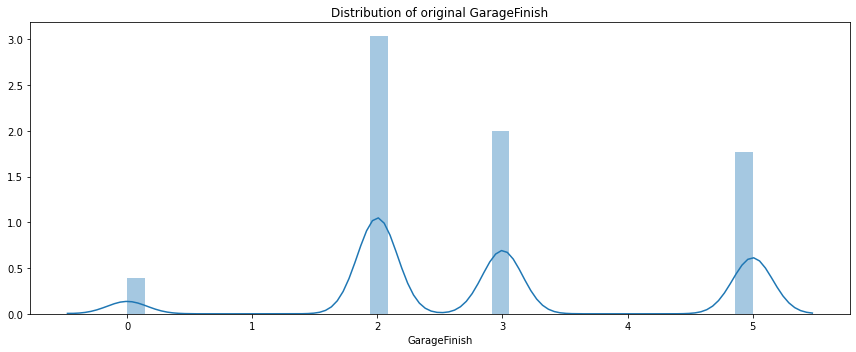

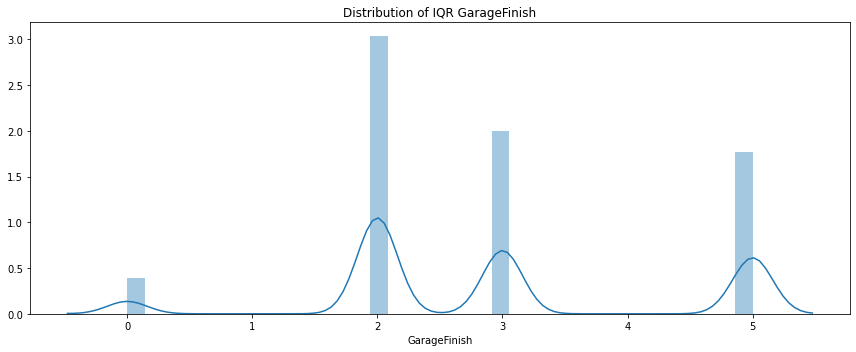

count    2918.000000
mean        1.766621
std         0.761624
min         0.000000
25%         1.000000
50%         2.000000
75%         2.000000
max         5.000000
Name: GarageCars, dtype: float64
IQR
lower_limit =  -0.5    ||    upper_limit =  3.5


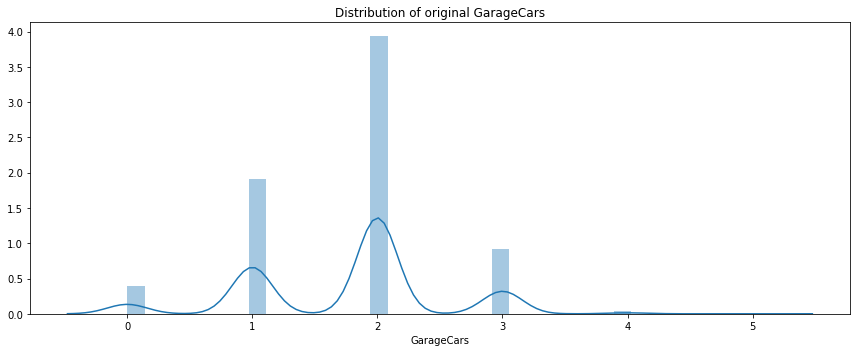

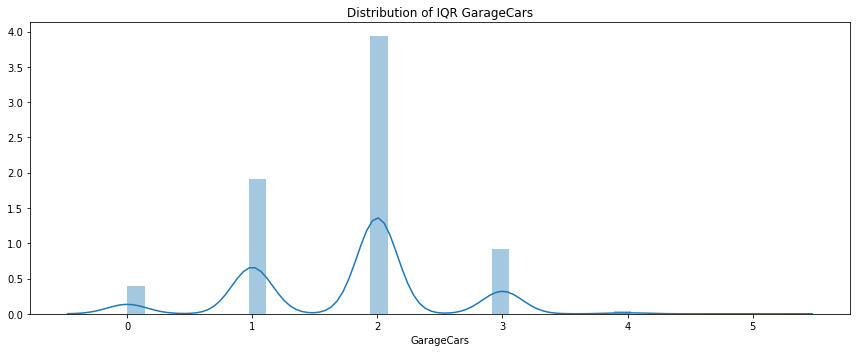

count    2918.000000
mean      472.874572
std       215.394815
min         0.000000
25%       320.000000
50%       480.000000
75%       576.000000
max      1488.000000
Name: GarageArea, dtype: float64
IQR
lower_limit =  -64.0    ||    upper_limit =  960.0


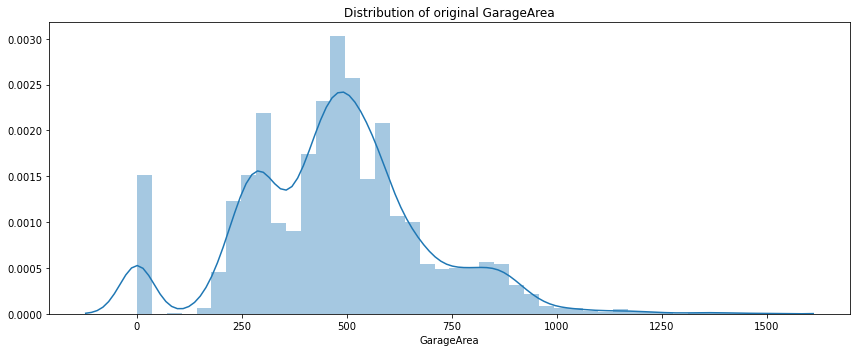

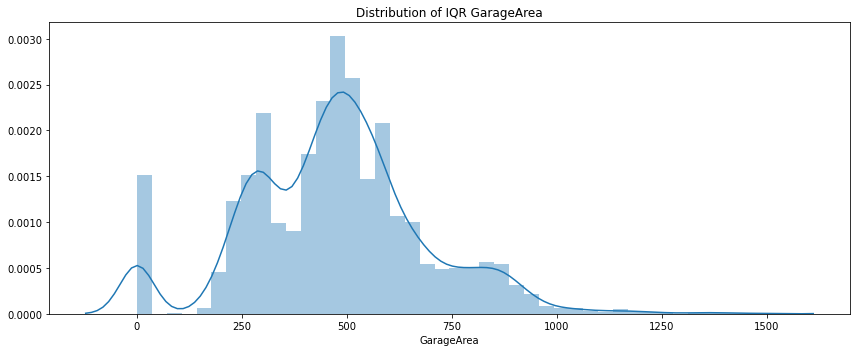

count    2919.000000
mean        4.663583
std         1.229303
min         0.000000
25%         5.000000
50%         5.000000
75%         5.000000
max        10.000000
Name: GarageQual, dtype: float64
IQR
lower_limit =  5.0    ||    upper_limit =  5.0


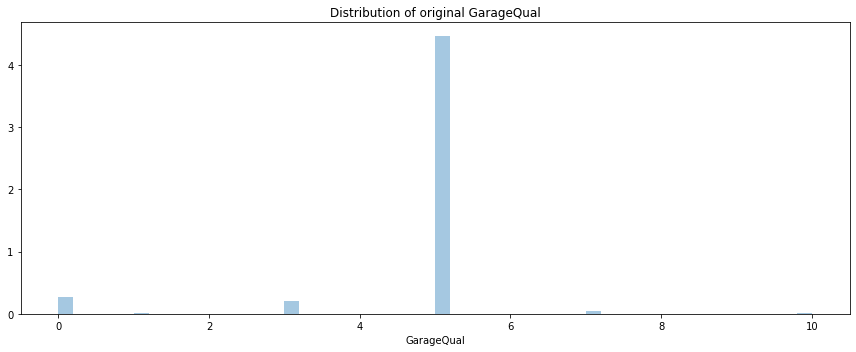

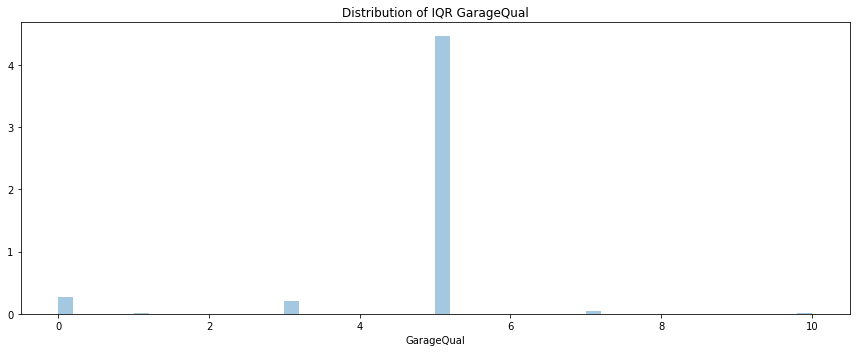

count    2919.000000
mean        4.673176
std         1.216492
min         0.000000
25%         5.000000
50%         5.000000
75%         5.000000
max        10.000000
Name: GarageCond, dtype: float64
IQR
lower_limit =  5.0    ||    upper_limit =  5.0


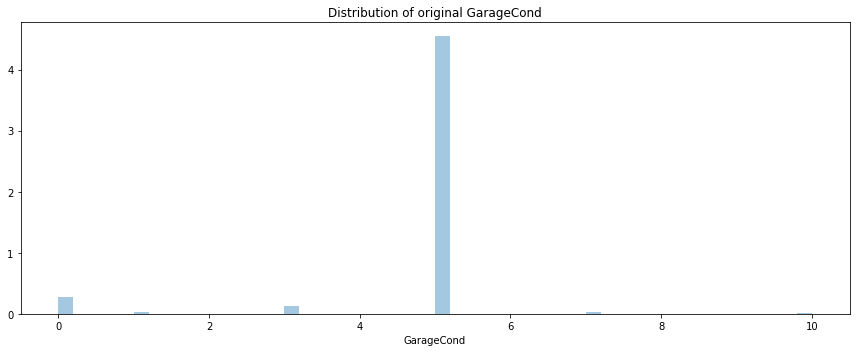

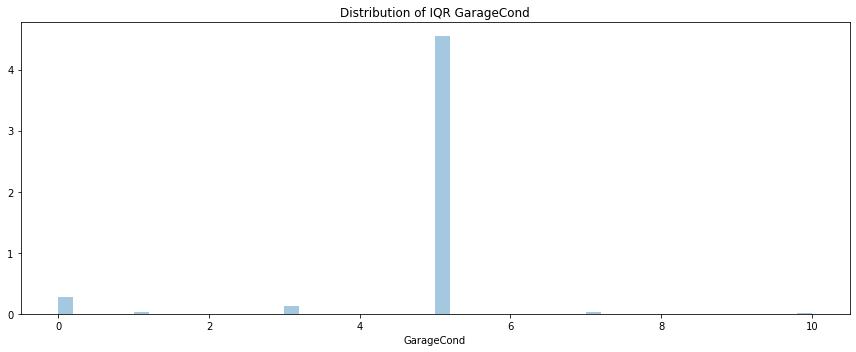

count    2919.000000
mean        2.883522
std         0.381368
min         1.000000
25%         3.000000
50%         3.000000
75%         3.000000
max         3.000000
Name: PavedDrive, dtype: float64
IQR
lower_limit =  3.0    ||    upper_limit =  3.0


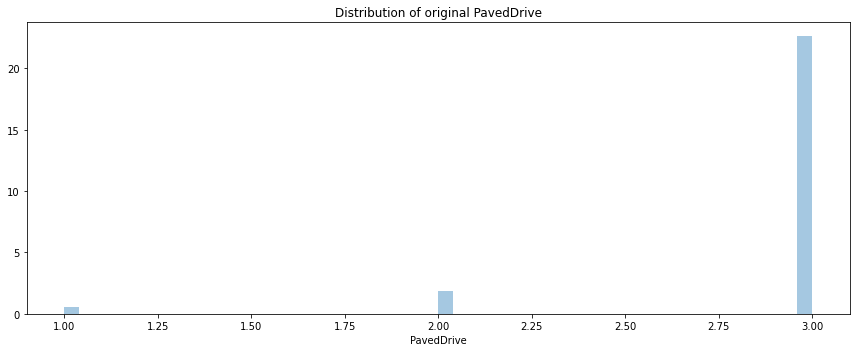

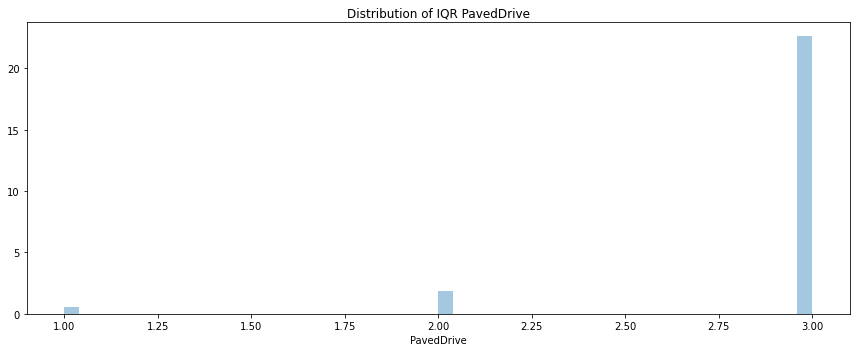

count    2919.000000
mean       93.709832
std       126.526589
min         0.000000
25%         0.000000
50%         0.000000
75%       168.000000
max      1424.000000
Name: WoodDeckSF, dtype: float64
IQR
lower_limit =  -252.0    ||    upper_limit =  420.0


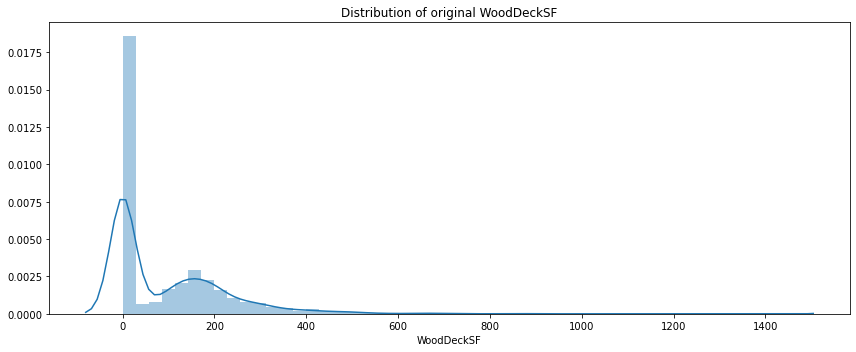

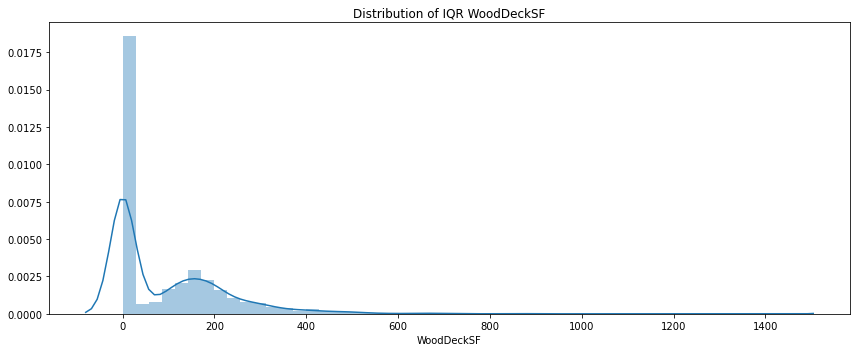

count    2919.000000
mean       47.486811
std        67.575493
min         0.000000
25%         0.000000
50%        26.000000
75%        70.000000
max       742.000000
Name: OpenPorchSF, dtype: float64
IQR
lower_limit =  -105.0    ||    upper_limit =  175.0


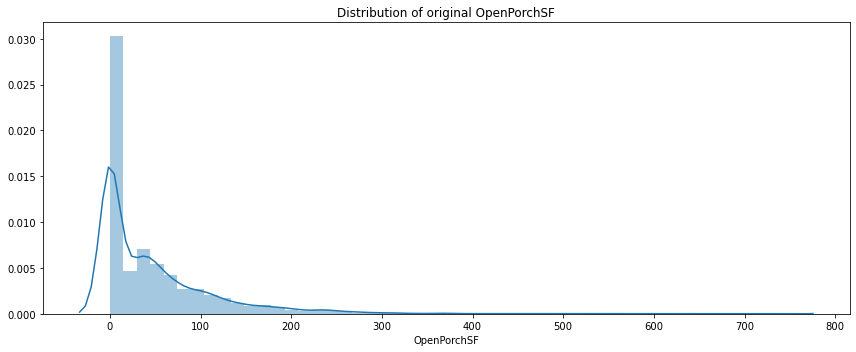

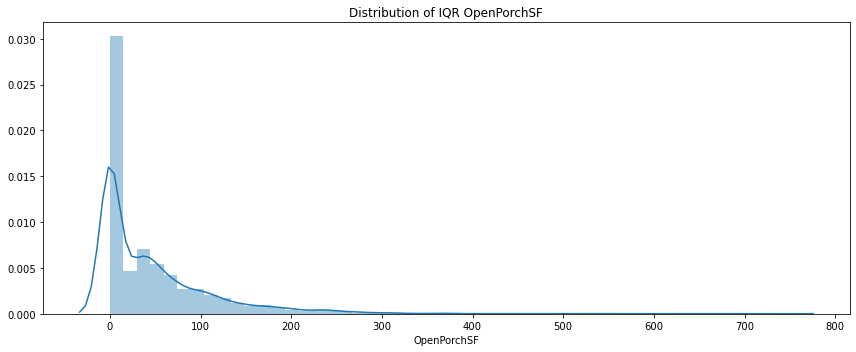

count    2919.000000
mean       23.098321
std        64.244246
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max      1012.000000
Name: EnclosedPorch, dtype: float64
IQR
lower_limit =  0.0    ||    upper_limit =  0.0


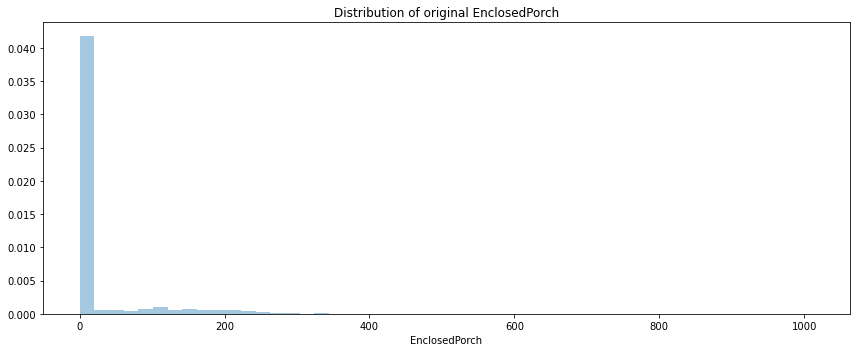

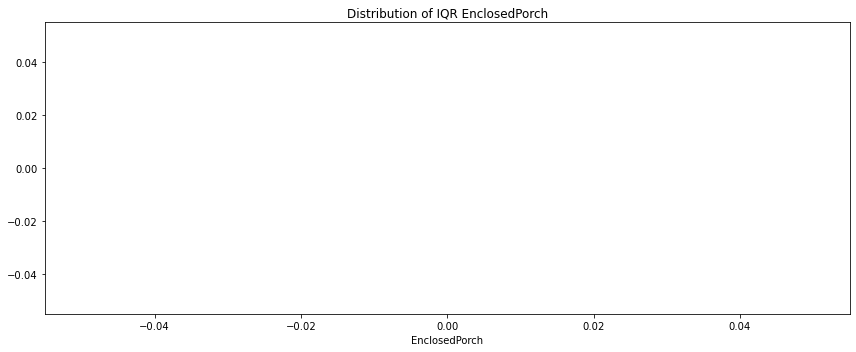

count    2919.000000
mean        2.602261
std        25.188169
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       508.000000
Name: 3SsnPorch, dtype: float64
IQR
lower_limit =  0.0    ||    upper_limit =  0.0


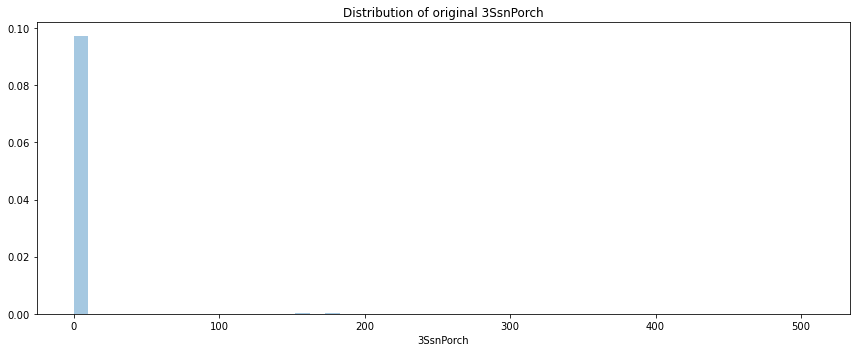

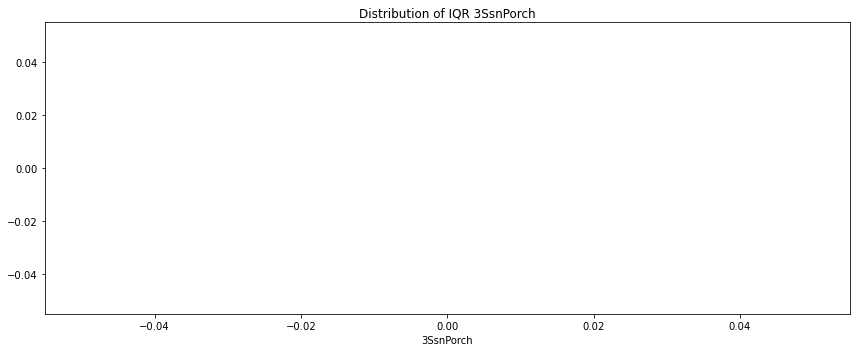

count    2919.000000
mean       16.062350
std        56.184365
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       576.000000
Name: ScreenPorch, dtype: float64
IQR
lower_limit =  0.0    ||    upper_limit =  0.0


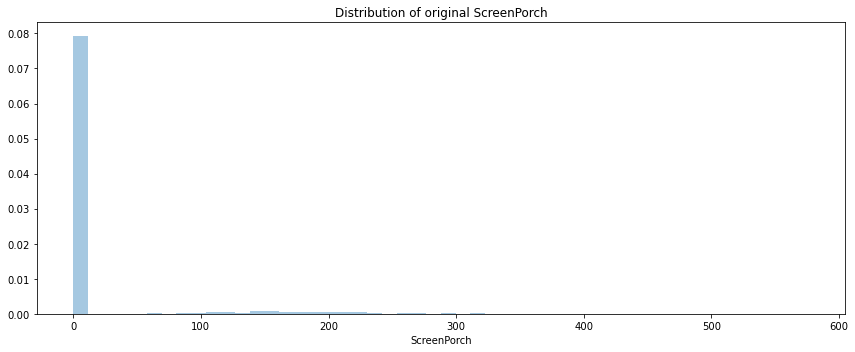

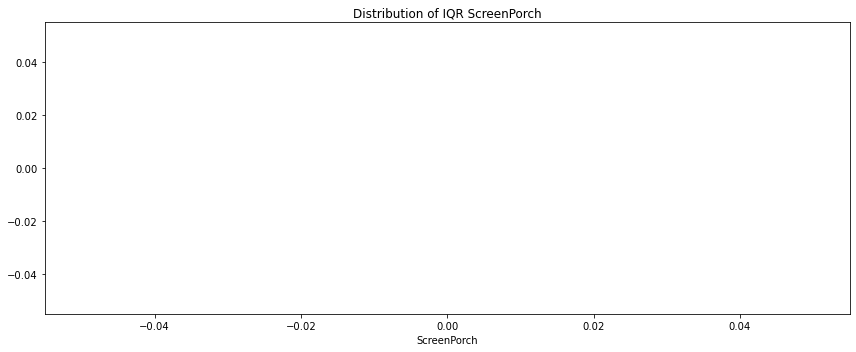

count    2919.000000
mean        2.251799
std        35.663946
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       800.000000
Name: PoolArea, dtype: float64
IQR
lower_limit =  0.0    ||    upper_limit =  0.0


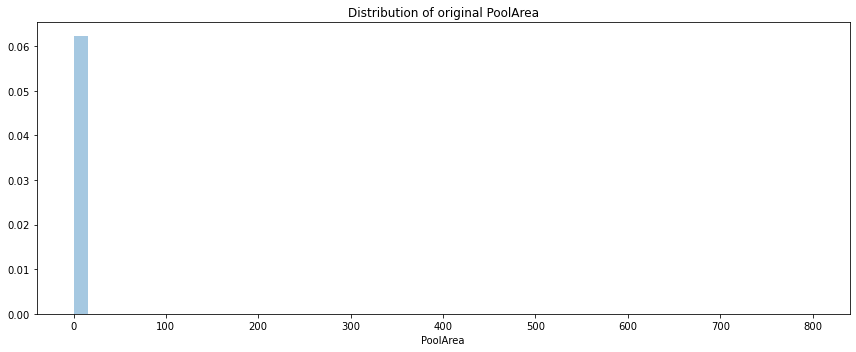

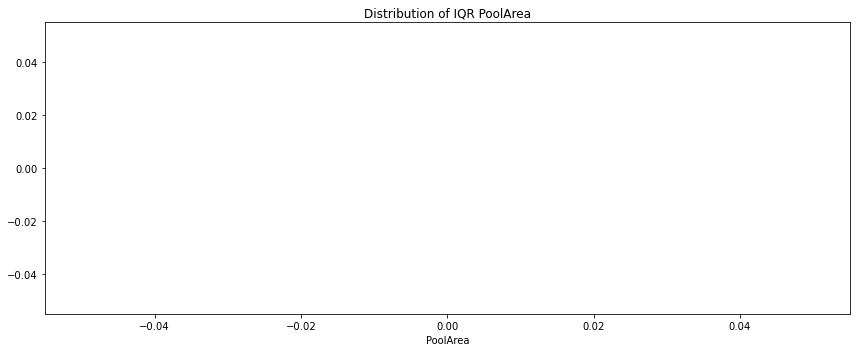

count    2919.000000
mean        0.012333
std         0.221803
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         5.000000
Name: PoolQC, dtype: float64
IQR
lower_limit =  0.0    ||    upper_limit =  0.0


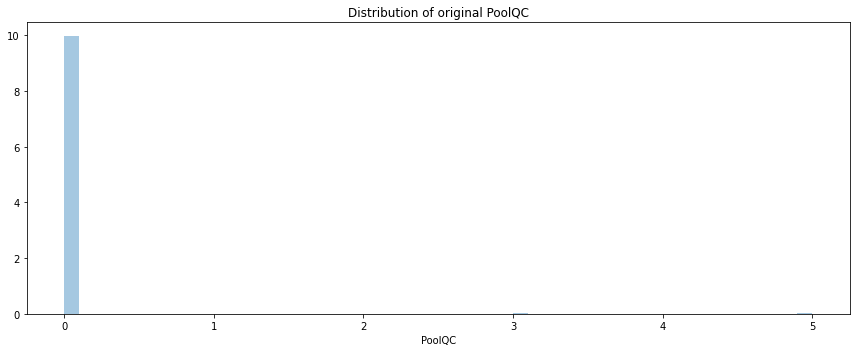

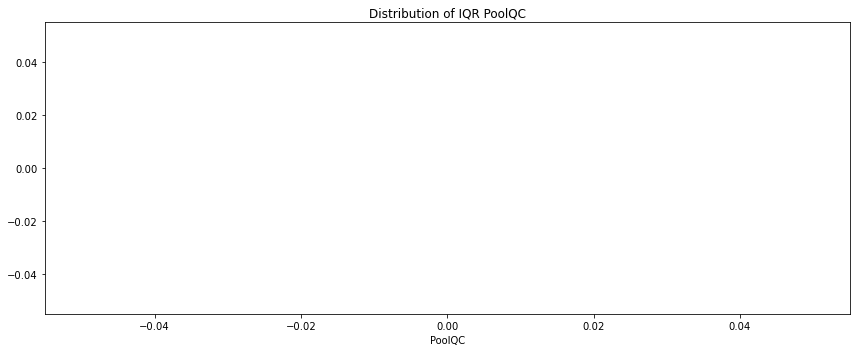

count    2919.000000
mean        0.744433
std         1.570957
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         5.000000
Name: Fence, dtype: float64
IQR
lower_limit =  0.0    ||    upper_limit =  0.0


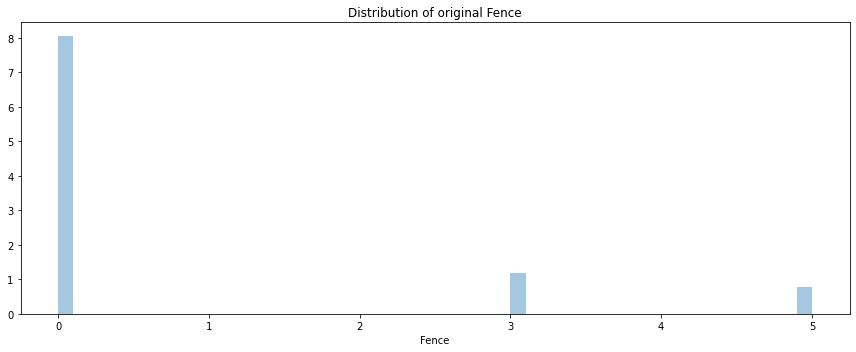

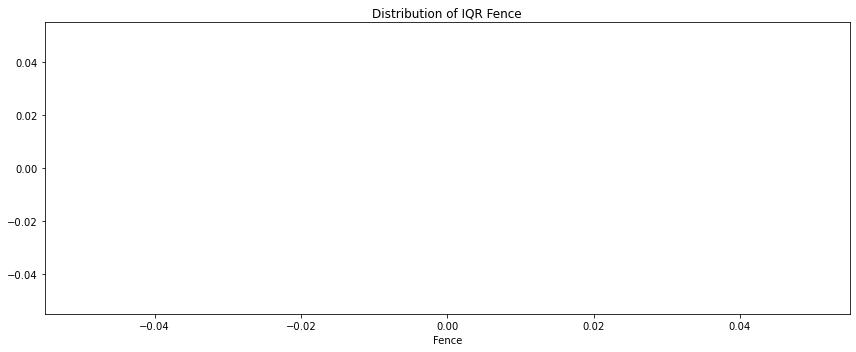

count     2919.000000
mean        50.825968
std        567.402211
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      17000.000000
Name: MiscVal, dtype: float64
IQR
lower_limit =  0.0    ||    upper_limit =  0.0


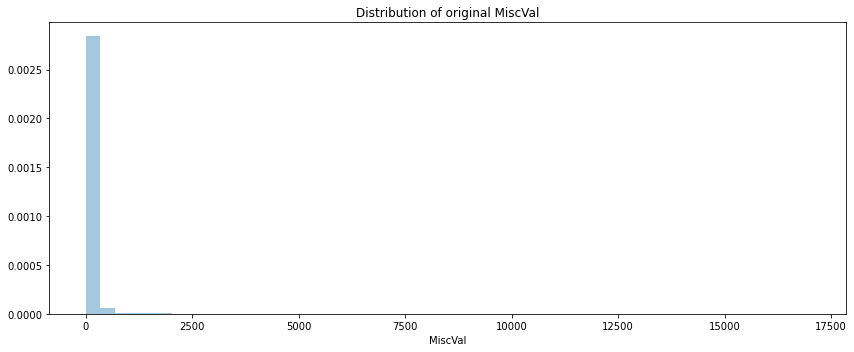

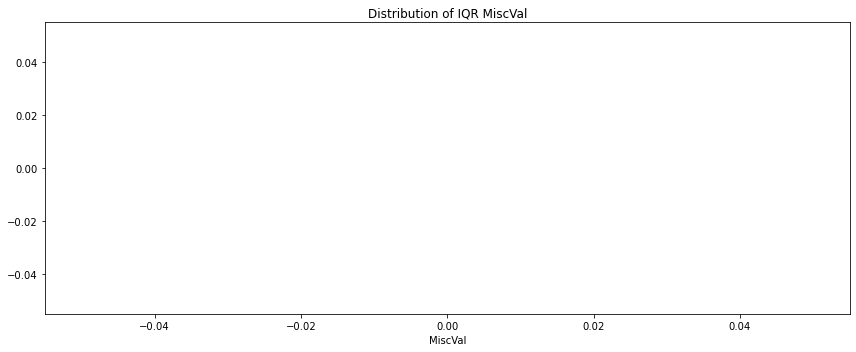

count    2919.000000
mean        6.213087
std         2.714762
min         1.000000
25%         4.000000
50%         6.000000
75%         8.000000
max        12.000000
Name: MoSold, dtype: float64
IQR
lower_limit =  -2.0    ||    upper_limit =  14.0


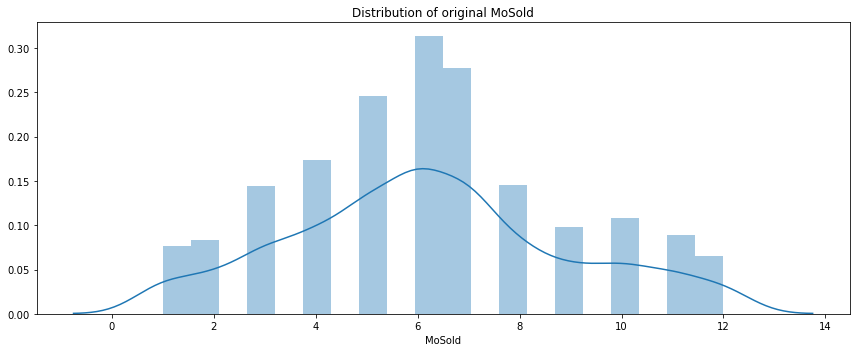

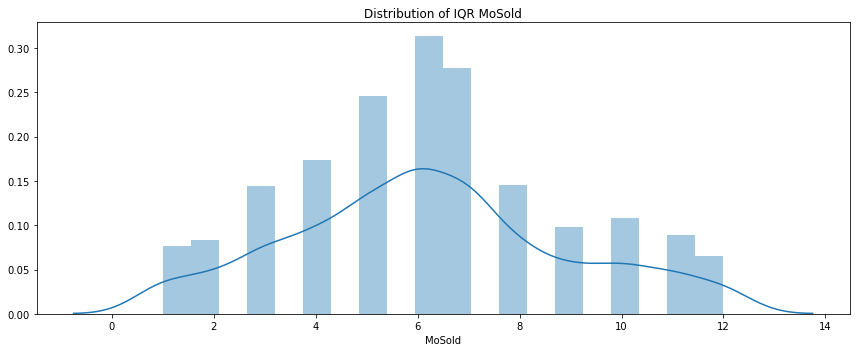

count    2919.000000
mean     2007.792737
std         1.314964
min      2006.000000
25%      2007.000000
50%      2008.000000
75%      2009.000000
max      2010.000000
Name: YrSold, dtype: float64
IQR
lower_limit =  2004.0    ||    upper_limit =  2012.0


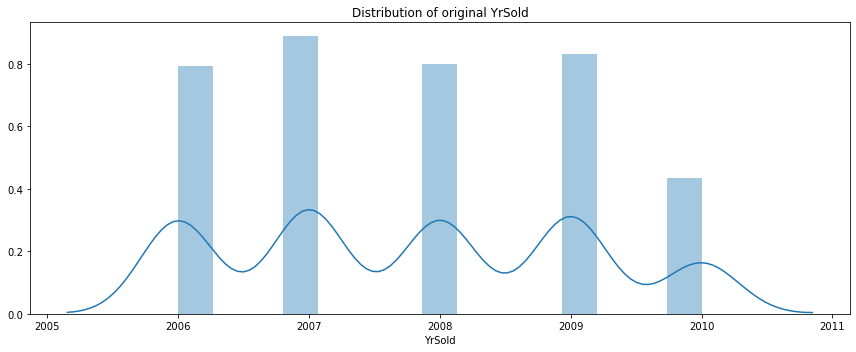

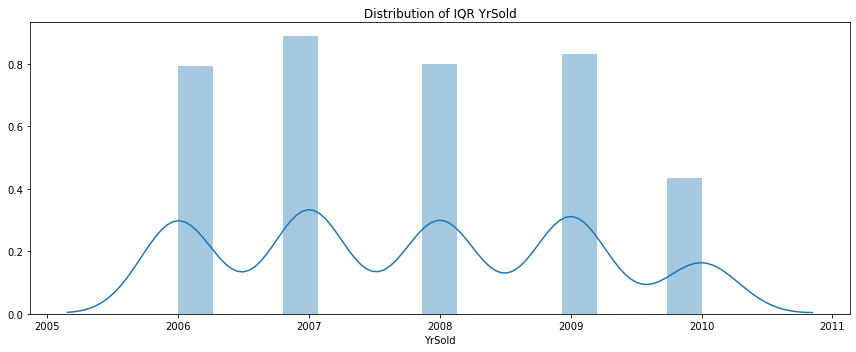

count    2919.000000
mean      182.959575
std       160.021404
min         0.000000
25%        48.000000
50%       164.000000
75%       266.500000
max      1424.000000
Name: total_Max_Porch_Area, dtype: float64
IQR
lower_limit =  -279.75    ||    upper_limit =  594.25


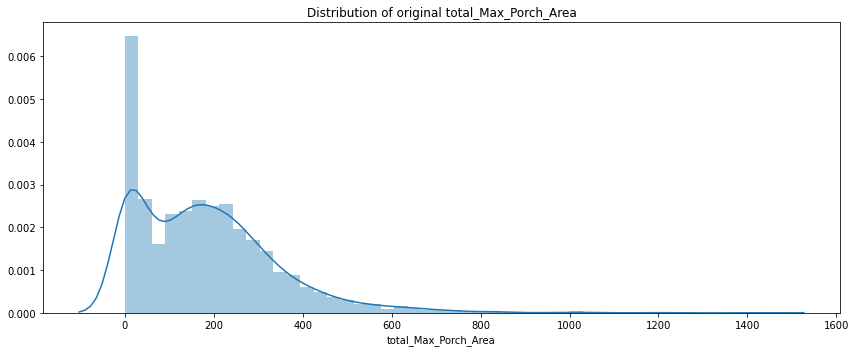

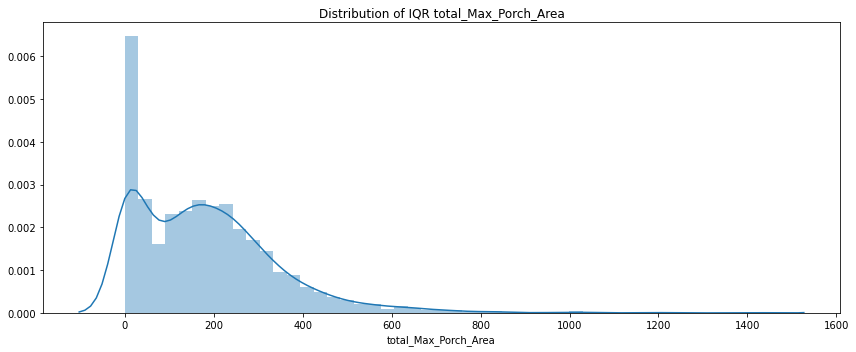

count    2919.000000
mean      182.959575
std       160.021404
min         0.000000
25%        48.000000
50%       164.000000
75%       266.500000
max      1424.000000
Name: total_Porch, dtype: float64
IQR
lower_limit =  -279.75    ||    upper_limit =  594.25


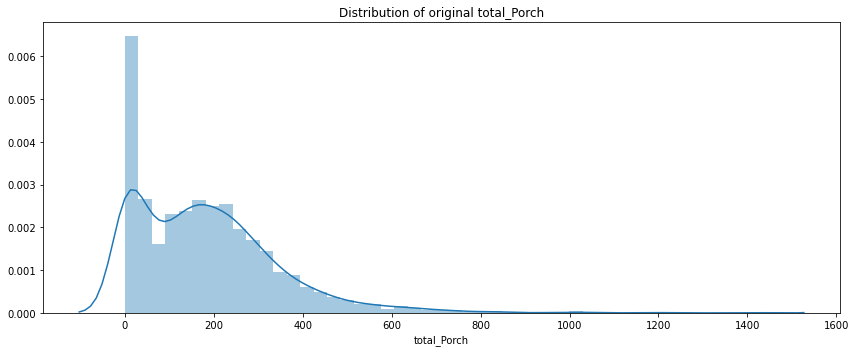

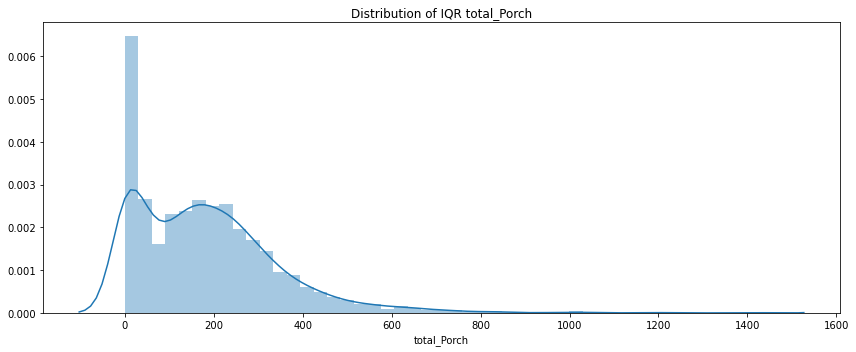

In [17]:
numeric_distribution_plot(merged)

In [40]:
def Calculate_IQR(df,col,get_new_df=False):
        q1 = df[col].quantile(0.25)  ; q3 = df[col].quantile(0.75)
        IQR = q3-q1
        lower_limit = q1 - 1.5*IQR  ; upper_limit = q3 + 1.5*IQR
        print("DESC")
        print(df[col].describe())
        print(" ")
        print('lower_limit = ',lower_limit,'   ||  ',' upper_limit = ',upper_limit)
        print(" ")
        possible_outlier = df[col][(df[col]<lower_limit) | (df[col] > upper_limit)]
        
        new_dist= df[col][(df[col]>lower_limit) & (df[col] < upper_limit)]
        print("Number of possible Outliers = ", len(possible_outlier))
        if len(possible_outlier) > 0:
            print("Outliers : ")
            print("head  : ",possible_outlier.head(3))
            print("tail  : ",possible_outlier.tail(3))
        print("================================================")
        

In [30]:
nums = merged.select_dtypes(exclude='object').columns
nums=nums.drop('Id')

In [54]:
mg= merged.copy()
def FillNan(train):
    cat_col = train.select_dtypes(include='object').columns
    for col in cat_col:
    # do not encode the numerical columns
        train.loc[:, col] = train[col].astype(str).fillna("NONE")
    return train
merged_fill = FillNan(merged)

MSZoning


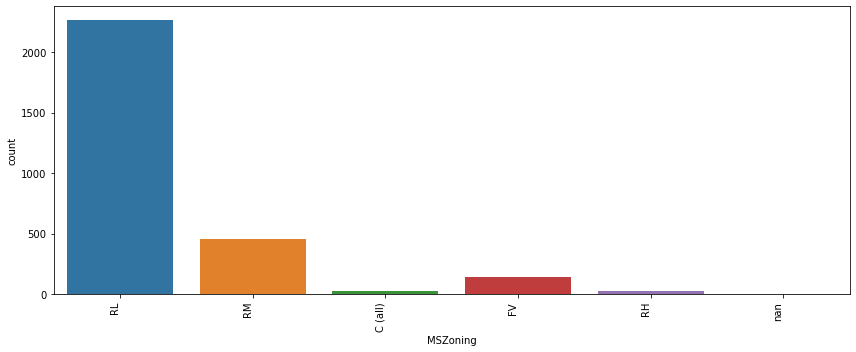

Street


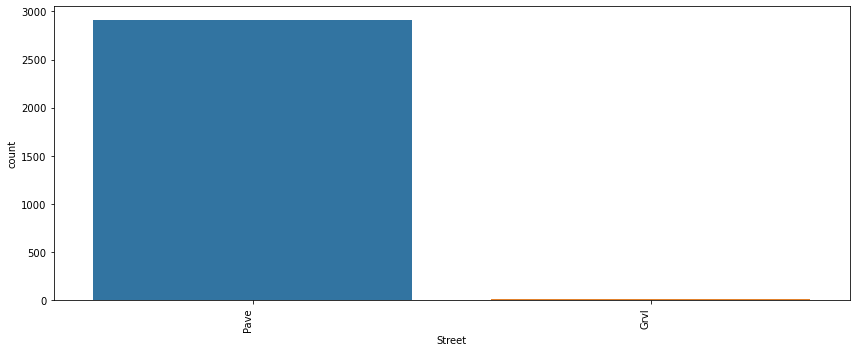

Alley


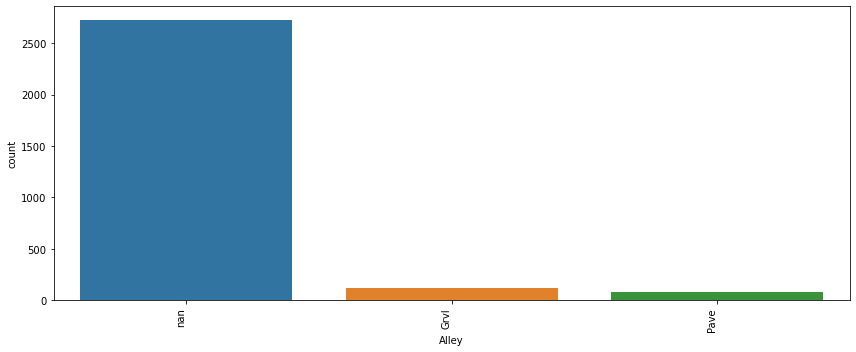

LotShape


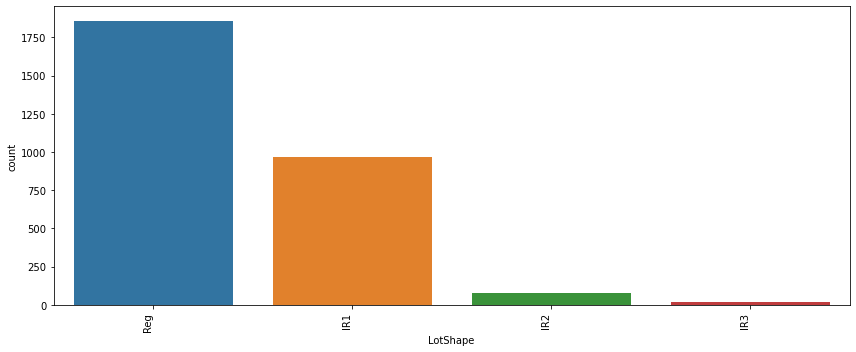

LandContour


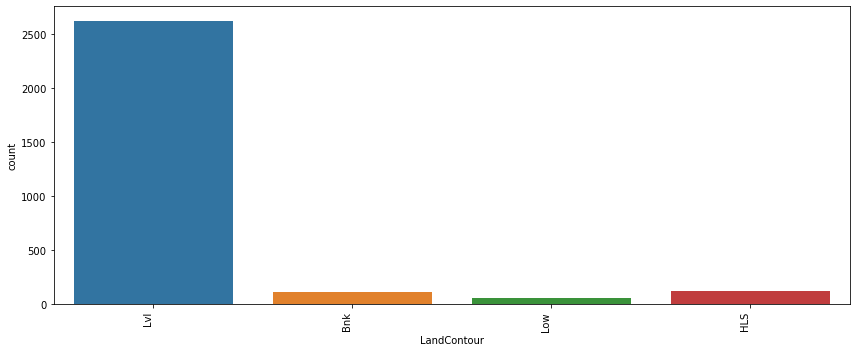

Utilities


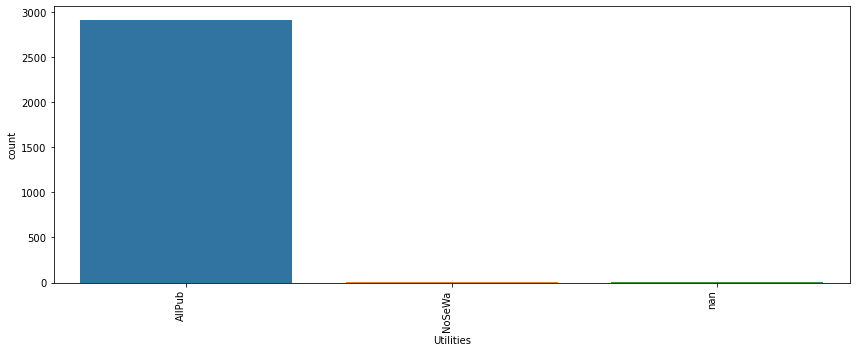

LotConfig


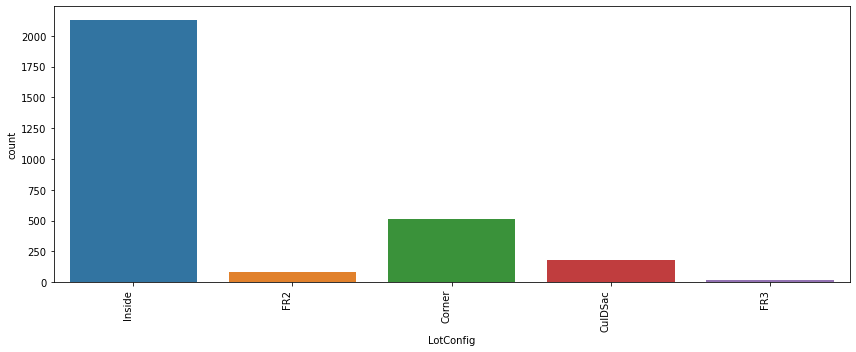

LandSlope


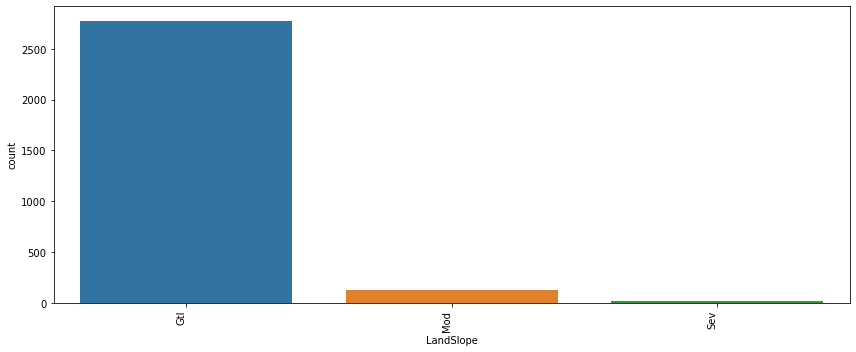

Neighborhood


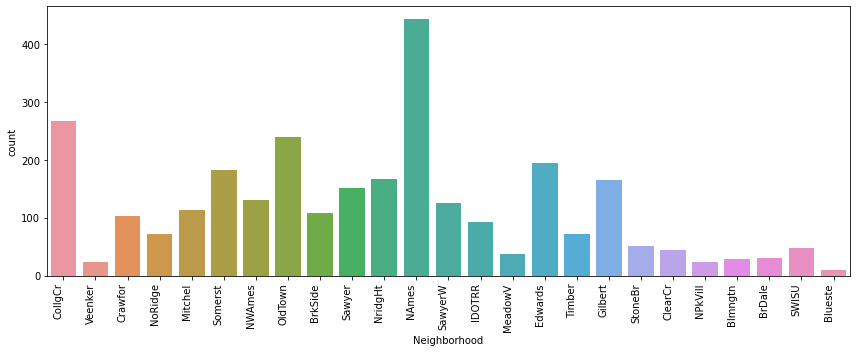

Condition1


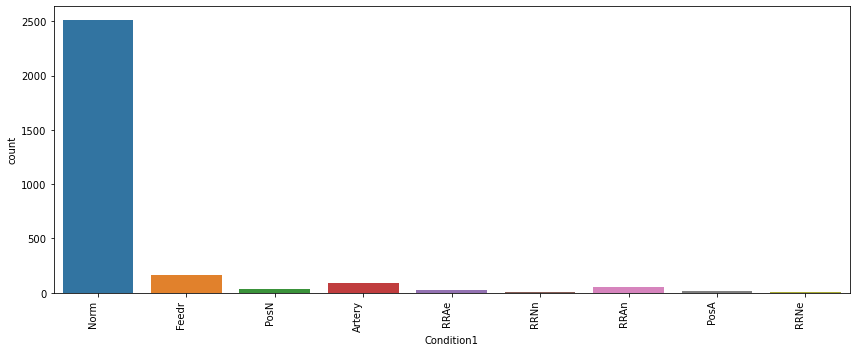

Condition2


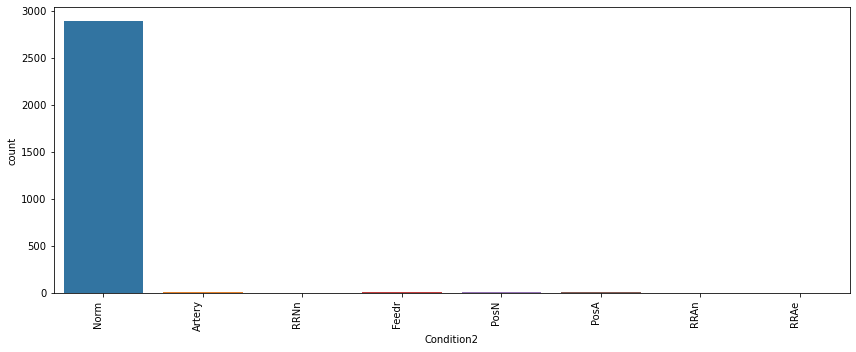

BldgType


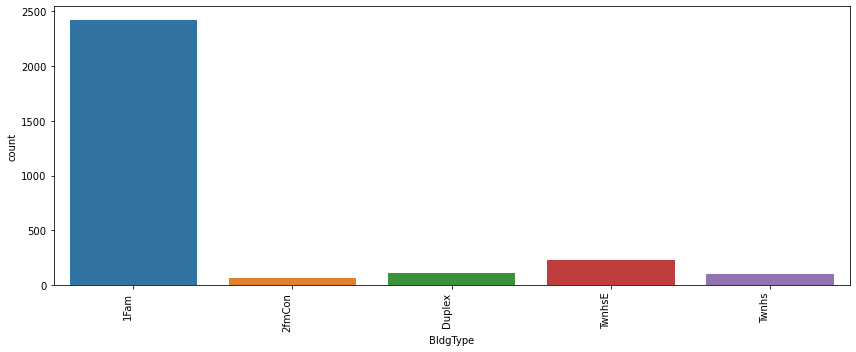

HouseStyle


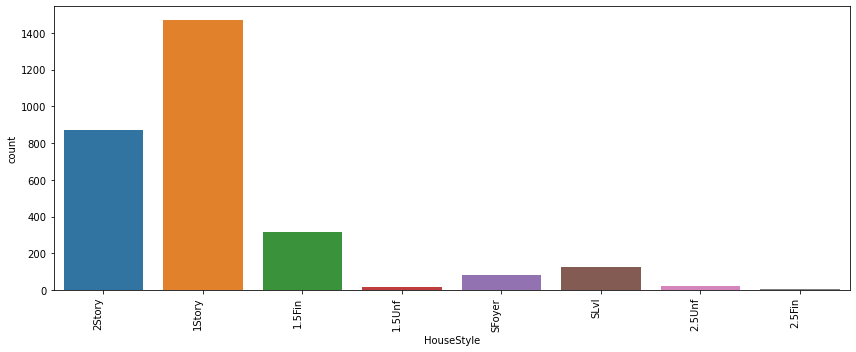

RoofStyle


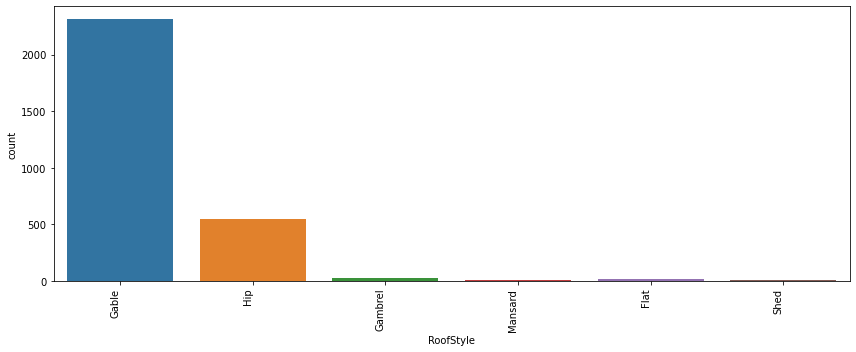

RoofMatl


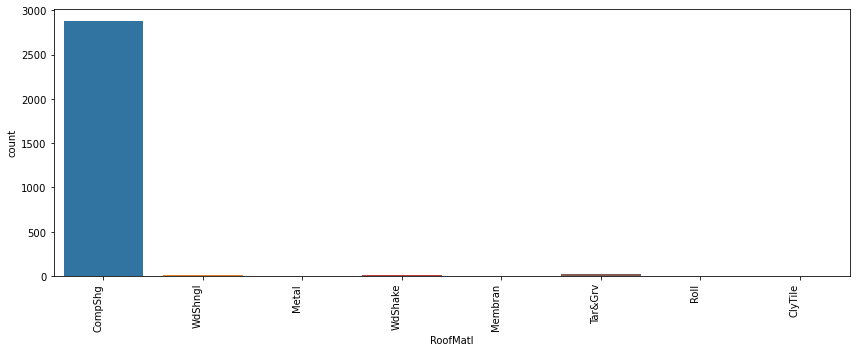

Exterior1st


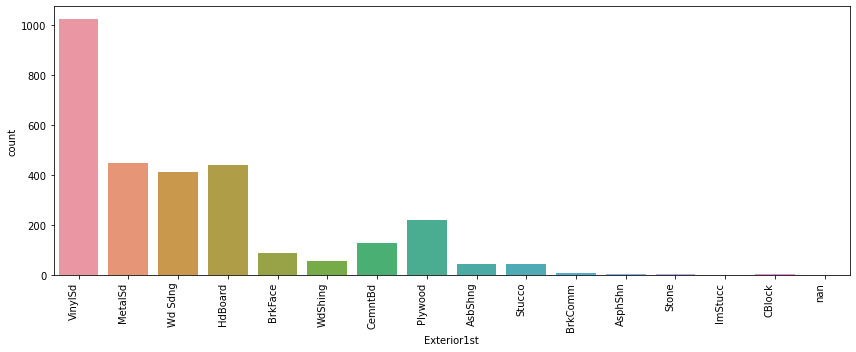

Exterior2nd


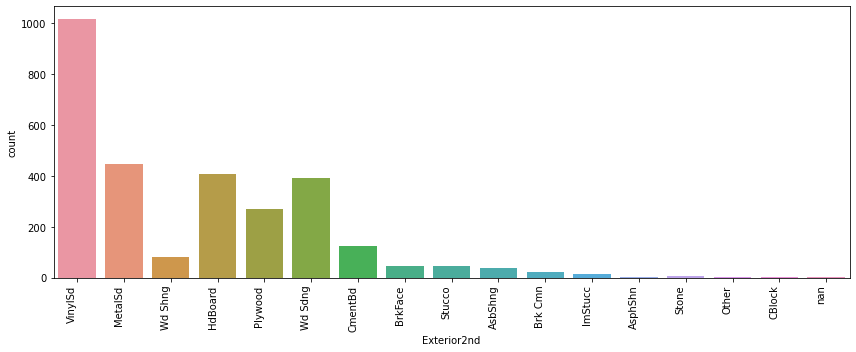

MasVnrType


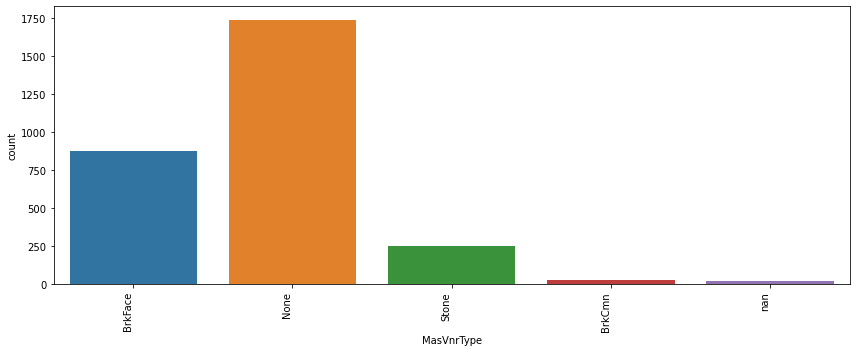

Foundation


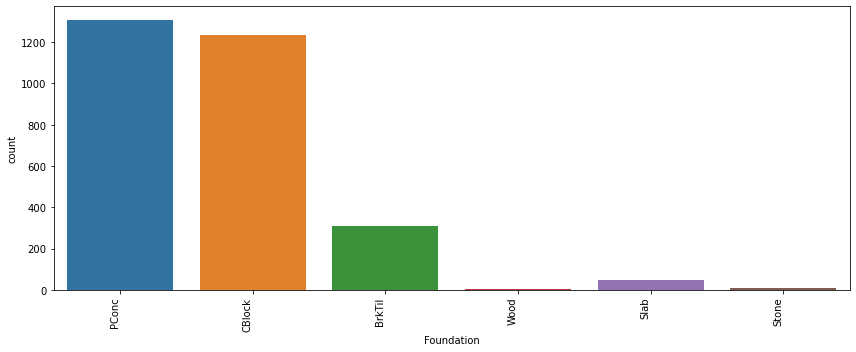

Heating


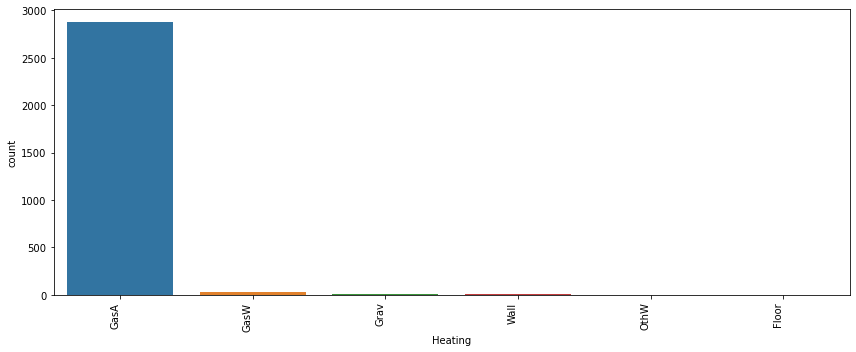

FireplaceQu


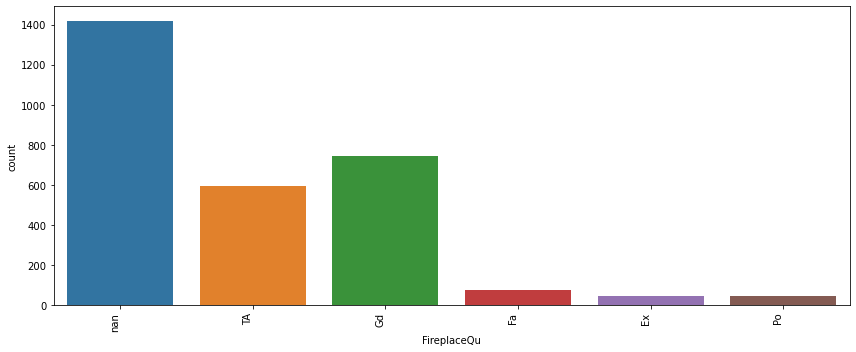

GarageType


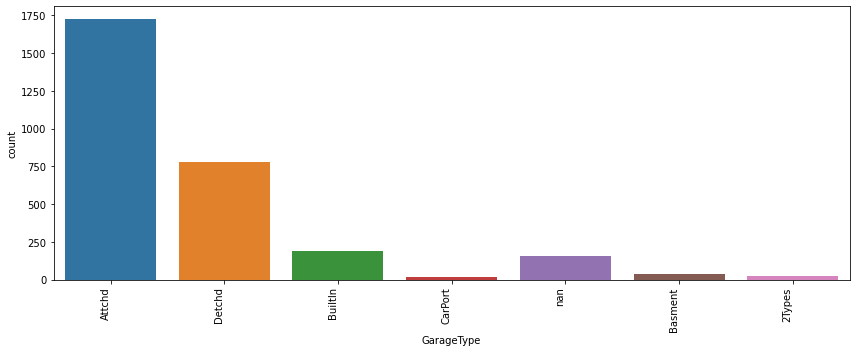

MiscFeature


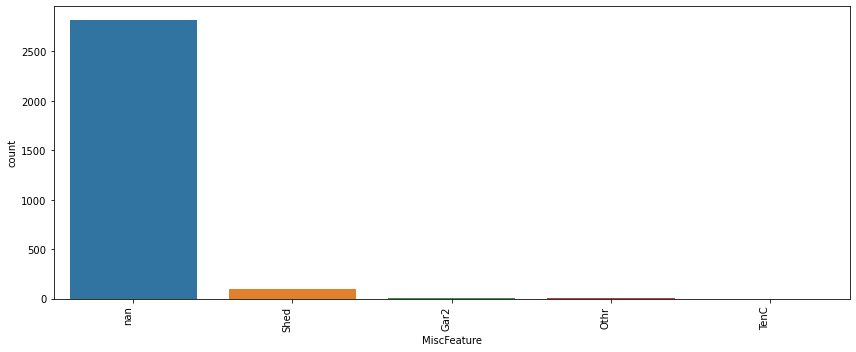

SaleType


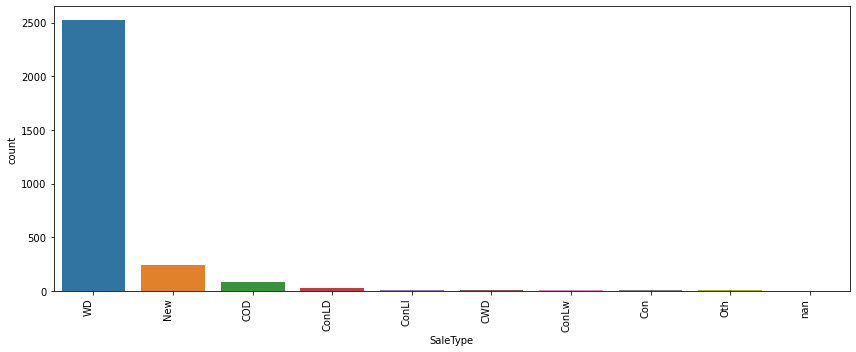

SaleCondition


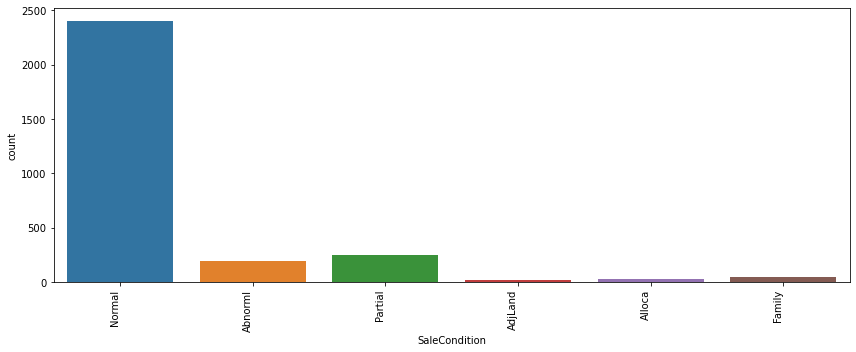

SalePrice


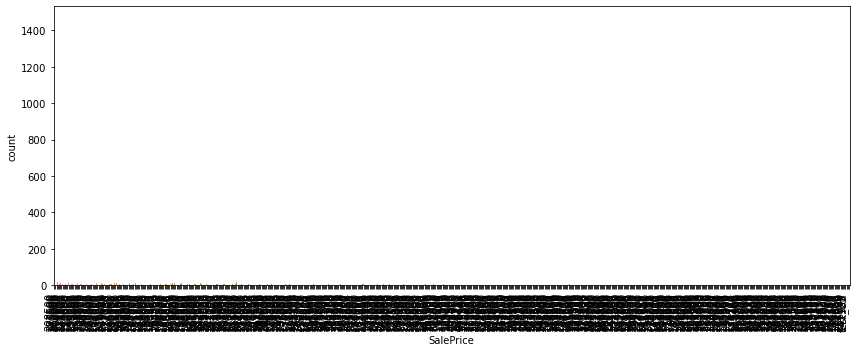

In [55]:
def object_count_plot(df):    
    cats_train = df.select_dtypes(include='object').columns
    for col in cats_train:
        print(col)
        plt.figure(figsize=(12,5))
        g =sns.countplot(x=col,data=df)
        g.set_xticklabels(g.get_xticklabels(),rotation=90,ha='right')
        plt.tight_layout()
        plt.show()
        
object_count_plot(merged_fill)

In [56]:
def Categorical_Value_Counts(train,cats_train):
    for col in cats_train:
        print('=============================================')
        print(col)
        print('length of unique : ',len(train[col].unique()))
        print(train[col].value_counts())
        print('====================================')
Categorical_Value_Counts(merged_fill,cats)        

MSZoning
length of unique :  6
RL         2265
RM          460
FV          139
RH           26
C (all)      25
nan           4
Name: MSZoning, dtype: int64
Street
length of unique :  2
Pave    2907
Grvl      12
Name: Street, dtype: int64
Alley
length of unique :  3
nan     2721
Grvl     120
Pave      78
Name: Alley, dtype: int64
LotShape
length of unique :  4
Reg    1859
IR1     968
IR2      76
IR3      16
Name: LotShape, dtype: int64
LandContour
length of unique :  4
Lvl    2622
HLS     120
Bnk     117
Low      60
Name: LandContour, dtype: int64
Utilities
length of unique :  3
AllPub    2916
nan          2
NoSeWa       1
Name: Utilities, dtype: int64
LotConfig
length of unique :  5
Inside     2133
Corner      511
CulDSac     176
FR2          85
FR3          14
Name: LotConfig, dtype: int64
LandSlope
length of unique :  3
Gtl    2778
Mod     125
Sev      16
Name: LandSlope, dtype: int64
Neighborhood
length of unique :  25
NAmes      443
CollgCr    267
OldTown    239
Edwards    194
Some

In [ ]:
# maybe importnat
'MSZoning'


In [57]:
# scanty binary
Access =['Street','Alley']

In [58]:
def create_combination_cat_columns(df, cat_cols):
    import itertools
    combi = list(itertools.combinations(cat_cols, 2))
    for c1, c2 in combi:
        df.loc[:, c1 + "_" + c2] = df[c1].astype(str) + "_" + df[c2].astype(str)
    return df
create_combination_cat_columns(df=merged_fill, cat_cols=Access)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   nan      Reg   
1        2          20       RL         80.0     9600   Pave   nan      Reg   
2        3          60       RL         68.0    11250   Pave   nan      IR1   
3        4          70       RL         60.0     9550   Pave   nan      IR1   
4        5          60       RL         84.0    14260   Pave   nan      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
2914  2915         160       RM         21.0     1936   Pave   nan      Reg   
2915  2916         160       RM         21.0     1894   Pave   nan      Reg   
2916  2917          20       RL        160.0    20000   Pave   nan      Reg   
2917  2918          85       RL         62.0    10441   Pave   nan      Reg   
2918  2919          60       RL         74.0     9627   Pave   nan      Reg   

     LandContour Utilities  ... MiscFeature MiscVal MoSold YrSold SaleType  \
0            Lvl    AllPub  ...         nan       0      2   2008       WD   
1            Lvl    AllPub  ...         nan       0      5   2007       WD   
2            Lvl    AllPub  ...         nan       0      9   2008       WD   
3            Lvl    AllPub  ...         nan       0      2   2006       WD   
4            Lvl    AllPub  ...         nan       0     12   2008       WD   
...          ...       ...  ...         ...     ...    ...    ...      ...   
2914         Lvl    AllPub  ...         nan       0      6   2006       WD   
2915         Lvl    AllPub  ...         nan       0      4   2006       WD   
2916         Lvl    AllPub  ...         nan       0      9   2006       WD   
2917         Lvl    AllPub  ...        Shed     700      7   2006       WD   
2918         Lvl    AllPub  ...         nan       0     11   2006       WD   

     SaleCondition SalePrice  total_Max_Porch_Area  total_Porch  Street_Alley  
0           Normal    208500                    61           61      Pave_nan  
1           Normal    181500                   298          298      Pave_nan  
2           Normal    223500                    42           42      Pave_nan  
3          Abnorml    140000                   307          307      Pave_nan  
4           Normal    250000                   276          276      Pave_nan  
...            ...       ...                   ...          ...           ...  
2914        Normal  test_col                     0            0      Pave_nan  
2915       Abnorml  test_col                    24           24      Pave_nan  
2916       Abnorml  test_col                   474          474      Pave_nan  
2917        Normal  test_col                   112          112      Pave_nan  
2918        Normal  test_col                   238          238      Pave_nan  

[2919 rows x 84 columns]

In [59]:
merged_fill.Street_Alley.value_counts()

Pave_nan     2709
Pave_Grvl     120
Pave_Pave      78
Grvl_nan       12
Name: Street_Alley, dtype: int64

In [242]:
train_df = merged_fill.loc[merged_fill.SalePrice!='test_col'].reset_index(drop=True)
test_df = merged.loc[merged_fill.SalePrice =='test_col'].reset_index(drop=True)
train_df.SalePrice = train_df.SalePrice.apply(int)

In [85]:
def box_swarm_plot(data,categorical,numerical):
    print(categorical)
    plt.figure(figsize=(10,6))
    ax=sns.boxplot(x=categorical,y= numerical,data=data,dodge=False)
    ax=sns.swarmplot(x=categorical,y=numerical,data=train_df,dodge=False,color='0.25')
    plt.show()
    

In [160]:
train_df.select_dtypes(exclude='object')

Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  \
0        1          60         65.0     8450            7            5   
1        2          20         80.0     9600            6            8   
2        3          60         68.0    11250            7            5   
3        4          70         60.0     9550            7            5   
4        5          60         84.0    14260            8            5   
...    ...         ...          ...      ...          ...          ...   
1455  1456          60         62.0     7917            6            5   
1456  1457          20         85.0    13175            6            6   
1457  1458          70         66.0     9042            7            9   
1458  1459          20         68.0     9717            5            6   
1459  1460          20         75.0     9937            5            6   

      YearBuilt  YearRemodAdd  MasVnrArea  ExterQual  ...  no_finishes  \
0          2003          2003       196.0          7  ...      13274.0   
1          1976          1976         0.0          5  ...      13846.0   
2          2001          2002       162.0          7  ...      16350.0   
3          1915          1970         0.0          5  ...      14382.0   
4          2000          2000       350.0          7  ...      20637.0   
...         ...           ...         ...        ...  ...          ...   
1455       1999          2000         0.0          5  ...      12624.0   
1456       1978          1988       119.0          5  ...      19363.0   
1457       1941          2006         0.0         10  ...      15126.0   
1458       1950          1996         0.0          5  ...      13191.0   
1459       1965          1965         0.0          7  ...      13981.0   

      no_finishes_perc  house_story  house_finish  YearBuilt_Age  Remodeled  \
0                  1.0          2.0             1              8        0.0   
1                  1.0          1.0             1             35        0.0   
2                  1.0          2.0             1             10        1.0   
3                  1.0          2.0             1             96        1.0   
4                  1.0          2.0             1             11        0.0   
...                ...          ...           ...            ...        ...   
1455               1.0          2.0             1             12        1.0   
1456               1.0          1.0             1             33        1.0   
1457               1.0          2.0             1             70        1.0   
1458               1.0          1.0             1             61        1.0   
1459               1.0          1.0             1             46        0.0   

      YearRemodAdd_Age  YrBlt_YrRmd_Diff  YrSd_YrBlt  YrSd_YrRmd  
0                    8                 0           5           5  
1                   35                 0          31          31  
2                    9                 1           7           6  
3                   41                55          91          36  
4                   11                 0           8           8  
...                ...               ...         ...         ...  
1455                11                 1           8           7  
1456                23                10          32          22  
1457                 5                65          69           4  
1458                15                46          60          14  
1459                46                 0          43          43  

[1460 rows x 74 columns]

In [174]:
numerical.isna().sum()

Id                  0
MSSubClass          0
LotFrontage         0
LotArea             0
OverallQual         0
                   ..
Remodeled           0
YearRemodAdd_Age    0
YrBlt_YrRmd_Diff    0
YrSd_YrBlt          0
YrSd_YrRmd          0
Length: 74, dtype: int64

In [173]:
def Fill_Num_NAN(df,target):
    nums = df.select_dtypes(exclude='object').columns
    for col in nums.drop(target): 
        imputer = df[col].median()
        df.loc[:, col] = df[col].fillna(imputer)
    return df

In [245]:
numerical = train_df.select_dtypes(exclude='object')
numerical =Fill_Num_NAN(numerical,"SalePrice")

In [175]:
numerical

Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  \
0        1          60         65.0     8450            7            5   
1        2          20         80.0     9600            6            8   
2        3          60         68.0    11250            7            5   
3        4          70         60.0     9550            7            5   
4        5          60         84.0    14260            8            5   
...    ...         ...          ...      ...          ...          ...   
1455  1456          60         62.0     7917            6            5   
1456  1457          20         85.0    13175            6            6   
1457  1458          70         66.0     9042            7            9   
1458  1459          20         68.0     9717            5            6   
1459  1460          20         75.0     9937            5            6   

      YearBuilt  YearRemodAdd  MasVnrArea  ExterQual  ...  no_finishes  \
0          2003          2003       196.0          7  ...      13274.0   
1          1976          1976         0.0          5  ...      13846.0   
2          2001          2002       162.0          7  ...      16350.0   
3          1915          1970         0.0          5  ...      14382.0   
4          2000          2000       350.0          7  ...      20637.0   
...         ...           ...         ...        ...  ...          ...   
1455       1999          2000         0.0          5  ...      12624.0   
1456       1978          1988       119.0          5  ...      19363.0   
1457       1941          2006         0.0         10  ...      15126.0   
1458       1950          1996         0.0          5  ...      13191.0   
1459       1965          1965         0.0          7  ...      13981.0   

      no_finishes_perc  house_story  house_finish  YearBuilt_Age  Remodeled  \
0                  1.0          2.0             1              8        0.0   
1                  1.0          1.0             1             35        0.0   
2                  1.0          2.0             1             10        1.0   
3                  1.0          2.0             1             96        1.0   
4                  1.0          2.0             1             11        0.0   
...                ...          ...           ...            ...        ...   
1455               1.0          2.0             1             12        1.0   
1456               1.0          1.0             1             33        1.0   
1457               1.0          2.0             1             70        1.0   
1458               1.0          1.0             1             61        1.0   
1459               1.0          1.0             1             46        0.0   

      YearRemodAdd_Age  YrBlt_YrRmd_Diff  YrSd_YrBlt  YrSd_YrRmd  
0                    8                 0           5           5  
1                   35                 0          31          31  
2                    9                 1           7           6  
3                   41                55          91          36  
4                   11                 0           8           8  
...                ...               ...         ...         ...  
1455                11                 1           8           7  
1456                23                10          32          22  
1457                 5                65          69           4  
1458                15                46          60          14  
1459                46                 0          43          43  

[1460 rows x 74 columns]

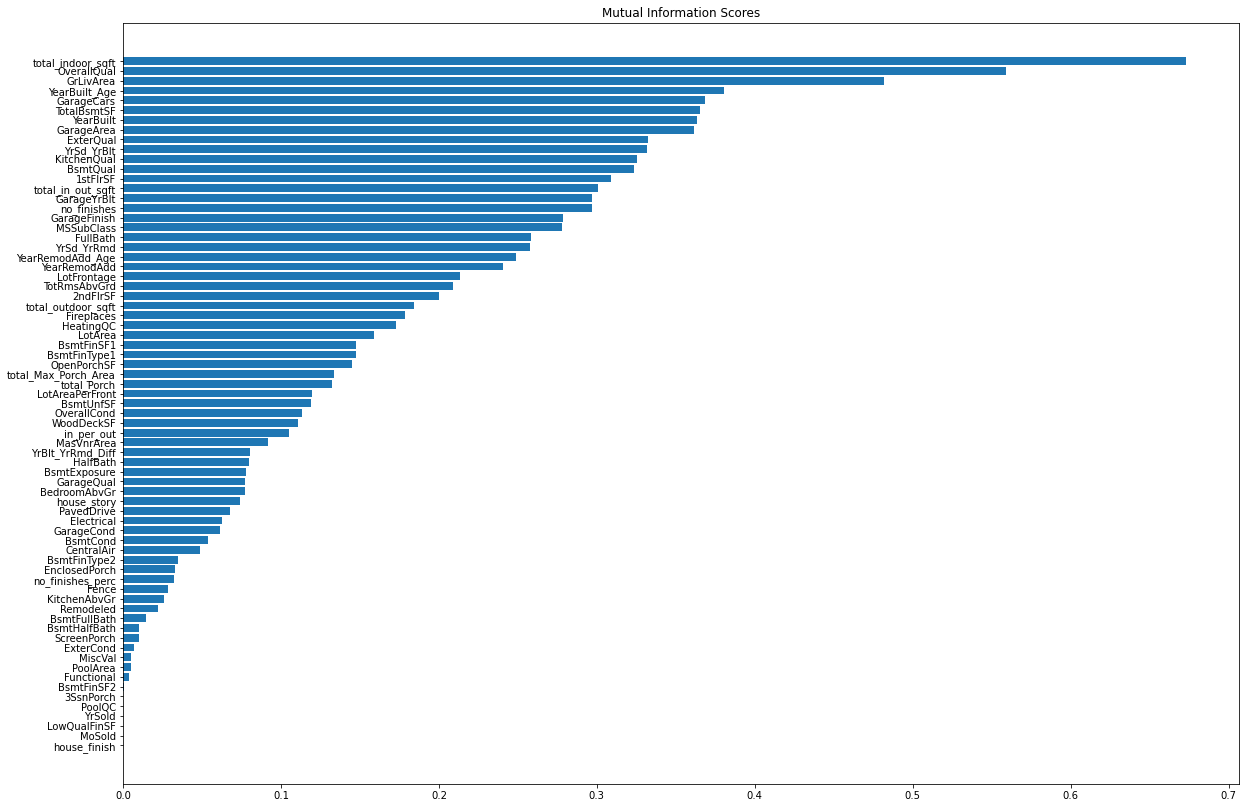

In [178]:
from sklearn.feature_selection import mutual_info_regression
def make_mi_scores_Regression(X_train, y_train):    
    discrete_features = X_train.dtypes == int
    mi_scores = mutual_info_regression(X_train, y_train, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X_train.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

score = make_mi_scores_Regression(X_train=numerical.drop(['Id','SalePrice','area_per_finishes'],axis=1), y_train=train_df.SalePrice)

def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.figure(figsize=(20,14))
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")
    
plot_mi_scores(score)

In [180]:
score.head(20)

total_indoor_sqft    0.672842
OverallQual          0.558871
GrLivArea            0.481800
YearBuilt_Age        0.380439
GarageCars           0.368261
TotalBsmtSF          0.365427
YearBuilt            0.363197
GarageArea           0.361573
ExterQual            0.332499
YrSd_YrBlt           0.332043
KitchenQual          0.325706
BsmtQual             0.323808
1stFlrSF             0.308895
total_in_out_sqft    0.300506
GarageYrBlt          0.297063
no_finishes          0.296839
GarageFinish         0.278636
MSSubClass           0.277740
FullBath             0.258532
YrSd_YrRmd           0.257660
Name: MI Scores, dtype: float64

Street_Alley


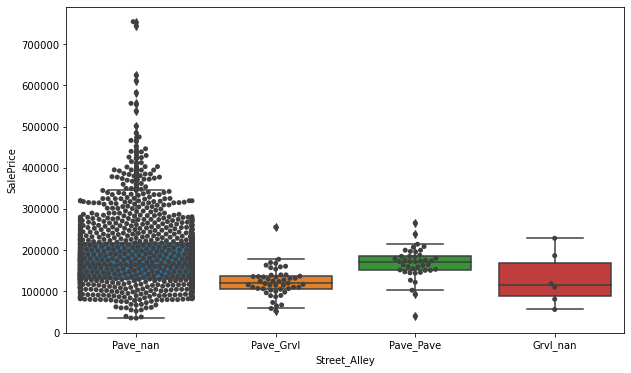

LotShape_LandContour


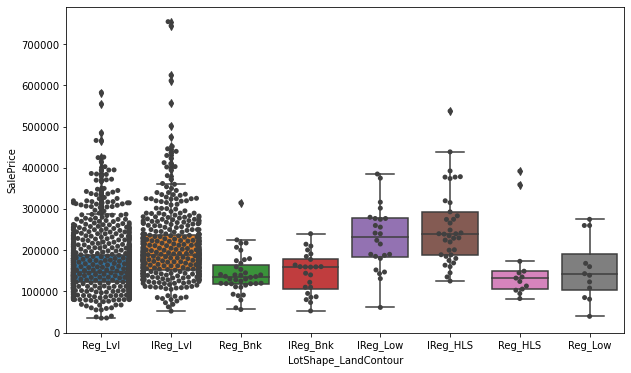

LotShape_LotConfig


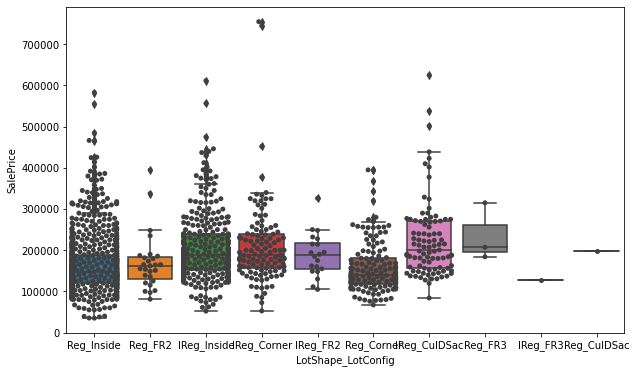

LotShape_LandSlope


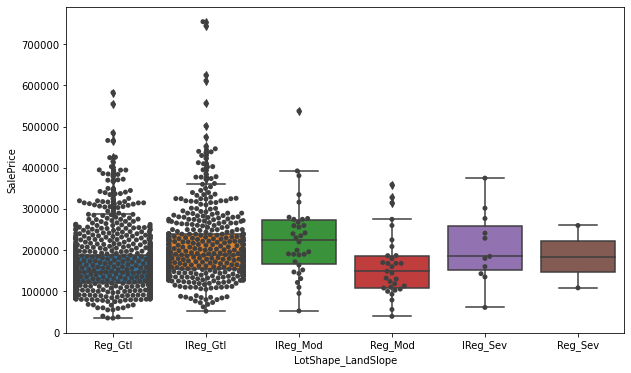

Condition1_Condition2


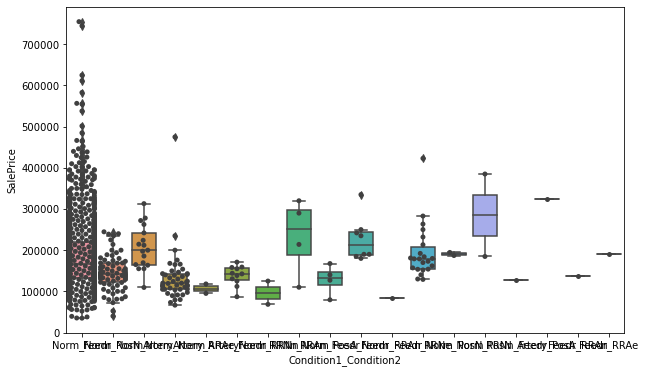

Exterior1st_Exterior2nd


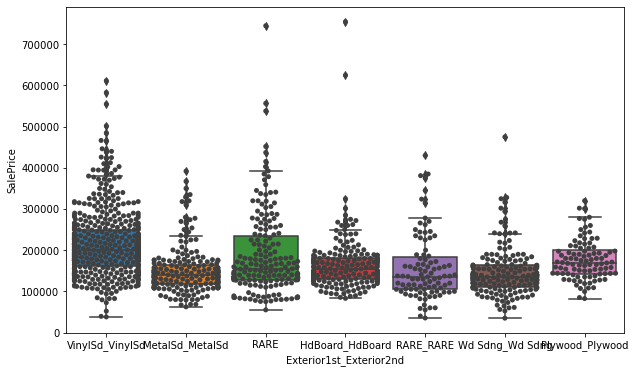

Foundation_MasVnrType


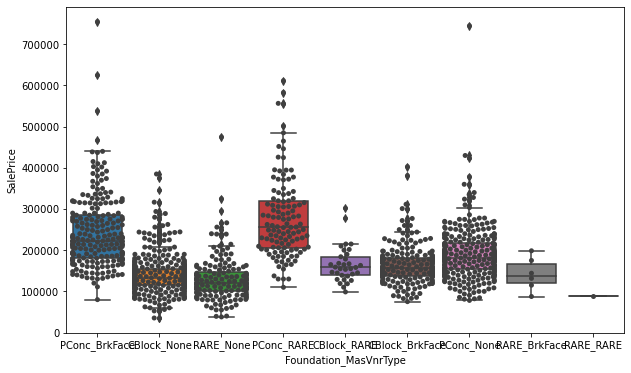

SaleCondition_SaleType


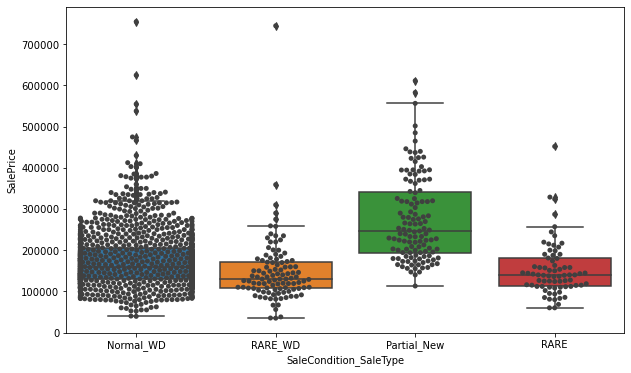

Exterior1st_Exterior2nd


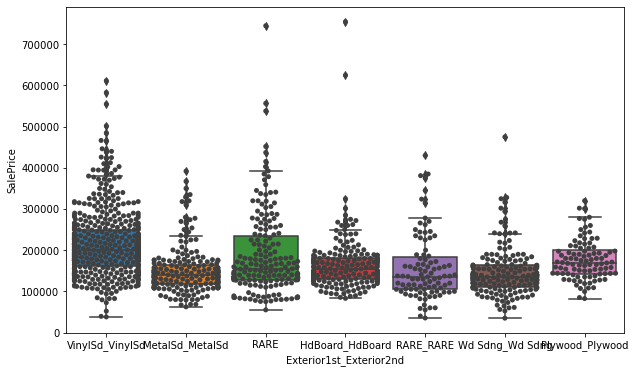

Foundation_MasVnrType


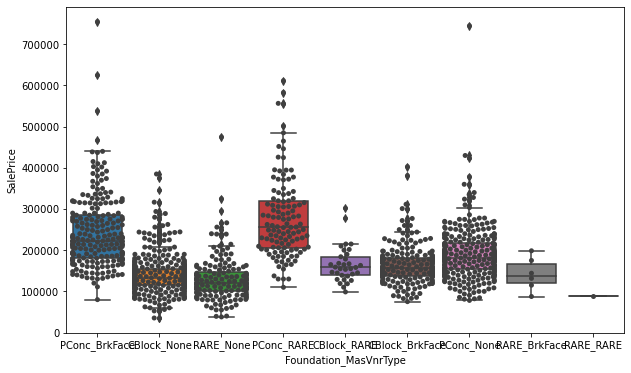

SaleCondition_SaleType


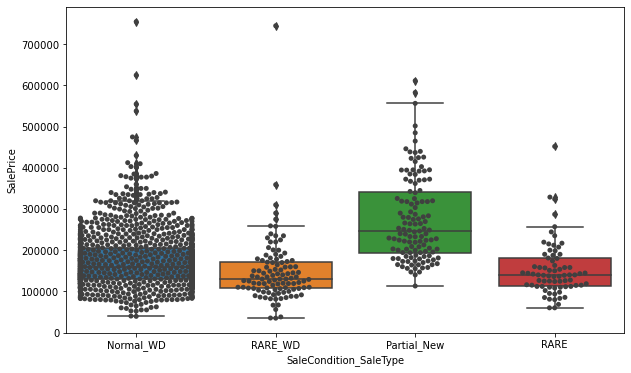

In [236]:
for col in new_cols_cats:
    box_swarm_plot(train_df,col,'SalePrice')

In [238]:
Categorical_Value_Counts(merged_fill,new_cols_cats)

Street_Alley
length of unique :  4
Pave_nan     2709
Pave_Grvl     120
Pave_Pave      78
Grvl_nan       12
Name: Street_Alley, dtype: int64
LotShape_LandContour
length of unique :  8
Reg_Lvl     1728
IReg_Lvl     894
IReg_HLS      89
Reg_Bnk       76
IReg_Bnk      41
IReg_Low      36
Reg_HLS       31
Reg_Low       24
Name: LotShape_LandContour, dtype: int64
LotShape_LotConfig
length of unique :  10
Reg_Inside      1503
IReg_Inside      630
Reg_Corner       295
IReg_Corner      216
IReg_CulDSac     173
Reg_FR2           51
IReg_FR2          34
Reg_FR3            7
IReg_FR3           7
Reg_CulDSac        3
Name: LotShape_LotConfig, dtype: int64
LotShape_LandSlope
length of unique :  6
Reg_Gtl     1796
IReg_Gtl     982
IReg_Mod      65
Reg_Mod       60
IReg_Sev      13
Reg_Sev        3
Name: LotShape_LandSlope, dtype: int64
Condition1_Condition2
length of unique :  22
Norm_Norm        2511
Feedr_Norm        155
Artery_Norm        89
RRAn_Norm          41
PosN_Norm          35
RRAe_Norm   

In [ ]:
#'LotShape_LotConfig',180
# 'LotShape_LandSlope',70
#'Condition1_Condition2',100
# Foundation_MasVnrType,230


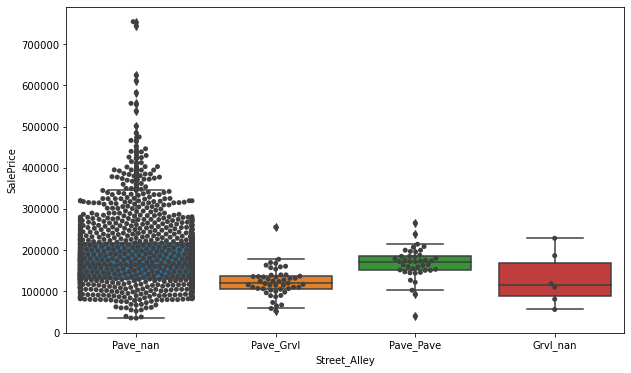

In [84]:
plt.figure(figsize=(10,6))
ax=sns.boxplot(x='Street_Alley',y='SalePrice',data=train_df,dodge=False)
ax=sns.swarmplot(x='Street_Alley',y='SalePrice',data=train_df,dodge=False,color='0.25')

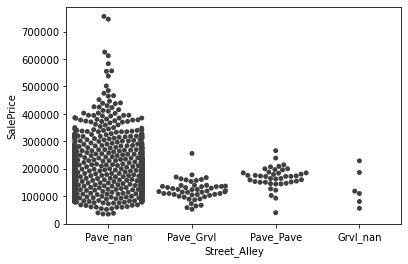

### sale month ; tips['weekend'] = tips['day'].isin(['Sat,Sun'])

In [ ]:
g = sns.catplot(x='sex',y='total_bill',hue='smoker',col='time',data=tips,
                kind='box',height=4,aspect=.7)

# column transm

In [239]:
new_cols_cats =['Street_Alley','LotShape_LandContour','LotShape_LotConfig', 'LotShape_LandSlope','Condition1_Condition2',
                'Exterior1st_Exterior2nd','Foundation_MasVnrType','Exterior1st_Exterior2nd',
                'SaleCondition_SaleType']

new_cols_num = ['total_Max_Porch_Area','total_Porch','LotAreaPerFront','total_indoor_sqft','total_outdoor_sqft',
                'total_in_out_sqft','area_per_finishes','no_finishes','no_finishes_perc','house_story',
                'house_finish','YearBuilt_Age','Remodeled','YearRemodAdd_Age','YrBlt_YrRmd_Diff','YrSd_YrBlt',
                'YrSd_YrRmd','Bsmt_Unf_Per','Garage_per_Car_Cap','total_Ext_Ql_Cd','total_Bmt_Ql_Cd',
                'total_Garage_Ql_Cd','total_Bmt_Fn_Area','Bsmt_Fsh_Per', 'avg_Ext_Qual', 'avg_Bmt_Qual',
                'avg_Gar_Qual', 'total_All_Qualities', 'avg_All_Qualities']

drop =['Utilities','Street','Alley','area_per_finishes','RoofMatl','YearBuilt','YearRemodAdd','YrSold',
       'MiscFeature','Heating']

encode=['BldgType']

poly =[lot_space,in_out]

In [228]:
merged_fill.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities',
       ...
       'total_Ext_Ql_Cd', 'total_Bmt_Ql_Cd', 'total_Garage_Ql_Cd',
       'total_Bmt_Fn_Area', 'Bsmt_Fsh_Per', 'avg_Ext_Qual', 'avg_Bmt_Qual',
       'avg_Gar_Qual', 'total_All_Qualities', 'avg_All_Qualities'],
      dtype='object', length=119)

In [88]:
merged_fill.LotShape.unique()

array(['Reg', 'IR1', 'IR2', 'IR3'], dtype=object)

In [91]:
def Similar_Category(df,column,similar_categories,category):   
    rows_with_matches = df[column].isin(similar_categories)
    df.loc[rows_with_matches,column] = category
    return df 
similar_LotShape= [ 'IR1', 'IR2', 'IR3']
Similar_Category(merged_fill,'LotShape',similar_LotShape,'IReg')

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   nan      Reg   
1        2          20       RL         80.0     9600   Pave   nan      Reg   
2        3          60       RL         68.0    11250   Pave   nan     IReg   
3        4          70       RL         60.0     9550   Pave   nan     IReg   
4        5          60       RL         84.0    14260   Pave   nan     IReg   
...    ...         ...      ...          ...      ...    ...   ...      ...   
2914  2915         160       RM         21.0     1936   Pave   nan      Reg   
2915  2916         160       RM         21.0     1894   Pave   nan      Reg   
2916  2917          20       RL        160.0    20000   Pave   nan      Reg   
2917  2918          85       RL         62.0    10441   Pave   nan      Reg   
2918  2919          60       RL         74.0     9627   Pave   nan      Reg   

     LandContour Utilities  ... MiscFeature MiscVal MoSold YrSold SaleType  \
0            Lvl    AllPub  ...         nan       0      2   2008       WD   
1            Lvl    AllPub  ...         nan       0      5   2007       WD   
2            Lvl    AllPub  ...         nan       0      9   2008       WD   
3            Lvl    AllPub  ...         nan       0      2   2006       WD   
4            Lvl    AllPub  ...         nan       0     12   2008       WD   
...          ...       ...  ...         ...     ...    ...    ...      ...   
2914         Lvl    AllPub  ...         nan       0      6   2006       WD   
2915         Lvl    AllPub  ...         nan       0      4   2006       WD   
2916         Lvl    AllPub  ...         nan       0      9   2006       WD   
2917         Lvl    AllPub  ...        Shed     700      7   2006       WD   
2918         Lvl    AllPub  ...         nan       0     11   2006       WD   

     SaleCondition SalePrice  total_Max_Porch_Area  total_Porch  Street_Alley  
0           Normal    208500                    61           61      Pave_nan  
1           Normal    181500                   298          298      Pave_nan  
2           Normal    223500                    42           42      Pave_nan  
3          Abnorml    140000                   307          307      Pave_nan  
4           Normal    250000                   276          276      Pave_nan  
...            ...       ...                   ...          ...           ...  
2914        Normal  test_col                     0            0      Pave_nan  
2915       Abnorml  test_col                    24           24      Pave_nan  
2916       Abnorml  test_col                   474          474      Pave_nan  
2917        Normal  test_col                   112          112      Pave_nan  
2918        Normal  test_col                   238          238      Pave_nan  

[2919 rows x 84 columns]

In [94]:
Shape_Coutour = ['LotShape','LandContour']
create_combination_cat_columns(df=merged_fill, cat_cols= Shape_Coutour)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   nan      Reg   
1        2          20       RL         80.0     9600   Pave   nan      Reg   
2        3          60       RL         68.0    11250   Pave   nan     IReg   
3        4          70       RL         60.0     9550   Pave   nan     IReg   
4        5          60       RL         84.0    14260   Pave   nan     IReg   
...    ...         ...      ...          ...      ...    ...   ...      ...   
2914  2915         160       RM         21.0     1936   Pave   nan      Reg   
2915  2916         160       RM         21.0     1894   Pave   nan      Reg   
2916  2917          20       RL        160.0    20000   Pave   nan      Reg   
2917  2918          85       RL         62.0    10441   Pave   nan      Reg   
2918  2919          60       RL         74.0     9627   Pave   nan      Reg   

     LandContour Utilities  ... MiscVal MoSold YrSold SaleType SaleCondition  \
0            Lvl    AllPub  ...       0      2   2008       WD        Normal   
1            Lvl    AllPub  ...       0      5   2007       WD        Normal   
2            Lvl    AllPub  ...       0      9   2008       WD        Normal   
3            Lvl    AllPub  ...       0      2   2006       WD       Abnorml   
4            Lvl    AllPub  ...       0     12   2008       WD        Normal   
...          ...       ...  ...     ...    ...    ...      ...           ...   
2914         Lvl    AllPub  ...       0      6   2006       WD        Normal   
2915         Lvl    AllPub  ...       0      4   2006       WD       Abnorml   
2916         Lvl    AllPub  ...       0      9   2006       WD       Abnorml   
2917         Lvl    AllPub  ...     700      7   2006       WD        Normal   
2918         Lvl    AllPub  ...       0     11   2006       WD        Normal   

     SalePrice total_Max_Porch_Area  total_Porch  Street_Alley  \
0       208500                   61           61      Pave_nan   
1       181500                  298          298      Pave_nan   
2       223500                   42           42      Pave_nan   
3       140000                  307          307      Pave_nan   
4       250000                  276          276      Pave_nan   
...        ...                  ...          ...           ...   
2914  test_col                    0            0      Pave_nan   
2915  test_col                   24           24      Pave_nan   
2916  test_col                  474          474      Pave_nan   
2917  test_col                  112          112      Pave_nan   
2918  test_col                  238          238      Pave_nan   

      LotShape_LandContour  
0                  Reg_Lvl  
1                  Reg_Lvl  
2                 IReg_Lvl  
3                 IReg_Lvl  
4                 IReg_Lvl  
...                    ...  
2914               Reg_Lvl  
2915               Reg_Lvl  
2916               Reg_Lvl  
2917               Reg_Lvl  
2918               Reg_Lvl  

[2919 rows x 85 columns]

In [96]:
cats

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'Foundation', 'Heating', 'FireplaceQu',
       'GarageType', 'MiscFeature', 'SaleType', 'SaleCondition', 'SalePrice'],
      dtype='object')

In [97]:
Shape_Config = ['LotShape','LotConfig']
create_combination_cat_columns(df=merged_fill, cat_cols= Shape_Config)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   nan      Reg   
1        2          20       RL         80.0     9600   Pave   nan      Reg   
2        3          60       RL         68.0    11250   Pave   nan     IReg   
3        4          70       RL         60.0     9550   Pave   nan     IReg   
4        5          60       RL         84.0    14260   Pave   nan     IReg   
...    ...         ...      ...          ...      ...    ...   ...      ...   
2914  2915         160       RM         21.0     1936   Pave   nan      Reg   
2915  2916         160       RM         21.0     1894   Pave   nan      Reg   
2916  2917          20       RL        160.0    20000   Pave   nan      Reg   
2917  2918          85       RL         62.0    10441   Pave   nan      Reg   
2918  2919          60       RL         74.0     9627   Pave   nan      Reg   

     LandContour Utilities  ... MoSold YrSold SaleType SaleCondition  \
0            Lvl    AllPub  ...      2   2008       WD        Normal   
1            Lvl    AllPub  ...      5   2007       WD        Normal   
2            Lvl    AllPub  ...      9   2008       WD        Normal   
3            Lvl    AllPub  ...      2   2006       WD       Abnorml   
4            Lvl    AllPub  ...     12   2008       WD        Normal   
...          ...       ...  ...    ...    ...      ...           ...   
2914         Lvl    AllPub  ...      6   2006       WD        Normal   
2915         Lvl    AllPub  ...      4   2006       WD       Abnorml   
2916         Lvl    AllPub  ...      9   2006       WD       Abnorml   
2917         Lvl    AllPub  ...      7   2006       WD        Normal   
2918         Lvl    AllPub  ...     11   2006       WD        Normal   

     SalePrice total_Max_Porch_Area total_Porch  Street_Alley  \
0       208500                   61          61      Pave_nan   
1       181500                  298         298      Pave_nan   
2       223500                   42          42      Pave_nan   
3       140000                  307         307      Pave_nan   
4       250000                  276         276      Pave_nan   
...        ...                  ...         ...           ...   
2914  test_col                    0           0      Pave_nan   
2915  test_col                   24          24      Pave_nan   
2916  test_col                  474         474      Pave_nan   
2917  test_col                  112         112      Pave_nan   
2918  test_col                  238         238      Pave_nan   

      LotShape_LandContour  LotShape_LotConfig  
0                  Reg_Lvl          Reg_Inside  
1                  Reg_Lvl             Reg_FR2  
2                 IReg_Lvl         IReg_Inside  
3                 IReg_Lvl         IReg_Corner  
4                 IReg_Lvl            IReg_FR2  
...                    ...                 ...  
2914               Reg_Lvl          Reg_Inside  
2915               Reg_Lvl          Reg_Inside  
2916               Reg_Lvl          Reg_Inside  
2917               Reg_Lvl          Reg_Inside  
2918               Reg_Lvl          Reg_Inside  

[2919 rows x 86 columns]

In [99]:
LotShape_LandSlope = ['LotShape','LandSlope']
create_combination_cat_columns(df=merged_fill, cat_cols= LotShape_LandSlope)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   nan      Reg   
1        2          20       RL         80.0     9600   Pave   nan      Reg   
2        3          60       RL         68.0    11250   Pave   nan     IReg   
3        4          70       RL         60.0     9550   Pave   nan     IReg   
4        5          60       RL         84.0    14260   Pave   nan     IReg   
...    ...         ...      ...          ...      ...    ...   ...      ...   
2914  2915         160       RM         21.0     1936   Pave   nan      Reg   
2915  2916         160       RM         21.0     1894   Pave   nan      Reg   
2916  2917          20       RL        160.0    20000   Pave   nan      Reg   
2917  2918          85       RL         62.0    10441   Pave   nan      Reg   
2918  2919          60       RL         74.0     9627   Pave   nan      Reg   

     LandContour Utilities  ... YrSold SaleType SaleCondition SalePrice  \
0            Lvl    AllPub  ...   2008       WD        Normal    208500   
1            Lvl    AllPub  ...   2007       WD        Normal    181500   
2            Lvl    AllPub  ...   2008       WD        Normal    223500   
3            Lvl    AllPub  ...   2006       WD       Abnorml    140000   
4            Lvl    AllPub  ...   2008       WD        Normal    250000   
...          ...       ...  ...    ...      ...           ...       ...   
2914         Lvl    AllPub  ...   2006       WD        Normal  test_col   
2915         Lvl    AllPub  ...   2006       WD       Abnorml  test_col   
2916         Lvl    AllPub  ...   2006       WD       Abnorml  test_col   
2917         Lvl    AllPub  ...   2006       WD        Normal  test_col   
2918         Lvl    AllPub  ...   2006       WD        Normal  test_col   

     total_Max_Porch_Area total_Porch Street_Alley  LotShape_LandContour  \
0                      61          61     Pave_nan               Reg_Lvl   
1                     298         298     Pave_nan               Reg_Lvl   
2                      42          42     Pave_nan              IReg_Lvl   
3                     307         307     Pave_nan              IReg_Lvl   
4                     276         276     Pave_nan              IReg_Lvl   
...                   ...         ...          ...                   ...   
2914                    0           0     Pave_nan               Reg_Lvl   
2915                   24          24     Pave_nan               Reg_Lvl   
2916                  474         474     Pave_nan               Reg_Lvl   
2917                  112         112     Pave_nan               Reg_Lvl   
2918                  238         238     Pave_nan               Reg_Lvl   

      LotShape_LotConfig  LotShape_LandSlope  
0             Reg_Inside             Reg_Gtl  
1                Reg_FR2             Reg_Gtl  
2            IReg_Inside            IReg_Gtl  
3            IReg_Corner            IReg_Gtl  
4               IReg_FR2            IReg_Gtl  
...                  ...                 ...  
2914          Reg_Inside             Reg_Gtl  
2915          Reg_Inside             Reg_Gtl  
2916          Reg_Inside             Reg_Gtl  
2917          Reg_Inside             Reg_Gtl  
2918          Reg_Inside             Reg_Mod  

[2919 rows x 87 columns]

In [100]:
merged_fill.LotShape_LandSlope.value_counts()

Reg_Gtl     1796
IReg_Gtl     982
IReg_Mod      65
Reg_Mod       60
IReg_Sev      13
Reg_Sev        3
Name: LotShape_LandSlope, dtype: int64

In [108]:
#lot_space= ['LotFrontage','LotArea']
merged_fill[['LotFrontage','LotArea','LotAreaPerFront']].head(3)

LotFrontage  LotArea  LotAreaPerFront
0         65.0     8450       130.000000
1         80.0     9600       120.000000
2         68.0    11250       165.441176

In [109]:
11250/68

165.44117647058823

In [104]:
merged_fill.loc[:,'LotAreaPerFront'] = merged_fill.LotArea/merged_fill.LotFrontage

In [113]:
indoor = ['TotalBsmtSF','1stFlrSF','2ndFlrSF','GrLivArea']
outdoor= ['LotArea','GarageArea']
finishes  = 'LowQualFinSF'
in_out=['TotalBsmtSF','1stFlrSF','2ndFlrSF','GrLivArea','LotArea','GarageArea']

In [114]:
def adding_similar_features(data,new_col,features):
    data['total_'+new_col] = data[features].sum(axis=1)
    return data
#mf_porch =adding_similar_features(data=mf,new_col='Porch',features=Porch_Area)
adding_similar_features(merged_fill,'indoor_sqft',indoor)
adding_similar_features(merged_fill,'outdoor_sqft',outdoor)
adding_similar_features(merged_fill,'in_out_sqft',in_out)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   nan      Reg   
1        2          20       RL         80.0     9600   Pave   nan      Reg   
2        3          60       RL         68.0    11250   Pave   nan     IReg   
3        4          70       RL         60.0     9550   Pave   nan     IReg   
4        5          60       RL         84.0    14260   Pave   nan     IReg   
...    ...         ...      ...          ...      ...    ...   ...      ...   
2914  2915         160       RM         21.0     1936   Pave   nan      Reg   
2915  2916         160       RM         21.0     1894   Pave   nan      Reg   
2916  2917          20       RL        160.0    20000   Pave   nan      Reg   
2917  2918          85       RL         62.0    10441   Pave   nan      Reg   
2918  2919          60       RL         74.0     9627   Pave   nan      Reg   

     LandContour Utilities  ... total_Max_Porch_Area total_Porch Street_Alley  \
0            Lvl    AllPub  ...                   61          61     Pave_nan   
1            Lvl    AllPub  ...                  298         298     Pave_nan   
2            Lvl    AllPub  ...                   42          42     Pave_nan   
3            Lvl    AllPub  ...                  307         307     Pave_nan   
4            Lvl    AllPub  ...                  276         276     Pave_nan   
...          ...       ...  ...                  ...         ...          ...   
2914         Lvl    AllPub  ...                    0           0     Pave_nan   
2915         Lvl    AllPub  ...                   24          24     Pave_nan   
2916         Lvl    AllPub  ...                  474         474     Pave_nan   
2917         Lvl    AllPub  ...                  112         112     Pave_nan   
2918         Lvl    AllPub  ...                  238         238     Pave_nan   

     LotShape_LandContour LotShape_LotConfig LotShape_LandSlope  \
0                 Reg_Lvl         Reg_Inside            Reg_Gtl   
1                 Reg_Lvl            Reg_FR2            Reg_Gtl   
2                IReg_Lvl        IReg_Inside           IReg_Gtl   
3                IReg_Lvl        IReg_Corner           IReg_Gtl   
4                IReg_Lvl           IReg_FR2           IReg_Gtl   
...                   ...                ...                ...   
2914              Reg_Lvl         Reg_Inside            Reg_Gtl   
2915              Reg_Lvl         Reg_Inside            Reg_Gtl   
2916              Reg_Lvl         Reg_Inside            Reg_Gtl   
2917              Reg_Lvl         Reg_Inside            Reg_Gtl   
2918              Reg_Lvl         Reg_Inside            Reg_Mod   

     LotAreaPerFront  total_indoor_sqft  total_outdoor_sqft  total_in_out_sqft  
0         130.000000             4276.0              8998.0            13274.0  
1         120.000000             3786.0             10060.0            13846.0  
2         165.441176             4492.0             11858.0            16350.0  
3         159.166667             4190.0             10192.0            14382.0  
4         169.761905             5541.0             15096.0            20637.0  
...              ...                ...                 ...                ...  
2914       92.190476             2730.0              1936.0             4666.0  
2915       90.190476             2730.0              2180.0             4910.0  
2916      125.000000             3672.0             20576.0            24248.0  
2917      168.403226             2852.0             10441.0            13293.0  
2918      130.094595             4996.0             10277.0            15273.0  

[2919 rows x 91 columns]

In [115]:
merged_fill.loc[:,'in_per_out'] = merged_fill.total_indoor_sqft/merged_fill.total_outdoor_sqft
merged_fill.loc[:,'area_per_finishes'] = merged_fill.total_in_out_sqft/merged_fill.LowQualFinSF
merged_fill.loc[:,'no_finishes'] = merged_fill.total_in_out_sqft-merged_fill.LowQualFinSF
#merged_fill

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   nan      Reg   
1        2          20       RL         80.0     9600   Pave   nan      Reg   
2        3          60       RL         68.0    11250   Pave   nan     IReg   
3        4          70       RL         60.0     9550   Pave   nan     IReg   
4        5          60       RL         84.0    14260   Pave   nan     IReg   
...    ...         ...      ...          ...      ...    ...   ...      ...   
2914  2915         160       RM         21.0     1936   Pave   nan      Reg   
2915  2916         160       RM         21.0     1894   Pave   nan      Reg   
2916  2917          20       RL        160.0    20000   Pave   nan      Reg   
2917  2918          85       RL         62.0    10441   Pave   nan      Reg   
2918  2919          60       RL         74.0     9627   Pave   nan      Reg   

     LandContour Utilities  ... LotShape_LandContour LotShape_LotConfig  \
0            Lvl    AllPub  ...              Reg_Lvl         Reg_Inside   
1            Lvl    AllPub  ...              Reg_Lvl            Reg_FR2   
2            Lvl    AllPub  ...             IReg_Lvl        IReg_Inside   
3            Lvl    AllPub  ...             IReg_Lvl        IReg_Corner   
4            Lvl    AllPub  ...             IReg_Lvl           IReg_FR2   
...          ...       ...  ...                  ...                ...   
2914         Lvl    AllPub  ...              Reg_Lvl         Reg_Inside   
2915         Lvl    AllPub  ...              Reg_Lvl         Reg_Inside   
2916         Lvl    AllPub  ...              Reg_Lvl         Reg_Inside   
2917         Lvl    AllPub  ...              Reg_Lvl         Reg_Inside   
2918         Lvl    AllPub  ...              Reg_Lvl         Reg_Inside   

     LotShape_LandSlope LotAreaPerFront total_indoor_sqft total_outdoor_sqft  \
0               Reg_Gtl      130.000000            4276.0             8998.0   
1               Reg_Gtl      120.000000            3786.0            10060.0   
2              IReg_Gtl      165.441176            4492.0            11858.0   
3              IReg_Gtl      159.166667            4190.0            10192.0   
4              IReg_Gtl      169.761905            5541.0            15096.0   
...                 ...             ...               ...                ...   
2914            Reg_Gtl       92.190476            2730.0             1936.0   
2915            Reg_Gtl       90.190476            2730.0             2180.0   
2916            Reg_Gtl      125.000000            3672.0            20576.0   
2917            Reg_Gtl      168.403226            2852.0            10441.0   
2918            Reg_Mod      130.094595            4996.0            10277.0   

     total_in_out_sqft  in_per_out  area_per_finishes  no_finishes  
0              13274.0    0.475217                inf      13274.0  
1              13846.0    0.376342                inf      13846.0  
2              16350.0    0.378816                inf      16350.0  
3              14382.0    0.411107                inf      14382.0  
4              20637.0    0.367051                inf      20637.0  
...                ...         ...                ...          ...  
2914            4666.0    1.410124                inf       4666.0  
2915            4910.0    1.252294                inf       4910.0  
2916           24248.0    0.178460                inf      24248.0  
2917           13293.0    0.273154                inf      13293.0  
2918           15273.0    0.486134                inf      15273.0  

[2919 rows x 94 columns]

In [120]:
merged_fill[['total_in_out_sqft','LowQualFinSF','area_per_finishes','no_finishes','no_finishes_perc']].tail()

total_in_out_sqft  LowQualFinSF  area_per_finishes  no_finishes  \
2914             4666.0             0                inf       4666.0   
2915             4910.0             0                inf       4910.0   
2916            24248.0             0                inf      24248.0   
2917            13293.0             0                inf      13293.0   
2918            15273.0             0                inf      15273.0   

      no_finishes_perc  
2914               1.0  
2915               1.0  
2916               1.0  
2917               1.0  
2918               1.0

In [118]:
merged_fill.loc[:,'no_finishes_perc'] = (merged_fill.total_in_out_sqft-merged_fill.LowQualFinSF)/merged_fill.total_in_out_sqft

In [121]:
Conditions = ['Condition1','Condition2']
create_combination_cat_columns(df=merged_fill, cat_cols= Conditions)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   nan      Reg   
1        2          20       RL         80.0     9600   Pave   nan      Reg   
2        3          60       RL         68.0    11250   Pave   nan     IReg   
3        4          70       RL         60.0     9550   Pave   nan     IReg   
4        5          60       RL         84.0    14260   Pave   nan     IReg   
...    ...         ...      ...          ...      ...    ...   ...      ...   
2914  2915         160       RM         21.0     1936   Pave   nan      Reg   
2915  2916         160       RM         21.0     1894   Pave   nan      Reg   
2916  2917          20       RL        160.0    20000   Pave   nan      Reg   
2917  2918          85       RL         62.0    10441   Pave   nan      Reg   
2918  2919          60       RL         74.0     9627   Pave   nan      Reg   

     LandContour Utilities  ... LotShape_LandSlope LotAreaPerFront  \
0            Lvl    AllPub  ...            Reg_Gtl      130.000000   
1            Lvl    AllPub  ...            Reg_Gtl      120.000000   
2            Lvl    AllPub  ...           IReg_Gtl      165.441176   
3            Lvl    AllPub  ...           IReg_Gtl      159.166667   
4            Lvl    AllPub  ...           IReg_Gtl      169.761905   
...          ...       ...  ...                ...             ...   
2914         Lvl    AllPub  ...            Reg_Gtl       92.190476   
2915         Lvl    AllPub  ...            Reg_Gtl       90.190476   
2916         Lvl    AllPub  ...            Reg_Gtl      125.000000   
2917         Lvl    AllPub  ...            Reg_Gtl      168.403226   
2918         Lvl    AllPub  ...            Reg_Mod      130.094595   

     total_indoor_sqft total_outdoor_sqft total_in_out_sqft in_per_out  \
0               4276.0             8998.0           13274.0   0.475217   
1               3786.0            10060.0           13846.0   0.376342   
2               4492.0            11858.0           16350.0   0.378816   
3               4190.0            10192.0           14382.0   0.411107   
4               5541.0            15096.0           20637.0   0.367051   
...                ...                ...               ...        ...   
2914            2730.0             1936.0            4666.0   1.410124   
2915            2730.0             2180.0            4910.0   1.252294   
2916            3672.0            20576.0           24248.0   0.178460   
2917            2852.0            10441.0           13293.0   0.273154   
2918            4996.0            10277.0           15273.0   0.486134   

     area_per_finishes  no_finishes  no_finishes_perc  Condition1_Condition2  
0                  inf      13274.0               1.0              Norm_Norm  
1                  inf      13846.0               1.0             Feedr_Norm  
2                  inf      16350.0               1.0              Norm_Norm  
3                  inf      14382.0               1.0              Norm_Norm  
4                  inf      20637.0               1.0              Norm_Norm  
...                ...          ...               ...                    ...  
2914               inf       4666.0               1.0              Norm_Norm  
2915               inf       4910.0               1.0              Norm_Norm  
2916               inf      24248.0               1.0              Norm_Norm  
2917               inf      13293.0               1.0              Norm_Norm  
2918               inf      15273.0               1.0              Norm_Norm  

[2919 rows x 96 columns]

In [124]:
merged_fill.BldgType.value_counts()

1Fam      2425
TwnhsE     227
Duplex     109
Twnhs       96
2fmCon      62
Name: BldgType, dtype: int64

In [125]:
merged_fill.HouseStyle.value_counts()

1Story    1471
2Story     872
1.5Fin     314
SLvl       128
SFoyer      83
2.5Unf      24
1.5Unf      19
2.5Fin       8
Name: HouseStyle, dtype: int64

In [126]:
merged_fill.HouseStyle.unique()

array(['2Story', '1Story', '1.5Fin', '1.5Unf', 'SFoyer', 'SLvl', '2.5Unf',
       '2.5Fin'], dtype=object)

In [127]:
rank_story=[2,1,1.5,1.5,1.2,1.3,2.5,2.5]
rank_finish=[1,1,1,0,1,1,0,1]

def Ordinal_Encoding_Rank(train,column,rank,column_name):
    column_dict ={}
    for i,j in zip(train[column].unique(),rank):
        column_dict[i]=j
    train.loc[:,column_name] =  train[column].map(column_dict)
    return train

Ordinal_Encoding_Rank(merged_fill,'HouseStyle',rank_story,'house_story')
Ordinal_Encoding_Rank(merged_fill,'HouseStyle',rank_finish,'house_finish')

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   nan      Reg   
1        2          20       RL         80.0     9600   Pave   nan      Reg   
2        3          60       RL         68.0    11250   Pave   nan     IReg   
3        4          70       RL         60.0     9550   Pave   nan     IReg   
4        5          60       RL         84.0    14260   Pave   nan     IReg   
...    ...         ...      ...          ...      ...    ...   ...      ...   
2914  2915         160       RM         21.0     1936   Pave   nan      Reg   
2915  2916         160       RM         21.0     1894   Pave   nan      Reg   
2916  2917          20       RL        160.0    20000   Pave   nan      Reg   
2917  2918          85       RL         62.0    10441   Pave   nan      Reg   
2918  2919          60       RL         74.0     9627   Pave   nan      Reg   

     LandContour Utilities  ... total_indoor_sqft total_outdoor_sqft  \
0            Lvl    AllPub  ...            4276.0             8998.0   
1            Lvl    AllPub  ...            3786.0            10060.0   
2            Lvl    AllPub  ...            4492.0            11858.0   
3            Lvl    AllPub  ...            4190.0            10192.0   
4            Lvl    AllPub  ...            5541.0            15096.0   
...          ...       ...  ...               ...                ...   
2914         Lvl    AllPub  ...            2730.0             1936.0   
2915         Lvl    AllPub  ...            2730.0             2180.0   
2916         Lvl    AllPub  ...            3672.0            20576.0   
2917         Lvl    AllPub  ...            2852.0            10441.0   
2918         Lvl    AllPub  ...            4996.0            10277.0   

     total_in_out_sqft in_per_out area_per_finishes no_finishes  \
0              13274.0   0.475217               inf     13274.0   
1              13846.0   0.376342               inf     13846.0   
2              16350.0   0.378816               inf     16350.0   
3              14382.0   0.411107               inf     14382.0   
4              20637.0   0.367051               inf     20637.0   
...                ...        ...               ...         ...   
2914            4666.0   1.410124               inf      4666.0   
2915            4910.0   1.252294               inf      4910.0   
2916           24248.0   0.178460               inf     24248.0   
2917           13293.0   0.273154               inf     13293.0   
2918           15273.0   0.486134               inf     15273.0   

     no_finishes_perc  Condition1_Condition2  house_story  house_finish  
0                 1.0              Norm_Norm          2.0             1  
1                 1.0             Feedr_Norm          1.0             1  
2                 1.0              Norm_Norm          2.0             1  
3                 1.0              Norm_Norm          2.0             1  
4                 1.0              Norm_Norm          2.0             1  
...               ...                    ...          ...           ...  
2914              1.0              Norm_Norm          2.0             1  
2915              1.0              Norm_Norm          2.0             1  
2916              1.0              Norm_Norm          1.0             1  
2917              1.0              Norm_Norm          1.2             1  
2918              1.0              Norm_Norm          2.0             1  

[2919 rows x 98 columns]

In [129]:
merged_fill.YearBuilt.max()

2010

In [130]:
merged_fill.loc[:,'YearBuilt_Age'] = 2011 -merged_fill.YearBuilt

# check the age column

In [138]:
#max=139
merged_fill.YearBuilt_Age.quantile(0.75)

57.5

In [143]:
No_remodel_idx= merged_fill[['SalePrice','YearBuilt','YearRemodAdd']][merged_fill.YearBuilt==merged_fill.YearRemodAdd].index.to_list()
No_remodel_idx

[0,
 1,
 4,
 7,
 10,
 12,
 14,
 16,
 17,
 18,
 22,
 23,
 25,
 32,
 33,
 34,
 39,
 40,
 41,
 42,
 44,
 45,
 46,
 47,
 49,
 50,
 52,
 54,
 55,
 57,
 58,
 59,
 60,
 62,
 67,
 69,
 70,
 72,
 75,
 76,
 78,
 80,
 81,
 82,
 83,
 86,
 87,
 90,
 91,
 94,
 95,
 96,
 97,
 99,
 101,
 102,
 103,
 109,
 111,
 112,
 113,
 115,
 116,
 118,
 120,
 122,
 123,
 126,
 128,
 130,
 131,
 135,
 136,
 139,
 140,
 141,
 142,
 143,
 144,
 147,
 150,
 152,
 156,
 160,
 162,
 163,
 167,
 168,
 169,
 171,
 172,
 173,
 174,
 177,
 180,
 183,
 188,
 192,
 193,
 194,
 195,
 196,
 201,
 203,
 205,
 206,
 207,
 209,
 211,
 212,
 213,
 214,
 216,
 220,
 221,
 222,
 223,
 224,
 225,
 226,
 227,
 228,
 230,
 232,
 233,
 234,
 235,
 236,
 238,
 240,
 243,
 245,
 247,
 248,
 252,
 254,
 255,
 256,
 257,
 258,
 259,
 260,
 261,
 265,
 266,
 269,
 270,
 274,
 276,
 277,
 279,
 280,
 281,
 284,
 287,
 288,
 290,
 294,
 295,
 296,
 298,
 300,
 303,
 313,
 316,
 317,
 318,
 319,
 320,
 321,
 326,
 327,
 330,
 333,
 334,
 335,
 3

In [145]:
merged_fill.loc[No_remodel_idx,'Remodeled'] = 0 

In [147]:
merged_fill.Remodeled.fillna(1,inplace=True)

In [150]:
merged_fill.YearRemodAdd.max()

2010

In [151]:
merged_fill.loc[:,'YearRemodAdd_Age'] = 2011 -merged_fill.YearRemodAdd

In [153]:
merged_fill.loc[:,'YrBlt_YrRmd_Diff'] =  merged_fill.YearRemodAdd  - merged_fill.YearBuilt

merged_fill.loc[:,'YrSd_YrBlt'] =  merged_fill.YrSold  - merged_fill.YearBuilt

merged_fill.loc[:,'YrSd_YrRmd'] =  merged_fill.YrSold  - merged_fill.YearRemodAdd

In [155]:
merged_fill.RoofStyle.value_counts()

Gable      2310
Hip         551
Gambrel      22
Flat         20
Mansard      11
Shed          5
Name: RoofStyle, dtype: int64

In [195]:
merged_fill.RoofMatl.value_counts()

CompShg    2876
Tar&Grv      23
WdShake       9
WdShngl       7
Roll          1
Metal         1
ClyTile       1
Membran       1
Name: RoofMatl, dtype: int64

In [196]:
merged_fill.RoofMatl.unique()

array(['CompShg', 'WdShngl', 'Metal', 'WdShake', 'Membran', 'Tar&Grv',
       'Roll', 'ClyTile'], dtype=object)

In [156]:
similar_roof= [ 'Gambrel', 'Flat', 'Mansard','Shed']
Similar_Category(merged_fill,'RoofStyle',similar_roof,'Rare_roof')

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   nan      Reg   
1        2          20       RL         80.0     9600   Pave   nan      Reg   
2        3          60       RL         68.0    11250   Pave   nan     IReg   
3        4          70       RL         60.0     9550   Pave   nan     IReg   
4        5          60       RL         84.0    14260   Pave   nan     IReg   
...    ...         ...      ...          ...      ...    ...   ...      ...   
2914  2915         160       RM         21.0     1936   Pave   nan      Reg   
2915  2916         160       RM         21.0     1894   Pave   nan      Reg   
2916  2917          20       RL        160.0    20000   Pave   nan      Reg   
2917  2918          85       RL         62.0    10441   Pave   nan      Reg   
2918  2919          60       RL         74.0     9627   Pave   nan      Reg   

     LandContour Utilities  ... no_finishes_perc Condition1_Condition2  \
0            Lvl    AllPub  ...              1.0             Norm_Norm   
1            Lvl    AllPub  ...              1.0            Feedr_Norm   
2            Lvl    AllPub  ...              1.0             Norm_Norm   
3            Lvl    AllPub  ...              1.0             Norm_Norm   
4            Lvl    AllPub  ...              1.0             Norm_Norm   
...          ...       ...  ...              ...                   ...   
2914         Lvl    AllPub  ...              1.0             Norm_Norm   
2915         Lvl    AllPub  ...              1.0             Norm_Norm   
2916         Lvl    AllPub  ...              1.0             Norm_Norm   
2917         Lvl    AllPub  ...              1.0             Norm_Norm   
2918         Lvl    AllPub  ...              1.0             Norm_Norm   

     house_story house_finish YearBuilt_Age Remodeled YearRemodAdd_Age  \
0            2.0            1             8       0.0                8   
1            1.0            1            35       0.0               35   
2            2.0            1            10       1.0                9   
3            2.0            1            96       1.0               41   
4            2.0            1            11       0.0               11   
...          ...          ...           ...       ...              ...   
2914         2.0            1            41       0.0               41   
2915         2.0            1            41       0.0               41   
2916         1.0            1            51       1.0               15   
2917         1.2            1            19       0.0               19   
2918         2.0            1            18       1.0               17   

      YrBlt_YrRmd_Diff  YrSd_YrBlt  YrSd_YrRmd  
0                    0           5           5  
1                    0          31          31  
2                    1           7           6  
3                   55          91          36  
4                    0           8           8  
...                ...         ...         ...  
2914                 0          36          36  
2915                 0          36          36  
2916                36          46          10  
2917                 0          14          14  
2918                 1          13          12  

[2919 rows x 104 columns]

In [193]:
merged_fill.MasVnrType.value_counts()

None       1742
BrkFace     879
Stone       249
BrkCmn       25
nan          24
Name: MasVnrType, dtype: int64

In [201]:
merged_fill.Foundation_MasVnrType.value_counts()

CBlock_None       773
PConc_None        614
PConc_BrkFace     472
CBlock_BrkFace    391
RARE_None         355
PConc_RARE        222
CBlock_RARE        71
RARE_BrkFace       16
RARE_RARE           5
Name: Foundation_MasVnrType, dtype: int64

In [184]:
def Handling_Rare_Values(df,column,threshold):     
     df[column] = df[column].fillna("NONE")
     condition_index = df[column].value_counts()[df[column]].values < threshold
     df.loc[condition_index, column] = "RARE"
     print(df[column].value_counts())
     return df
    
Handling_Rare_Values(df=merged_fill,column='Exterior2nd',threshold=88)

VinylSd    1025
MetalSd     450
HdBoard     442
Wd Sdng     411
RARE        244
Plywood     221
CemntBd     126
Name: Exterior1st, dtype: int64


Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   nan      Reg   
1        2          20       RL         80.0     9600   Pave   nan      Reg   
2        3          60       RL         68.0    11250   Pave   nan     IReg   
3        4          70       RL         60.0     9550   Pave   nan     IReg   
4        5          60       RL         84.0    14260   Pave   nan     IReg   
...    ...         ...      ...          ...      ...    ...   ...      ...   
2914  2915         160       RM         21.0     1936   Pave   nan      Reg   
2915  2916         160       RM         21.0     1894   Pave   nan      Reg   
2916  2917          20       RL        160.0    20000   Pave   nan      Reg   
2917  2918          85       RL         62.0    10441   Pave   nan      Reg   
2918  2919          60       RL         74.0     9627   Pave   nan      Reg   

     LandContour Utilities  ... no_finishes_perc Condition1_Condition2  \
0            Lvl    AllPub  ...              1.0             Norm_Norm   
1            Lvl    AllPub  ...              1.0            Feedr_Norm   
2            Lvl    AllPub  ...              1.0             Norm_Norm   
3            Lvl    AllPub  ...              1.0             Norm_Norm   
4            Lvl    AllPub  ...              1.0             Norm_Norm   
...          ...       ...  ...              ...                   ...   
2914         Lvl    AllPub  ...              1.0             Norm_Norm   
2915         Lvl    AllPub  ...              1.0             Norm_Norm   
2916         Lvl    AllPub  ...              1.0             Norm_Norm   
2917         Lvl    AllPub  ...              1.0             Norm_Norm   
2918         Lvl    AllPub  ...              1.0             Norm_Norm   

     house_story house_finish YearBuilt_Age Remodeled YearRemodAdd_Age  \
0            2.0            1             8       0.0                8   
1            1.0            1            35       0.0               35   
2            2.0            1            10       1.0                9   
3            2.0            1            96       1.0               41   
4            2.0            1            11       0.0               11   
...          ...          ...           ...       ...              ...   
2914         2.0            1            41       0.0               41   
2915         2.0            1            41       0.0               41   
2916         1.0            1            51       1.0               15   
2917         1.2            1            19       0.0               19   
2918         2.0            1            18       1.0               17   

      YrBlt_YrRmd_Diff  YrSd_YrBlt  YrSd_YrRmd  
0                    0           5           5  
1                    0          31          31  
2                    1           7           6  
3                   55          91          36  
4                    0           8           8  
...                ...         ...         ...  
2914                 0          36          36  
2915                 0          36          36  
2916                36          46          10  
2917                 0          14          14  
2918                 1          13          12  

[2919 rows x 104 columns]

In [187]:
Handling_Rare_Values(df=merged_fill,column='Exterior2nd',threshold=88)

VinylSd    1014
MetalSd     447
HdBoard     406
Wd Sdng     391
Plywood     270
RARE        265
CmentBd     126
Name: Exterior2nd, dtype: int64


Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   nan      Reg   
1        2          20       RL         80.0     9600   Pave   nan      Reg   
2        3          60       RL         68.0    11250   Pave   nan     IReg   
3        4          70       RL         60.0     9550   Pave   nan     IReg   
4        5          60       RL         84.0    14260   Pave   nan     IReg   
...    ...         ...      ...          ...      ...    ...   ...      ...   
2914  2915         160       RM         21.0     1936   Pave   nan      Reg   
2915  2916         160       RM         21.0     1894   Pave   nan      Reg   
2916  2917          20       RL        160.0    20000   Pave   nan      Reg   
2917  2918          85       RL         62.0    10441   Pave   nan      Reg   
2918  2919          60       RL         74.0     9627   Pave   nan      Reg   

     LandContour Utilities  ... no_finishes_perc Condition1_Condition2  \
0            Lvl    AllPub  ...              1.0             Norm_Norm   
1            Lvl    AllPub  ...              1.0            Feedr_Norm   
2            Lvl    AllPub  ...              1.0             Norm_Norm   
3            Lvl    AllPub  ...              1.0             Norm_Norm   
4            Lvl    AllPub  ...              1.0             Norm_Norm   
...          ...       ...  ...              ...                   ...   
2914         Lvl    AllPub  ...              1.0             Norm_Norm   
2915         Lvl    AllPub  ...              1.0             Norm_Norm   
2916         Lvl    AllPub  ...              1.0             Norm_Norm   
2917         Lvl    AllPub  ...              1.0             Norm_Norm   
2918         Lvl    AllPub  ...              1.0             Norm_Norm   

     house_story house_finish YearBuilt_Age Remodeled YearRemodAdd_Age  \
0            2.0            1             8       0.0                8   
1            1.0            1            35       0.0               35   
2            2.0            1            10       1.0                9   
3            2.0            1            96       1.0               41   
4            2.0            1            11       0.0               11   
...          ...          ...           ...       ...              ...   
2914         2.0            1            41       0.0               41   
2915         2.0            1            41       0.0               41   
2916         1.0            1            51       1.0               15   
2917         1.2            1            19       0.0               19   
2918         2.0            1            18       1.0               17   

      YrBlt_YrRmd_Diff  YrSd_YrBlt  YrSd_YrRmd  
0                    0           5           5  
1                    0          31          31  
2                    1           7           6  
3                   55          91          36  
4                    0           8           8  
...                ...         ...         ...  
2914                 0          36          36  
2915                 0          36          36  
2916                36          46          10  
2917                 0          14          14  
2918                 1          13          12  

[2919 rows x 104 columns]

In [190]:
Ext_1_2 =['Exterior1st','Exterior2nd']
create_combination_cat_columns(df=merged_fill, cat_cols=Ext_1_2)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   nan      Reg   
1        2          20       RL         80.0     9600   Pave   nan      Reg   
2        3          60       RL         68.0    11250   Pave   nan     IReg   
3        4          70       RL         60.0     9550   Pave   nan     IReg   
4        5          60       RL         84.0    14260   Pave   nan     IReg   
...    ...         ...      ...          ...      ...    ...   ...      ...   
2914  2915         160       RM         21.0     1936   Pave   nan      Reg   
2915  2916         160       RM         21.0     1894   Pave   nan      Reg   
2916  2917          20       RL        160.0    20000   Pave   nan      Reg   
2917  2918          85       RL         62.0    10441   Pave   nan      Reg   
2918  2919          60       RL         74.0     9627   Pave   nan      Reg   

     LandContour Utilities  ... Condition1_Condition2 house_story  \
0            Lvl    AllPub  ...             Norm_Norm         2.0   
1            Lvl    AllPub  ...            Feedr_Norm         1.0   
2            Lvl    AllPub  ...             Norm_Norm         2.0   
3            Lvl    AllPub  ...             Norm_Norm         2.0   
4            Lvl    AllPub  ...             Norm_Norm         2.0   
...          ...       ...  ...                   ...         ...   
2914         Lvl    AllPub  ...             Norm_Norm         2.0   
2915         Lvl    AllPub  ...             Norm_Norm         2.0   
2916         Lvl    AllPub  ...             Norm_Norm         1.0   
2917         Lvl    AllPub  ...             Norm_Norm         1.2   
2918         Lvl    AllPub  ...             Norm_Norm         2.0   

     house_finish YearBuilt_Age Remodeled YearRemodAdd_Age YrBlt_YrRmd_Diff  \
0               1             8       0.0                8                0   
1               1            35       0.0               35                0   
2               1            10       1.0                9                1   
3               1            96       1.0               41               55   
4               1            11       0.0               11                0   
...           ...           ...       ...              ...              ...   
2914            1            41       0.0               41                0   
2915            1            41       0.0               41                0   
2916            1            51       1.0               15               36   
2917            1            19       0.0               19                0   
2918            1            18       1.0               17                1   

      YrSd_YrBlt  YrSd_YrRmd  Exterior1st_Exterior2nd  
0              5           5          VinylSd_VinylSd  
1             31          31          MetalSd_MetalSd  
2              7           6          VinylSd_VinylSd  
3             91          36             Wd Sdng_RARE  
4              8           8          VinylSd_VinylSd  
...          ...         ...                      ...  
2914          36          36          CemntBd_CmentBd  
2915          36          36          CemntBd_CmentBd  
2916          46          10          VinylSd_VinylSd  
2917          14          14             HdBoard_RARE  
2918          13          12          HdBoard_HdBoard  

[2919 rows x 105 columns]

In [192]:
Handling_Rare_Values(df=merged_fill,column='Exterior1st_Exterior2nd',threshold=180)

VinylSd_VinylSd    1005
MetalSd_MetalSd     437
HdBoard_HdBoard     383
RARE                375
Wd Sdng_Wd Sdng     353
Plywood_Plywood     186
RARE_RARE           180
Name: Exterior1st_Exterior2nd, dtype: int64


Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   nan      Reg   
1        2          20       RL         80.0     9600   Pave   nan      Reg   
2        3          60       RL         68.0    11250   Pave   nan     IReg   
3        4          70       RL         60.0     9550   Pave   nan     IReg   
4        5          60       RL         84.0    14260   Pave   nan     IReg   
...    ...         ...      ...          ...      ...    ...   ...      ...   
2914  2915         160       RM         21.0     1936   Pave   nan      Reg   
2915  2916         160       RM         21.0     1894   Pave   nan      Reg   
2916  2917          20       RL        160.0    20000   Pave   nan      Reg   
2917  2918          85       RL         62.0    10441   Pave   nan      Reg   
2918  2919          60       RL         74.0     9627   Pave   nan      Reg   

     LandContour Utilities  ... Condition1_Condition2 house_story  \
0            Lvl    AllPub  ...             Norm_Norm         2.0   
1            Lvl    AllPub  ...            Feedr_Norm         1.0   
2            Lvl    AllPub  ...             Norm_Norm         2.0   
3            Lvl    AllPub  ...             Norm_Norm         2.0   
4            Lvl    AllPub  ...             Norm_Norm         2.0   
...          ...       ...  ...                   ...         ...   
2914         Lvl    AllPub  ...             Norm_Norm         2.0   
2915         Lvl    AllPub  ...             Norm_Norm         2.0   
2916         Lvl    AllPub  ...             Norm_Norm         1.0   
2917         Lvl    AllPub  ...             Norm_Norm         1.2   
2918         Lvl    AllPub  ...             Norm_Norm         2.0   

     house_finish YearBuilt_Age Remodeled YearRemodAdd_Age YrBlt_YrRmd_Diff  \
0               1             8       0.0                8                0   
1               1            35       0.0               35                0   
2               1            10       1.0                9                1   
3               1            96       1.0               41               55   
4               1            11       0.0               11                0   
...           ...           ...       ...              ...              ...   
2914            1            41       0.0               41                0   
2915            1            41       0.0               41                0   
2916            1            51       1.0               15               36   
2917            1            19       0.0               19                0   
2918            1            18       1.0               17                1   

      YrSd_YrBlt  YrSd_YrRmd  Exterior1st_Exterior2nd  
0              5           5          VinylSd_VinylSd  
1             31          31          MetalSd_MetalSd  
2              7           6          VinylSd_VinylSd  
3             91          36                     RARE  
4              8           8          VinylSd_VinylSd  
...          ...         ...                      ...  
2914          36          36                     RARE  
2915          36          36                     RARE  
2916          46          10          VinylSd_VinylSd  
2917          14          14                     RARE  
2918          13          12          HdBoard_HdBoard  

[2919 rows x 105 columns]

In [199]:
Handling_Rare_Values(df=merged_fill,column='MasVnrType',threshold=250)
Handling_Rare_Values(df=merged_fill,column='Foundation',threshold=320)

None       1742
BrkFace     879
RARE        298
Name: MasVnrType, dtype: int64
PConc     1308
CBlock    1235
RARE       376
Name: Foundation, dtype: int64


Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   nan      Reg   
1        2          20       RL         80.0     9600   Pave   nan      Reg   
2        3          60       RL         68.0    11250   Pave   nan     IReg   
3        4          70       RL         60.0     9550   Pave   nan     IReg   
4        5          60       RL         84.0    14260   Pave   nan     IReg   
...    ...         ...      ...          ...      ...    ...   ...      ...   
2914  2915         160       RM         21.0     1936   Pave   nan      Reg   
2915  2916         160       RM         21.0     1894   Pave   nan      Reg   
2916  2917          20       RL        160.0    20000   Pave   nan      Reg   
2917  2918          85       RL         62.0    10441   Pave   nan      Reg   
2918  2919          60       RL         74.0     9627   Pave   nan      Reg   

     LandContour Utilities  ... Condition1_Condition2 house_story  \
0            Lvl    AllPub  ...             Norm_Norm         2.0   
1            Lvl    AllPub  ...            Feedr_Norm         1.0   
2            Lvl    AllPub  ...             Norm_Norm         2.0   
3            Lvl    AllPub  ...             Norm_Norm         2.0   
4            Lvl    AllPub  ...             Norm_Norm         2.0   
...          ...       ...  ...                   ...         ...   
2914         Lvl    AllPub  ...             Norm_Norm         2.0   
2915         Lvl    AllPub  ...             Norm_Norm         2.0   
2916         Lvl    AllPub  ...             Norm_Norm         1.0   
2917         Lvl    AllPub  ...             Norm_Norm         1.2   
2918         Lvl    AllPub  ...             Norm_Norm         2.0   

     house_finish YearBuilt_Age Remodeled YearRemodAdd_Age YrBlt_YrRmd_Diff  \
0               1             8       0.0                8                0   
1               1            35       0.0               35                0   
2               1            10       1.0                9                1   
3               1            96       1.0               41               55   
4               1            11       0.0               11                0   
...           ...           ...       ...              ...              ...   
2914            1            41       0.0               41                0   
2915            1            41       0.0               41                0   
2916            1            51       1.0               15               36   
2917            1            19       0.0               19                0   
2918            1            18       1.0               17                1   

      YrSd_YrBlt  YrSd_YrRmd  Exterior1st_Exterior2nd  
0              5           5          VinylSd_VinylSd  
1             31          31          MetalSd_MetalSd  
2              7           6          VinylSd_VinylSd  
3             91          36                     RARE  
4              8           8          VinylSd_VinylSd  
...          ...         ...                      ...  
2914          36          36                     RARE  
2915          36          36                     RARE  
2916          46          10          VinylSd_VinylSd  
2917          14          14                     RARE  
2918          13          12          HdBoard_HdBoard  

[2919 rows x 105 columns]

In [200]:
Ext_Mans_Found =['Foundation','MasVnrType']
create_combination_cat_columns(df=merged_fill, cat_cols=Ext_Mans_Found)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   nan      Reg   
1        2          20       RL         80.0     9600   Pave   nan      Reg   
2        3          60       RL         68.0    11250   Pave   nan     IReg   
3        4          70       RL         60.0     9550   Pave   nan     IReg   
4        5          60       RL         84.0    14260   Pave   nan     IReg   
...    ...         ...      ...          ...      ...    ...   ...      ...   
2914  2915         160       RM         21.0     1936   Pave   nan      Reg   
2915  2916         160       RM         21.0     1894   Pave   nan      Reg   
2916  2917          20       RL        160.0    20000   Pave   nan      Reg   
2917  2918          85       RL         62.0    10441   Pave   nan      Reg   
2918  2919          60       RL         74.0     9627   Pave   nan      Reg   

     LandContour Utilities  ... house_story house_finish YearBuilt_Age  \
0            Lvl    AllPub  ...         2.0            1             8   
1            Lvl    AllPub  ...         1.0            1            35   
2            Lvl    AllPub  ...         2.0            1            10   
3            Lvl    AllPub  ...         2.0            1            96   
4            Lvl    AllPub  ...         2.0            1            11   
...          ...       ...  ...         ...          ...           ...   
2914         Lvl    AllPub  ...         2.0            1            41   
2915         Lvl    AllPub  ...         2.0            1            41   
2916         Lvl    AllPub  ...         1.0            1            51   
2917         Lvl    AllPub  ...         1.2            1            19   
2918         Lvl    AllPub  ...         2.0            1            18   

     Remodeled YearRemodAdd_Age YrBlt_YrRmd_Diff YrSd_YrBlt  YrSd_YrRmd  \
0          0.0                8                0          5           5   
1          0.0               35                0         31          31   
2          1.0                9                1          7           6   
3          1.0               41               55         91          36   
4          0.0               11                0          8           8   
...        ...              ...              ...        ...         ...   
2914       0.0               41                0         36          36   
2915       0.0               41                0         36          36   
2916       1.0               15               36         46          10   
2917       0.0               19                0         14          14   
2918       1.0               17                1         13          12   

      Exterior1st_Exterior2nd  Foundation_MasVnrType  
0             VinylSd_VinylSd          PConc_BrkFace  
1             MetalSd_MetalSd            CBlock_None  
2             VinylSd_VinylSd          PConc_BrkFace  
3                        RARE              RARE_None  
4             VinylSd_VinylSd          PConc_BrkFace  
...                       ...                    ...  
2914                     RARE            CBlock_None  
2915                     RARE            CBlock_None  
2916          VinylSd_VinylSd            CBlock_None  
2917                     RARE             PConc_None  
2918          HdBoard_HdBoard          PConc_BrkFace  

[2919 rows x 106 columns]

In [204]:
merged_fill.MasVnrArea

0       196.0
1         0.0
2       162.0
3         0.0
4       350.0
        ...  
2914      0.0
2915      0.0
2916      0.0
2917      0.0
2918     94.0
Name: MasVnrArea, Length: 2919, dtype: float64

In [205]:
#MasVnrArea
def create_bins(data,column):
    data[column+'_bin'] = pd.qcut(data[column],q=[0,.2,.4,.6,.8,1],labels=False,)
    return data
create_bins(merged_fill,'MasVnrArea')

ValueError: Bin edges must be unique: array([   0.,    0.,    0.,  202., 1600.]).
You can drop duplicate edges by setting the 'duplicates' kwarg

In [217]:
Ext_Qual_Cond = ['ExterQual','ExterCond']
Bmt_Qual_Cond = ['BsmtQual','BsmtCond','BsmtFinType2','BsmtFinType1','BsmtExposure']
Bmt_Fnsh_Area = ['BsmtFinSF1','BsmtFinSF2']
Garage_Qual_Cond = ['GarageFinish','GarageQual','GarageCond','GarageFinish']

# TotalBsmtSF ,BsmtUnfSF
merged_fill.loc[:,'Bsmt_Unf_Per'] = (merged_fill.TotalBsmtSF - merged_fill.BsmtUnfSF) / (merged_fill.TotalBsmtSF)
#Garage_per_Car_Capacity
merged_fill.loc[:,'Garage_per_Car_Cap'] = merged_fill.GarageArea/ (merged_fill.GarageCars + 1)

In [218]:
adding_similar_features(merged_fill,'Ext_Ql_Cd',Ext_Qual_Cond)
adding_similar_features(merged_fill,'Bmt_Ql_Cd',Bmt_Qual_Cond)
adding_similar_features(merged_fill,'Garage_Ql_Cd',Garage_Qual_Cond)

adding_similar_features(merged_fill,'Bmt_Fn_Area',Bmt_Fnsh_Area)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   nan      Reg   
1        2          20       RL         80.0     9600   Pave   nan      Reg   
2        3          60       RL         68.0    11250   Pave   nan     IReg   
3        4          70       RL         60.0     9550   Pave   nan     IReg   
4        5          60       RL         84.0    14260   Pave   nan     IReg   
...    ...         ...      ...          ...      ...    ...   ...      ...   
2914  2915         160       RM         21.0     1936   Pave   nan      Reg   
2915  2916         160       RM         21.0     1894   Pave   nan      Reg   
2916  2917          20       RL        160.0    20000   Pave   nan      Reg   
2917  2918          85       RL         62.0    10441   Pave   nan      Reg   
2918  2919          60       RL         74.0     9627   Pave   nan      Reg   

     LandContour Utilities  ... YrSd_YrRmd Exterior1st_Exterior2nd  \
0            Lvl    AllPub  ...          5         VinylSd_VinylSd   
1            Lvl    AllPub  ...         31         MetalSd_MetalSd   
2            Lvl    AllPub  ...          6         VinylSd_VinylSd   
3            Lvl    AllPub  ...         36                    RARE   
4            Lvl    AllPub  ...          8         VinylSd_VinylSd   
...          ...       ...  ...        ...                     ...   
2914         Lvl    AllPub  ...         36                    RARE   
2915         Lvl    AllPub  ...         36                    RARE   
2916         Lvl    AllPub  ...         10         VinylSd_VinylSd   
2917         Lvl    AllPub  ...         14                    RARE   
2918         Lvl    AllPub  ...         12         HdBoard_HdBoard   

     Foundation_MasVnrType SaleCondition_SaleType Bsmt_Unf_Per  \
0            PConc_BrkFace              Normal_WD     0.824766   
1              CBlock_None              Normal_WD     0.774960   
2            PConc_BrkFace              Normal_WD     0.528261   
3                RARE_None                RARE_WD     0.285714   
4            PConc_BrkFace              Normal_WD     0.572052   
...                    ...                    ...          ...   
2914           CBlock_None              Normal_WD     0.000000   
2915           CBlock_None                RARE_WD     0.461538   
2916           CBlock_None                RARE_WD     1.000000   
2917            PConc_None              Normal_WD     0.369518   
2918         PConc_BrkFace              Normal_WD     0.761044   

     Garage_per_Car_Cap total_Ext_Ql_Cd  total_Bmt_Ql_Cd  total_Garage_Ql_Cd  \
0            182.666667              12             25.0                  16   
1            153.333333              10             23.0                  16   
2            202.666667              12             26.0                  16   
3            160.500000              10             20.0                  14   
4            209.000000              12             27.0                  16   
...                 ...             ...              ...                 ...   
2914           0.000000              10             15.0                   0   
2915         143.000000              10             18.5                  14   
2916         192.000000              10             18.0                  14   
2917           0.000000              10             27.0                   0   
2918         162.500000              10             18.0                  20   

      total_Bmt_Fn_Area  
0                 706.0  
1                 978.0  
2                 486.0  
3                 216.0  
4                 655.0  
...                 ...  
2914                0.0  
2915              252.0  
2916             1224.0  
2917              337.0  
2918              758.0  

[2919 rows x 113 columns]

In [219]:
merged_fill.loc[:,'Bsmt_Fsh_Per'] = (merged_fill.TotalBsmtSF - merged_fill.total_Bmt_Fn_Area) / (merged_fill.TotalBsmtSF)
merged_fill.loc[:,'avg_Ext_Qual'] = merged_fill.total_Ext_Ql_Cd/2
merged_fill.loc[:,'avg_Bmt_Qual'] = merged_fill.total_Bmt_Ql_Cd/5
merged_fill.loc[:,'avg_Gar_Qual'] = merged_fill.total_Garage_Ql_Cd/4

In [221]:
All_Qualities = ['OverallQual','OverallCond','HeatingQC','Functional','Fireplaces','KitchenQual','FireplaceQu',
                'avg_Ext_Qual','avg_Bmt_Qual','avg_Gar_Qual','Electrical']
adding_similar_features(merged_fill,'All_Qualities',All_Qualities)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   nan      Reg   
1        2          20       RL         80.0     9600   Pave   nan      Reg   
2        3          60       RL         68.0    11250   Pave   nan     IReg   
3        4          70       RL         60.0     9550   Pave   nan     IReg   
4        5          60       RL         84.0    14260   Pave   nan     IReg   
...    ...         ...      ...          ...      ...    ...   ...      ...   
2914  2915         160       RM         21.0     1936   Pave   nan      Reg   
2915  2916         160       RM         21.0     1894   Pave   nan      Reg   
2916  2917          20       RL        160.0    20000   Pave   nan      Reg   
2917  2918          85       RL         62.0    10441   Pave   nan      Reg   
2918  2919          60       RL         74.0     9627   Pave   nan      Reg   

     LandContour Utilities  ... Garage_per_Car_Cap total_Ext_Ql_Cd  \
0            Lvl    AllPub  ...         182.666667              12   
1            Lvl    AllPub  ...         153.333333              10   
2            Lvl    AllPub  ...         202.666667              12   
3            Lvl    AllPub  ...         160.500000              10   
4            Lvl    AllPub  ...         209.000000              12   
...          ...       ...  ...                ...             ...   
2914         Lvl    AllPub  ...           0.000000              10   
2915         Lvl    AllPub  ...         143.000000              10   
2916         Lvl    AllPub  ...         192.000000              10   
2917         Lvl    AllPub  ...           0.000000              10   
2918         Lvl    AllPub  ...         162.500000              10   

     total_Bmt_Ql_Cd total_Garage_Ql_Cd total_Bmt_Fn_Area Bsmt_Fsh_Per  \
0               25.0                 16             706.0     0.175234   
1               23.0                 16             978.0     0.225040   
2               26.0                 16             486.0     0.471739   
3               20.0                 14             216.0     0.714286   
4               27.0                 16             655.0     0.427948   
...              ...                ...               ...          ...   
2914            15.0                  0               0.0     1.000000   
2915            18.5                 14             252.0     0.538462   
2916            18.0                 14            1224.0     0.000000   
2917            27.0                  0             337.0     0.630482   
2918            18.0                 20             758.0     0.238956   

     avg_Ext_Qual  avg_Bmt_Qual  avg_Gar_Qual  total_All_Qualities  
0             6.0           5.0           4.0                 59.0  
1             5.0           4.6           4.0                 58.6  
2             6.0           5.2           4.0                 60.2  
3             5.0           4.0           3.5                 54.5  
4             6.0           5.4           4.0                 61.4  
...           ...           ...           ...                  ...  
2914          5.0           3.0           0.0                 46.0  
2915          5.0           3.7           3.5                 46.2  
2916          5.0           3.6           3.5                 55.1  
2917          5.0           5.4           0.0                 45.4  
2918          5.0           3.6           5.0                 56.6  

[2919 rows x 118 columns]

In [222]:
len(All_Qualities)

11

In [223]:
merged_fill.loc[:,'avg_All_Qualities'] = merged_fill.total_All_Qualities/11

In [211]:
Handling_Rare_Values(df=merged_fill,column='SaleType',threshold=88)
Handling_Rare_Values(df=merged_fill,column='SaleCondition',threshold=200)

WD      2525
New      239
RARE     155
Name: SaleType, dtype: int64
Normal     2402
RARE        272
Partial     245
Name: SaleCondition, dtype: int64


Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   nan      Reg   
1        2          20       RL         80.0     9600   Pave   nan      Reg   
2        3          60       RL         68.0    11250   Pave   nan     IReg   
3        4          70       RL         60.0     9550   Pave   nan     IReg   
4        5          60       RL         84.0    14260   Pave   nan     IReg   
...    ...         ...      ...          ...      ...    ...   ...      ...   
2914  2915         160       RM         21.0     1936   Pave   nan      Reg   
2915  2916         160       RM         21.0     1894   Pave   nan      Reg   
2916  2917          20       RL        160.0    20000   Pave   nan      Reg   
2917  2918          85       RL         62.0    10441   Pave   nan      Reg   
2918  2919          60       RL         74.0     9627   Pave   nan      Reg   

     LandContour Utilities  ... house_story house_finish YearBuilt_Age  \
0            Lvl    AllPub  ...         2.0            1             8   
1            Lvl    AllPub  ...         1.0            1            35   
2            Lvl    AllPub  ...         2.0            1            10   
3            Lvl    AllPub  ...         2.0            1            96   
4            Lvl    AllPub  ...         2.0            1            11   
...          ...       ...  ...         ...          ...           ...   
2914         Lvl    AllPub  ...         2.0            1            41   
2915         Lvl    AllPub  ...         2.0            1            41   
2916         Lvl    AllPub  ...         1.0            1            51   
2917         Lvl    AllPub  ...         1.2            1            19   
2918         Lvl    AllPub  ...         2.0            1            18   

     Remodeled YearRemodAdd_Age YrBlt_YrRmd_Diff YrSd_YrBlt  YrSd_YrRmd  \
0          0.0                8                0          5           5   
1          0.0               35                0         31          31   
2          1.0                9                1          7           6   
3          1.0               41               55         91          36   
4          0.0               11                0          8           8   
...        ...              ...              ...        ...         ...   
2914       0.0               41                0         36          36   
2915       0.0               41                0         36          36   
2916       1.0               15               36         46          10   
2917       0.0               19                0         14          14   
2918       1.0               17                1         13          12   

      Exterior1st_Exterior2nd  Foundation_MasVnrType  
0             VinylSd_VinylSd          PConc_BrkFace  
1             MetalSd_MetalSd            CBlock_None  
2             VinylSd_VinylSd          PConc_BrkFace  
3                        RARE              RARE_None  
4             VinylSd_VinylSd          PConc_BrkFace  
...                       ...                    ...  
2914                     RARE            CBlock_None  
2915                     RARE            CBlock_None  
2916          VinylSd_VinylSd            CBlock_None  
2917                     RARE             PConc_None  
2918          HdBoard_HdBoard          PConc_BrkFace  

[2919 rows x 106 columns]

In [212]:
Sale_TC =['SaleCondition','SaleType']
create_combination_cat_columns(df=merged_fill, cat_cols=Sale_TC)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   nan      Reg   
1        2          20       RL         80.0     9600   Pave   nan      Reg   
2        3          60       RL         68.0    11250   Pave   nan     IReg   
3        4          70       RL         60.0     9550   Pave   nan     IReg   
4        5          60       RL         84.0    14260   Pave   nan     IReg   
...    ...         ...      ...          ...      ...    ...   ...      ...   
2914  2915         160       RM         21.0     1936   Pave   nan      Reg   
2915  2916         160       RM         21.0     1894   Pave   nan      Reg   
2916  2917          20       RL        160.0    20000   Pave   nan      Reg   
2917  2918          85       RL         62.0    10441   Pave   nan      Reg   
2918  2919          60       RL         74.0     9627   Pave   nan      Reg   

     LandContour Utilities  ... house_finish YearBuilt_Age Remodeled  \
0            Lvl    AllPub  ...            1             8       0.0   
1            Lvl    AllPub  ...            1            35       0.0   
2            Lvl    AllPub  ...            1            10       1.0   
3            Lvl    AllPub  ...            1            96       1.0   
4            Lvl    AllPub  ...            1            11       0.0   
...          ...       ...  ...          ...           ...       ...   
2914         Lvl    AllPub  ...            1            41       0.0   
2915         Lvl    AllPub  ...            1            41       0.0   
2916         Lvl    AllPub  ...            1            51       1.0   
2917         Lvl    AllPub  ...            1            19       0.0   
2918         Lvl    AllPub  ...            1            18       1.0   

     YearRemodAdd_Age YrBlt_YrRmd_Diff YrSd_YrBlt YrSd_YrRmd  \
0                   8                0          5          5   
1                  35                0         31         31   
2                   9                1          7          6   
3                  41               55         91         36   
4                  11                0          8          8   
...               ...              ...        ...        ...   
2914               41                0         36         36   
2915               41                0         36         36   
2916               15               36         46         10   
2917               19                0         14         14   
2918               17                1         13         12   

      Exterior1st_Exterior2nd  Foundation_MasVnrType  SaleCondition_SaleType  
0             VinylSd_VinylSd          PConc_BrkFace               Normal_WD  
1             MetalSd_MetalSd            CBlock_None               Normal_WD  
2             VinylSd_VinylSd          PConc_BrkFace               Normal_WD  
3                        RARE              RARE_None                 RARE_WD  
4             VinylSd_VinylSd          PConc_BrkFace               Normal_WD  
...                       ...                    ...                     ...  
2914                     RARE            CBlock_None               Normal_WD  
2915                     RARE            CBlock_None                 RARE_WD  
2916          VinylSd_VinylSd            CBlock_None                 RARE_WD  
2917                     RARE             PConc_None               Normal_WD  
2918          HdBoard_HdBoard          PConc_BrkFace               Normal_WD  

[2919 rows x 107 columns]

In [214]:
#merged_fill.SaleCondition_SaleType.value_counts()
Handling_Rare_Values(df=merged_fill,column='SaleCondition_SaleType',threshold=90)

Normal_WD      2314
Partial_New     239
RARE_WD         207
RARE            159
Name: SaleCondition_SaleType, dtype: int64


Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   nan      Reg   
1        2          20       RL         80.0     9600   Pave   nan      Reg   
2        3          60       RL         68.0    11250   Pave   nan     IReg   
3        4          70       RL         60.0     9550   Pave   nan     IReg   
4        5          60       RL         84.0    14260   Pave   nan     IReg   
...    ...         ...      ...          ...      ...    ...   ...      ...   
2914  2915         160       RM         21.0     1936   Pave   nan      Reg   
2915  2916         160       RM         21.0     1894   Pave   nan      Reg   
2916  2917          20       RL        160.0    20000   Pave   nan      Reg   
2917  2918          85       RL         62.0    10441   Pave   nan      Reg   
2918  2919          60       RL         74.0     9627   Pave   nan      Reg   

     LandContour Utilities  ... house_finish YearBuilt_Age Remodeled  \
0            Lvl    AllPub  ...            1             8       0.0   
1            Lvl    AllPub  ...            1            35       0.0   
2            Lvl    AllPub  ...            1            10       1.0   
3            Lvl    AllPub  ...            1            96       1.0   
4            Lvl    AllPub  ...            1            11       0.0   
...          ...       ...  ...          ...           ...       ...   
2914         Lvl    AllPub  ...            1            41       0.0   
2915         Lvl    AllPub  ...            1            41       0.0   
2916         Lvl    AllPub  ...            1            51       1.0   
2917         Lvl    AllPub  ...            1            19       0.0   
2918         Lvl    AllPub  ...            1            18       1.0   

     YearRemodAdd_Age YrBlt_YrRmd_Diff YrSd_YrBlt YrSd_YrRmd  \
0                   8                0          5          5   
1                  35                0         31         31   
2                   9                1          7          6   
3                  41               55         91         36   
4                  11                0          8          8   
...               ...              ...        ...        ...   
2914               41                0         36         36   
2915               41                0         36         36   
2916               15               36         46         10   
2917               19                0         14         14   
2918               17                1         13         12   

      Exterior1st_Exterior2nd  Foundation_MasVnrType  SaleCondition_SaleType  
0             VinylSd_VinylSd          PConc_BrkFace               Normal_WD  
1             MetalSd_MetalSd            CBlock_None               Normal_WD  
2             VinylSd_VinylSd          PConc_BrkFace               Normal_WD  
3                        RARE              RARE_None                 RARE_WD  
4             VinylSd_VinylSd          PConc_BrkFace               Normal_WD  
...                       ...                    ...                     ...  
2914                     RARE            CBlock_None               Normal_WD  
2915                     RARE            CBlock_None                 RARE_WD  
2916          VinylSd_VinylSd            CBlock_None                 RARE_WD  
2917                     RARE             PConc_None               Normal_WD  
2918          HdBoard_HdBoard          PConc_BrkFace               Normal_WD  

[2919 rows x 107 columns]

In [224]:
merged_fill.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   nan      Reg   
1   2          20       RL         80.0     9600   Pave   nan      Reg   
2   3          60       RL         68.0    11250   Pave   nan     IReg   
3   4          70       RL         60.0     9550   Pave   nan     IReg   
4   5          60       RL         84.0    14260   Pave   nan     IReg   

  LandContour Utilities  ... total_Ext_Ql_Cd total_Bmt_Ql_Cd  \
0         Lvl    AllPub  ...              12            25.0   
1         Lvl    AllPub  ...              10            23.0   
2         Lvl    AllPub  ...              12            26.0   
3         Lvl    AllPub  ...              10            20.0   
4         Lvl    AllPub  ...              12            27.0   

  total_Garage_Ql_Cd total_Bmt_Fn_Area Bsmt_Fsh_Per avg_Ext_Qual avg_Bmt_Qual  \
0                 16             706.0     0.175234          6.0          5.0   
1                 16             978.0     0.225040          5.0          4.6   
2                 16             486.0     0.471739          6.0          5.2   
3                 14             216.0     0.714286          5.0          4.0   
4                 16             655.0     0.427948          6.0          5.4   

   avg_Gar_Qual  total_All_Qualities  avg_All_Qualities  
0           4.0                 59.0           5.363636  
1           4.0                 58.6           5.327273  
2           4.0                 60.2           5.472727  
3           3.5                 54.5           4.954545  
4           4.0                 61.4           5.581818  

[5 rows x 119 columns]

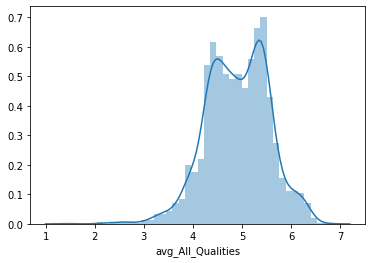

In [225]:
sns.distplot(merged_fill.avg_All_Qualities,kde=True)

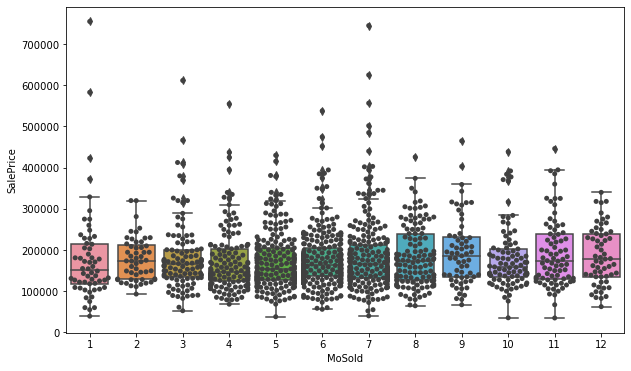

In [227]:
plt.figure(figsize=(10,6))
ax=sns.boxplot(x='MoSold',y='SalePrice',data=train_df,dodge=False)
ax=sns.swarmplot(x='MoSold',y='SalePrice',data=train_df,dodge=False,color='0.25')

In [230]:
merged_fill.GarageType.value_counts()

Attchd     1723
Detchd      779
BuiltIn     186
nan         157
Basment      36
2Types       23
CarPort      15
Name: GarageType, dtype: int64

In [232]:
Handling_Rare_Values(df=merged_fill,column='GarageType',threshold=160)

Attchd     1723
Detchd      779
RARE        231
BuiltIn     186
Name: GarageType, dtype: int64


Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   nan      Reg   
1        2          20       RL         80.0     9600   Pave   nan      Reg   
2        3          60       RL         68.0    11250   Pave   nan     IReg   
3        4          70       RL         60.0     9550   Pave   nan     IReg   
4        5          60       RL         84.0    14260   Pave   nan     IReg   
...    ...         ...      ...          ...      ...    ...   ...      ...   
2914  2915         160       RM         21.0     1936   Pave   nan      Reg   
2915  2916         160       RM         21.0     1894   Pave   nan      Reg   
2916  2917          20       RL        160.0    20000   Pave   nan      Reg   
2917  2918          85       RL         62.0    10441   Pave   nan      Reg   
2918  2919          60       RL         74.0     9627   Pave   nan      Reg   

     LandContour Utilities  ... total_Ext_Ql_Cd total_Bmt_Ql_Cd  \
0            Lvl    AllPub  ...              12            25.0   
1            Lvl    AllPub  ...              10            23.0   
2            Lvl    AllPub  ...              12            26.0   
3            Lvl    AllPub  ...              10            20.0   
4            Lvl    AllPub  ...              12            27.0   
...          ...       ...  ...             ...             ...   
2914         Lvl    AllPub  ...              10            15.0   
2915         Lvl    AllPub  ...              10            18.5   
2916         Lvl    AllPub  ...              10            18.0   
2917         Lvl    AllPub  ...              10            27.0   
2918         Lvl    AllPub  ...              10            18.0   

     total_Garage_Ql_Cd total_Bmt_Fn_Area Bsmt_Fsh_Per avg_Ext_Qual  \
0                    16             706.0     0.175234          6.0   
1                    16             978.0     0.225040          5.0   
2                    16             486.0     0.471739          6.0   
3                    14             216.0     0.714286          5.0   
4                    16             655.0     0.427948          6.0   
...                 ...               ...          ...          ...   
2914                  0               0.0     1.000000          5.0   
2915                 14             252.0     0.538462          5.0   
2916                 14            1224.0     0.000000          5.0   
2917                  0             337.0     0.630482          5.0   
2918                 20             758.0     0.238956          5.0   

     avg_Bmt_Qual  avg_Gar_Qual  total_All_Qualities  avg_All_Qualities  
0             5.0           4.0                 59.0           5.363636  
1             4.6           4.0                 58.6           5.327273  
2             5.2           4.0                 60.2           5.472727  
3             4.0           3.5                 54.5           4.954545  
4             5.4           4.0                 61.4           5.581818  
...           ...           ...                  ...                ...  
2914          3.0           0.0                 46.0           4.181818  
2915          3.7           3.5                 46.2           4.200000  
2916          3.6           3.5                 55.1           5.009091  
2917          5.4           0.0                 45.4           4.127273  
2918          3.6           5.0                 56.6           5.145455  

[2919 rows x 119 columns]

In [231]:
merged_fill.Heating.value_counts()

GasA     2874
GasW       27
Grav        9
Wall        6
OthW        2
Floor       1
Name: Heating, dtype: int64

In [237]:
Categorical_Value_Counts(merged_fill,new_cols_cats)

Street_Alley
length of unique :  4
Pave_nan     2709
Pave_Grvl     120
Pave_Pave      78
Grvl_nan       12
Name: Street_Alley, dtype: int64
LotShape_LandContour
length of unique :  8
Reg_Lvl     1728
IReg_Lvl     894
IReg_HLS      89
Reg_Bnk       76
IReg_Bnk      41
IReg_Low      36
Reg_HLS       31
Reg_Low       24
Name: LotShape_LandContour, dtype: int64
LotShape_LotConfig
length of unique :  10
Reg_Inside      1503
IReg_Inside      630
Reg_Corner       295
IReg_Corner      216
IReg_CulDSac     173
Reg_FR2           51
IReg_FR2          34
Reg_FR3            7
IReg_FR3           7
Reg_CulDSac        3
Name: LotShape_LotConfig, dtype: int64
LotShape_LandSlope
length of unique :  6
Reg_Gtl     1796
IReg_Gtl     982
IReg_Mod      65
Reg_Mod       60
IReg_Sev      13
Reg_Sev        3
Name: LotShape_LandSlope, dtype: int64
Condition1_Condition2
length of unique :  22
Norm_Norm        2511
Feedr_Norm        155
Artery_Norm        89
RRAn_Norm          41
PosN_Norm          35
RRAe_Norm   

In [240]:
#'LotShape_LotConfig',180
# 'LotShape_LandSlope',70
#'Condition1_Condition2',100
# Foundation_MasVnrType,230
Handling_Rare_Values(df=merged_fill,column='LotShape_LotConfig',threshold=180)
Handling_Rare_Values(df=merged_fill,column='LotShape_LandSlope',threshold=70)
Handling_Rare_Values(df=merged_fill,column='Condition1_Condition2',threshold=100)
Handling_Rare_Values(df=merged_fill,column='Foundation_MasVnrType',threshold=230)

Reg_Inside     1503
IReg_Inside     630
Reg_Corner      295
RARE            275
IReg_Corner     216
Name: LotShape_LotConfig, dtype: int64
Reg_Gtl     1796
IReg_Gtl     982
RARE         141
Name: LotShape_LandSlope, dtype: int64
Norm_Norm     2511
RARE           253
Feedr_Norm     155
Name: Condition1_Condition2, dtype: int64
CBlock_None       773
PConc_None        614
PConc_BrkFace     472
CBlock_BrkFace    391
RARE_None         355
RARE              314
Name: Foundation_MasVnrType, dtype: int64


Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   nan      Reg   
1        2          20       RL         80.0     9600   Pave   nan      Reg   
2        3          60       RL         68.0    11250   Pave   nan     IReg   
3        4          70       RL         60.0     9550   Pave   nan     IReg   
4        5          60       RL         84.0    14260   Pave   nan     IReg   
...    ...         ...      ...          ...      ...    ...   ...      ...   
2914  2915         160       RM         21.0     1936   Pave   nan      Reg   
2915  2916         160       RM         21.0     1894   Pave   nan      Reg   
2916  2917          20       RL        160.0    20000   Pave   nan      Reg   
2917  2918          85       RL         62.0    10441   Pave   nan      Reg   
2918  2919          60       RL         74.0     9627   Pave   nan      Reg   

     LandContour Utilities  ... total_Ext_Ql_Cd total_Bmt_Ql_Cd  \
0            Lvl    AllPub  ...              12            25.0   
1            Lvl    AllPub  ...              10            23.0   
2            Lvl    AllPub  ...              12            26.0   
3            Lvl    AllPub  ...              10            20.0   
4            Lvl    AllPub  ...              12            27.0   
...          ...       ...  ...             ...             ...   
2914         Lvl    AllPub  ...              10            15.0   
2915         Lvl    AllPub  ...              10            18.5   
2916         Lvl    AllPub  ...              10            18.0   
2917         Lvl    AllPub  ...              10            27.0   
2918         Lvl    AllPub  ...              10            18.0   

     total_Garage_Ql_Cd total_Bmt_Fn_Area Bsmt_Fsh_Per avg_Ext_Qual  \
0                    16             706.0     0.175234          6.0   
1                    16             978.0     0.225040          5.0   
2                    16             486.0     0.471739          6.0   
3                    14             216.0     0.714286          5.0   
4                    16             655.0     0.427948          6.0   
...                 ...               ...          ...          ...   
2914                  0               0.0     1.000000          5.0   
2915                 14             252.0     0.538462          5.0   
2916                 14            1224.0     0.000000          5.0   
2917                  0             337.0     0.630482          5.0   
2918                 20             758.0     0.238956          5.0   

     avg_Bmt_Qual  avg_Gar_Qual  total_All_Qualities  avg_All_Qualities  
0             5.0           4.0                 59.0           5.363636  
1             4.6           4.0                 58.6           5.327273  
2             5.2           4.0                 60.2           5.472727  
3             4.0           3.5                 54.5           4.954545  
4             5.4           4.0                 61.4           5.581818  
...           ...           ...                  ...                ...  
2914          3.0           0.0                 46.0           4.181818  
2915          3.7           3.5                 46.2           4.200000  
2916          3.6           3.5                 55.1           5.009091  
2917          5.4           0.0                 45.4           4.127273  
2918          3.6           5.0                 56.6           5.145455  

[2919 rows x 119 columns]

Street_Alley


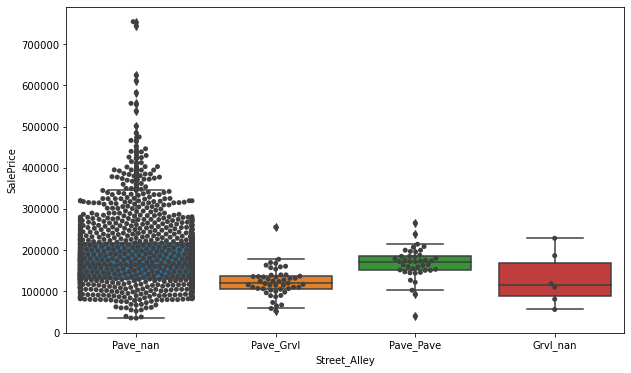

LotShape_LandContour


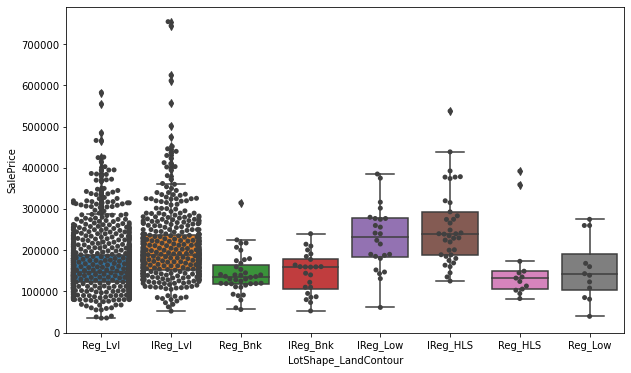

LotShape_LotConfig


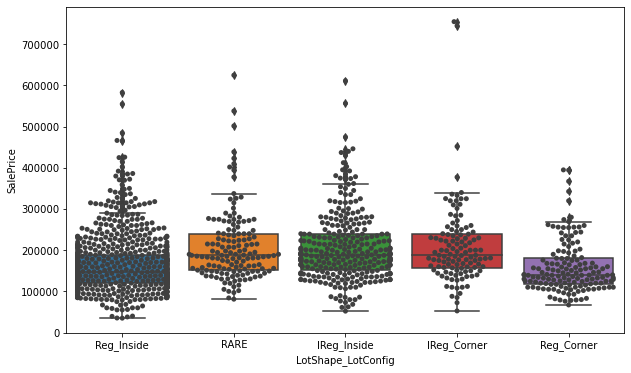

LotShape_LandSlope


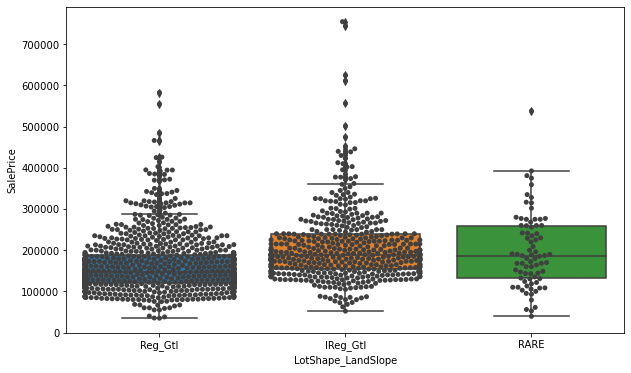

Condition1_Condition2


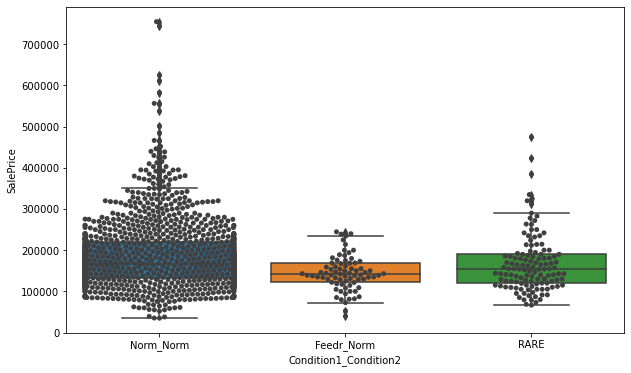

Exterior1st_Exterior2nd


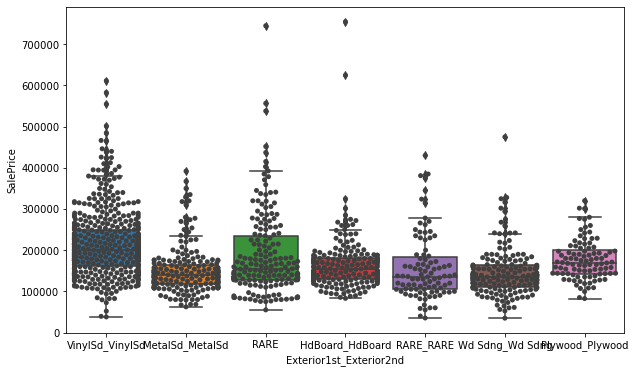

Foundation_MasVnrType


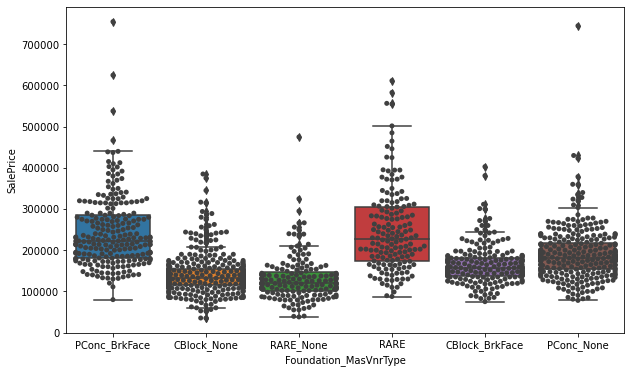

Exterior1st_Exterior2nd


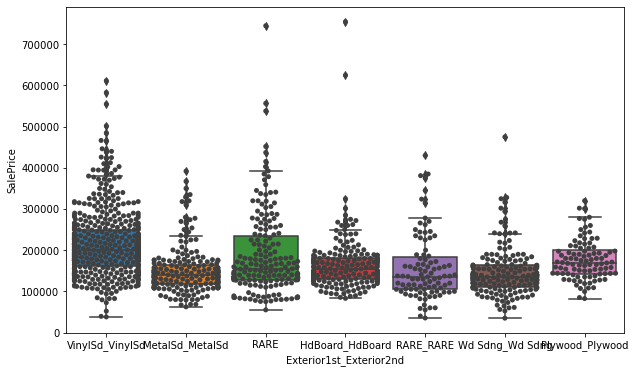

SaleCondition_SaleType


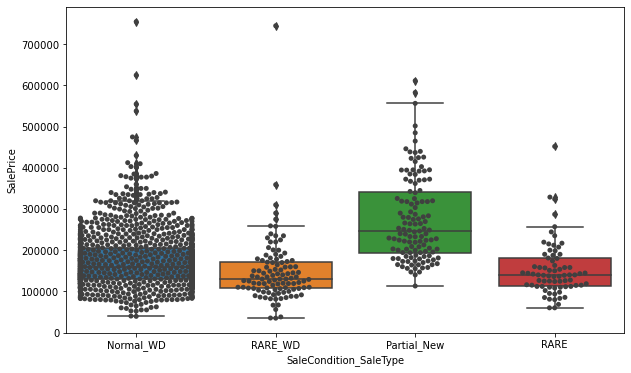

In [243]:
for col in new_cols_cats:
    box_swarm_plot(train_df,col,'SalePrice')

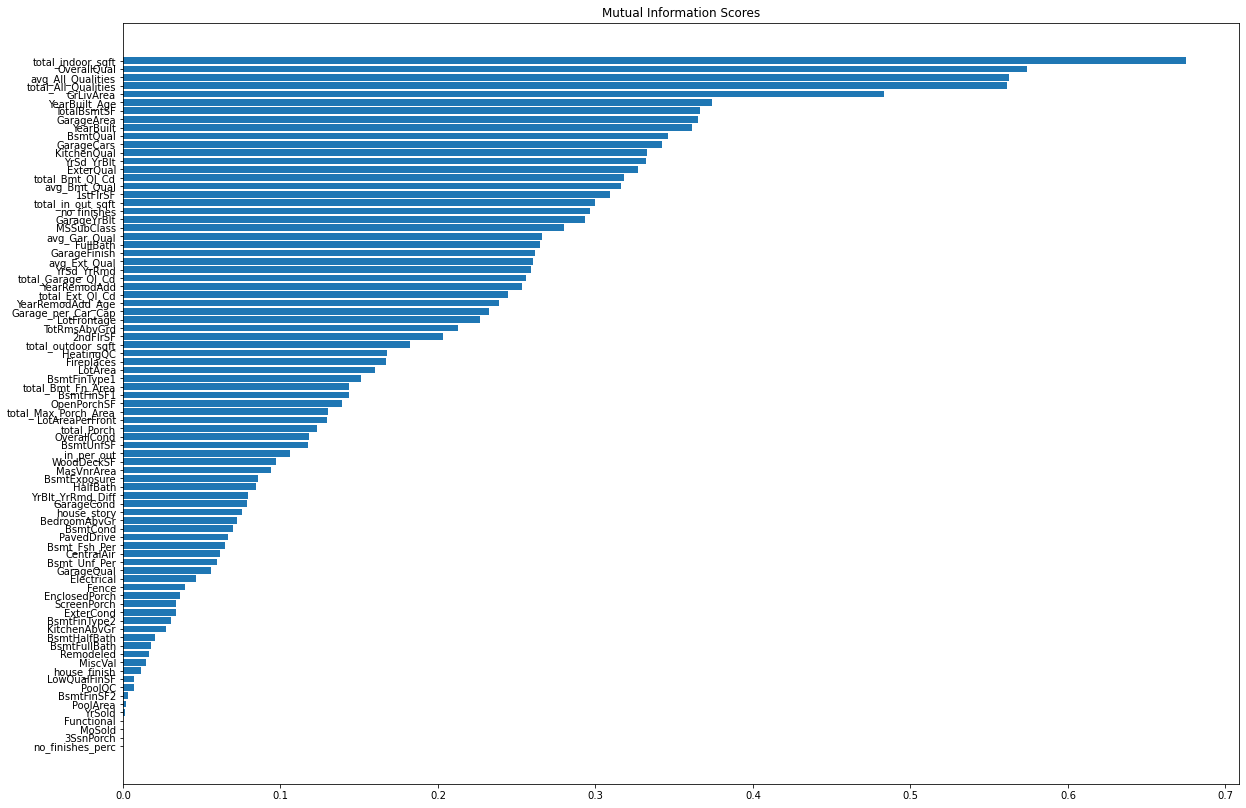

In [246]:
from sklearn.feature_selection import mutual_info_regression
def make_mi_scores_Regression(X_train, y_train):    
    discrete_features = X_train.dtypes == int
    mi_scores = mutual_info_regression(X_train, y_train, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X_train.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

score = make_mi_scores_Regression(X_train=numerical.drop(['Id','SalePrice','area_per_finishes'],axis=1), y_train=train_df.SalePrice)

def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.figure(figsize=(20,14))
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")
    
plot_mi_scores(score)

In [249]:
def model_feature_importance(model,X_train_df,n_features):
    feature_importance_df = pd.DataFrame(model.feature_importances_,columns=['importance'])
    feature_importance_df['feature'] = X_train_df.columns
    new_feat= feature_importance_df.sort_values(by=['importance'],ascending= False).head(n_features)['feature'].to_list()
    plt.figure(figsize=(20,14))
    sns.barplot(x='importance',y='feature',data=feature_importance_df.sort_values(by=['importance'],ascending= False).head(n_features))
    plt.title('Model__Feature__Importance')
    plt.show()
    return new_feat

In [247]:
#
from sklearn.ensemble import RandomForestRegressor ,ExtraTreesRegressor
from sklearn.linear_model import Lasso,LinearRegression
from sklearn.metrics import  mean_absolute_error,r2_score,mean_squared_error
las_R = Lasso()
L_R = LinearRegression()
rf = RandomForestRegressor(n_estimators=200)
et= ExtraTreesRegressor(n_estimators=200)
from sklearn.tree import DecisionTreeRegressor
D_R = DecisionTreeRegressor()
# 
#from sklearn.metrics import SCORERS
#SCORERS.keys()

classifier_list= [rf,et,L_R,las_R,D_R]
classifier_name =['rf','et','L_R','las_R','D_R']
scoring ='neg_root_mean_squared_error'

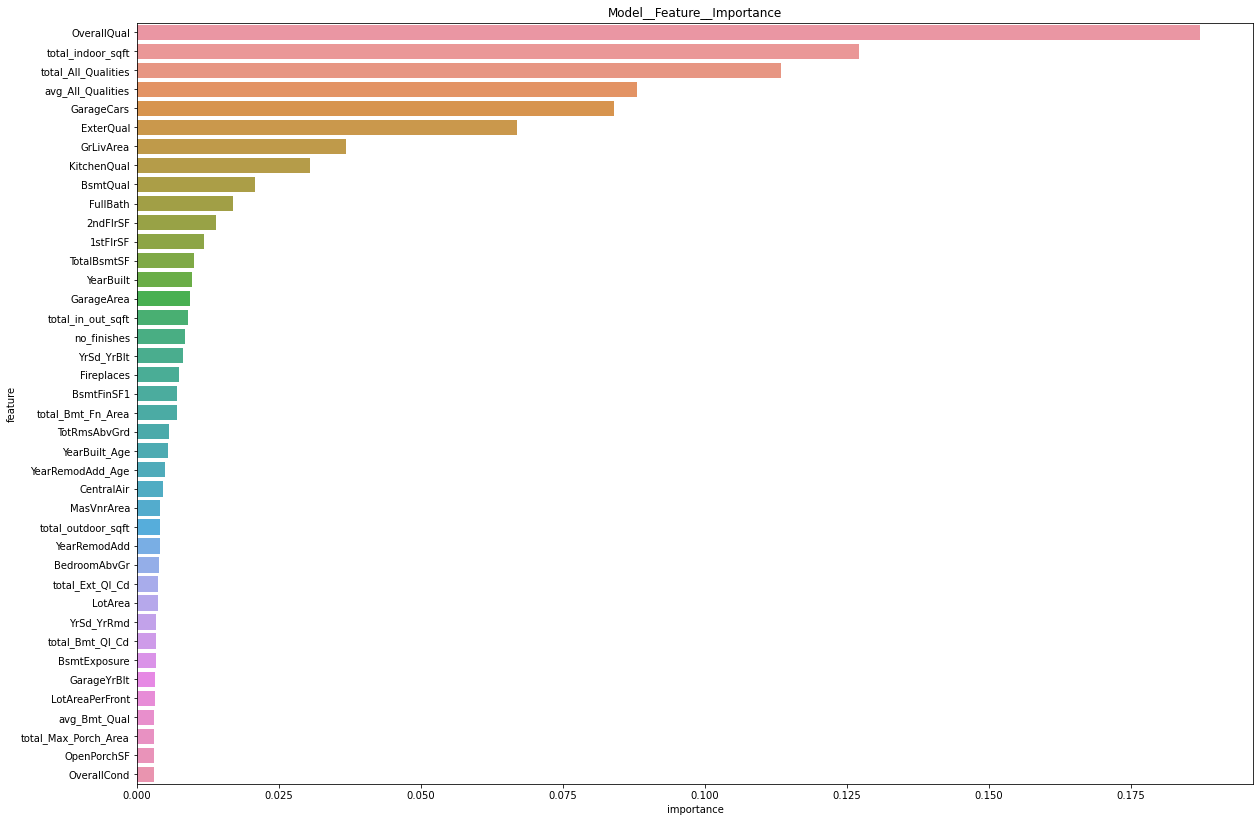

In [250]:
base_train = numerical.drop(['Id','SalePrice','area_per_finishes'],axis=1)
base_feat_et = model_feature_importance(model=et.fit(base_train,train_df.SalePrice),X_train_df=base_train,n_features=40)

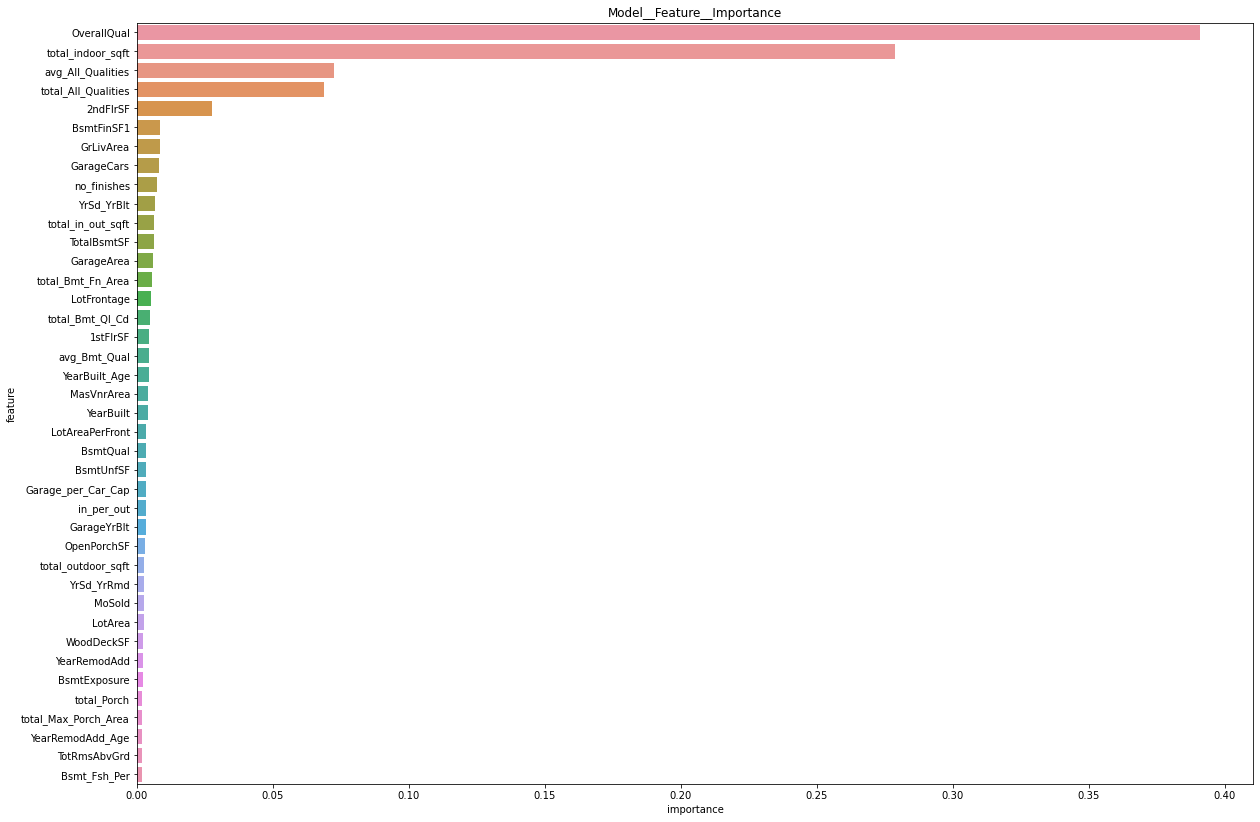

In [251]:
base_train = numerical.drop(['Id','SalePrice','area_per_finishes'],axis=1)
base_feat_rf = model_feature_importance(model=rf.fit(base_train,train_df.SalePrice),X_train_df=base_train,n_features=40)

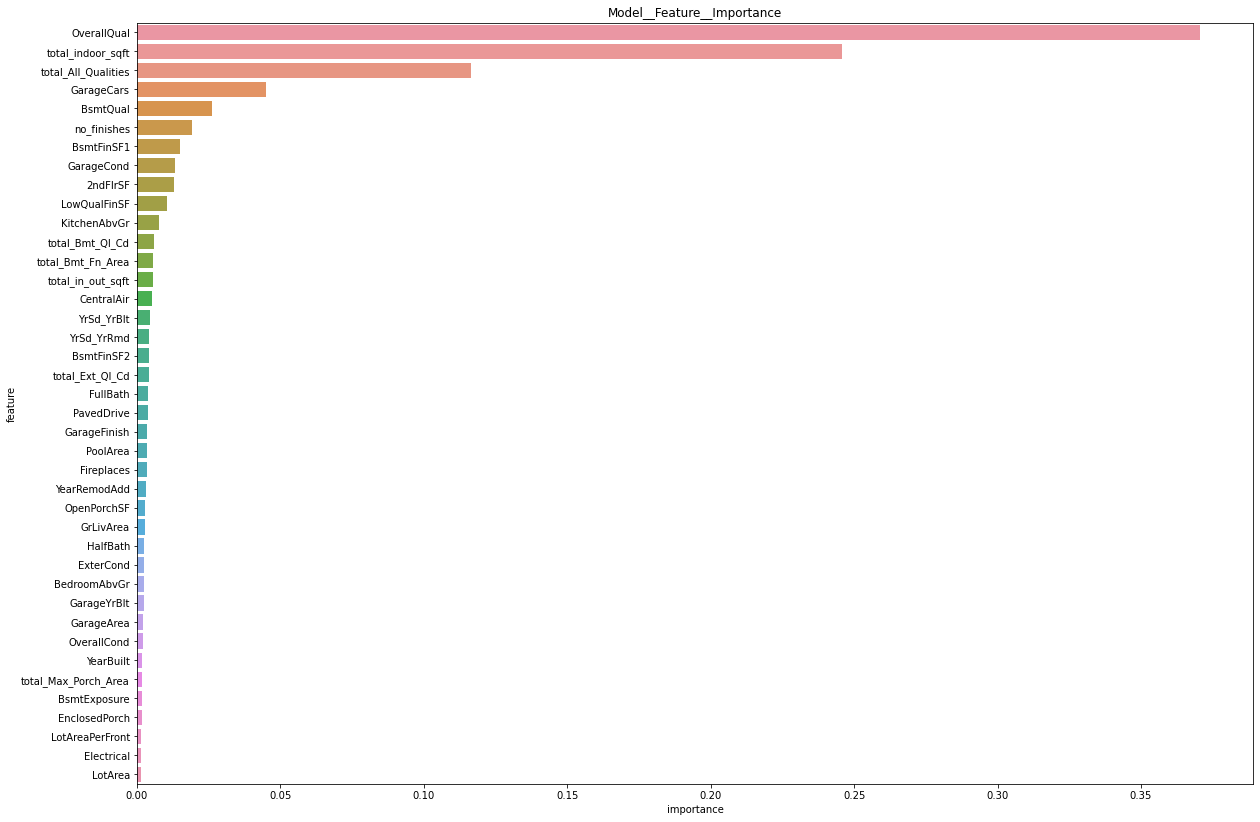

In [252]:
from xgboost import XGBRegressor
xgb = XGBRegressor(n_estimators=300)
#base_train = numerical.drop(['Id','SalePrice','area_per_finishes'],axis=1)
base_feat_xgb = model_feature_importance(model=xgb.fit(base_train,train_df.SalePrice),X_train_df=base_train,n_features=40)

In [253]:
base_feat_et

['OverallQual',
 'total_indoor_sqft',
 'total_All_Qualities',
 'avg_All_Qualities',
 'GarageCars',
 'ExterQual',
 'GrLivArea',
 'KitchenQual',
 'BsmtQual',
 'FullBath',
 '2ndFlrSF',
 '1stFlrSF',
 'TotalBsmtSF',
 'YearBuilt',
 'GarageArea',
 'total_in_out_sqft',
 'no_finishes',
 'YrSd_YrBlt',
 'Fireplaces',
 'BsmtFinSF1',
 'total_Bmt_Fn_Area',
 'TotRmsAbvGrd',
 'YearBuilt_Age',
 'YearRemodAdd_Age',
 'CentralAir',
 'MasVnrArea',
 'total_outdoor_sqft',
 'YearRemodAdd',
 'BedroomAbvGr',
 'total_Ext_Ql_Cd',
 'LotArea',
 'YrSd_YrRmd',
 'total_Bmt_Ql_Cd',
 'BsmtExposure',
 'GarageYrBlt',
 'LotAreaPerFront',
 'avg_Bmt_Qual',
 'total_Max_Porch_Area',
 'OpenPorchSF',
 'OverallCond']

In [254]:
base_feat_rf

['OverallQual',
 'total_indoor_sqft',
 'avg_All_Qualities',
 'total_All_Qualities',
 '2ndFlrSF',
 'BsmtFinSF1',
 'GrLivArea',
 'GarageCars',
 'no_finishes',
 'YrSd_YrBlt',
 'total_in_out_sqft',
 'TotalBsmtSF',
 'GarageArea',
 'total_Bmt_Fn_Area',
 'LotFrontage',
 'total_Bmt_Ql_Cd',
 '1stFlrSF',
 'avg_Bmt_Qual',
 'YearBuilt_Age',
 'MasVnrArea',
 'YearBuilt',
 'LotAreaPerFront',
 'BsmtQual',
 'BsmtUnfSF',
 'Garage_per_Car_Cap',
 'in_per_out',
 'GarageYrBlt',
 'OpenPorchSF',
 'total_outdoor_sqft',
 'YrSd_YrRmd',
 'MoSold',
 'LotArea',
 'WoodDeckSF',
 'YearRemodAdd',
 'BsmtExposure',
 'total_Porch',
 'total_Max_Porch_Area',
 'YearRemodAdd_Age',
 'TotRmsAbvGrd',
 'Bsmt_Fsh_Per']

In [255]:
base_feat_xgb

['OverallQual',
 'total_indoor_sqft',
 'total_All_Qualities',
 'GarageCars',
 'BsmtQual',
 'no_finishes',
 'BsmtFinSF1',
 'GarageCond',
 '2ndFlrSF',
 'LowQualFinSF',
 'KitchenAbvGr',
 'total_Bmt_Ql_Cd',
 'total_Bmt_Fn_Area',
 'total_in_out_sqft',
 'CentralAir',
 'YrSd_YrBlt',
 'YrSd_YrRmd',
 'BsmtFinSF2',
 'total_Ext_Ql_Cd',
 'FullBath',
 'PavedDrive',
 'GarageFinish',
 'PoolArea',
 'Fireplaces',
 'YearRemodAdd',
 'OpenPorchSF',
 'GrLivArea',
 'HalfBath',
 'ExterCond',
 'BedroomAbvGr',
 'GarageYrBlt',
 'GarageArea',
 'OverallCond',
 'YearBuilt',
 'total_Max_Porch_Area',
 'BsmtExposure',
 'EnclosedPorch',
 'LotAreaPerFront',
 'Electrical',
 'LotArea']

In [259]:
score.head(40)

total_indoor_sqft      0.674808
OverallQual            0.573743
avg_All_Qualities      0.562685
total_All_Qualities    0.561314
GrLivArea              0.483277
YearBuilt_Age          0.374019
TotalBsmtSF            0.366664
GarageArea             0.365157
YearBuilt              0.361060
BsmtQual               0.345882
GarageCars             0.342491
KitchenQual            0.332574
YrSd_YrBlt             0.331927
ExterQual              0.326734
total_Bmt_Ql_Cd        0.318168
avg_Bmt_Qual           0.316058
1stFlrSF               0.309430
total_in_out_sqft      0.299648
no_finishes            0.296540
GarageYrBlt            0.293543
MSSubClass             0.279808
avg_Gar_Qual           0.266109
FullBath               0.264665
GarageFinish           0.261915
avg_Ext_Qual           0.260465
YrSd_YrRmd             0.259187
total_Garage_Ql_Cd     0.256213
YearRemodAdd           0.253191
total_Ext_Ql_Cd        0.244759
YearRemodAdd_Age       0.239025
Garage_per_Car_Cap     0.232686
LotFront

In [263]:
merged_cats = merged_fill.select_dtypes(include='object')

In [1]:
merged_cats.isna().sum()

NameError: name 'merged_cats' is not defined

In [265]:
merged_fill.to_csv('feature_egnr_done.csv',index=False)